# **Imports do Projeto**

In [199]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import fisher_exact
import seaborn as sns

# **Anos análisado**

In [200]:
anos = ['2019', '2020', '2021', '2022', '2023']

# **Funções**

## **Função para normalização (Min-Max Scaling)**

In [201]:
def normalizar_max_min(coluna, minimo, maximo):
    return (coluna - minimo) / (maximo - minimo)

## **Função para calcular os casos normalizados por 100 mil habitantes.**

In [202]:
def calcular_casos_normalizados(casos, populacao_total):
    return casos / (populacao_total / 100000)

# **Pré-processamento de Dados**


**Gera uma tabela consolidada a partir dos arquivos CSV na pasta especificada.**

***
    A função realiza as seguintes etapas:
    1. Lê todos os arquivos CSV na pasta fornecida.
    2. Extrai o total de casos notificados e as informações de ano e região de cada arquivo.
    3. Mapeia as siglas das regiões para seus nomes e códigos correspondentes.
    4. Cria um DataFrame consolidado com os dados extraídos.
    5. Salva o DataFrame consolidado em um arquivo CSV chamado 'tabela_consolidada.csv'.

    Parâmetros:
    pasta_csv (str): O caminho da pasta que contém os arquivos CSV.
***

In [203]:
def gerar_tabela_consolidada(pasta_csv):
   
    mapa_regioes = {
        'AR': {'cidade': 'Angra dos Reis', 'COD_CIDADE': 32},
        'RJ': {'cidade': 'Rio de Janeiro', 'COD_CIDADE': 33},
        'CG': {'cidade': 'Campos de Goytacazes', 'COD_CIDADE': 34},
        'VA': {'cidade': 'Valença', 'COD_CIDADE': 35}
    }

    consolidados = []

    for arquivo in os.listdir(pasta_csv):
        if arquivo.endswith(".csv"):
            caminho_arquivo = os.path.join(pasta_csv, arquivo)
            
            try:
                df = pd.read_csv(caminho_arquivo, encoding='latin1')
            except UnicodeDecodeError:
                df = pd.read_csv(caminho_arquivo, encoding='utf-8')
            
            total = df['Casos notificados'].iloc[-1]
            
            nome, _ = os.path.splitext(arquivo)
            partes = nome.split('_')
            ano = partes[0][-4:]
            sigla_regiao = partes[1]
            
            regiao_info = mapa_regioes.get(sigla_regiao)
            if regiao_info:
                cidade = regiao_info['cidade']
                cod_cidade = regiao_info['COD_CIDADE']
                
                consolidados.append({
                    'Nome do Arquivo': arquivo,
                    'Total': total,
                    'Ano': ano,
                    'Região': cidade,
                    'COD_CIDADE': cod_cidade
                })

    df_consolidado = pd.DataFrame(consolidados)

    df_consolidado.to_csv('tabela_consolidada.csv', index=False)

    print("Tabela consolidada salva como 'tabela_consolidada.csv'.")


In [204]:
gerar_tabela_consolidada('casos_dengue_rj')

Tabela consolidada salva como 'tabela_consolidada.csv'.


**Atualiza a tabela de saúde com os totais de casos de dengue da tabela consolidada.**
***
    Parâmetros:
    anos (list): Lista de anos a serem considerados para atualização.
***

In [205]:
def atualizar_tabela_saude(anos):
  
    df_consolidado = pd.read_csv('tabela_consolidada.csv')
    df_saude = pd.read_csv('2019-2023-casos de dengue.csv')
    df_saude.columns = df_saude.columns.str.strip()
    df_saude.columns = df_saude.columns.astype(str)

    for ano in anos:
        if ano in df_saude.columns:
            df_saude[ano] = pd.to_numeric(df_saude[ano], errors='coerce')

    for _, row in df_consolidado.iterrows():
        ano = str(row['Ano'])
        total = row['Total']
        cod_cidade = row['COD_CIDADE']
        
        print(f"Processando COD_CIDADE: {cod_cidade}, Ano: {ano}, Total: {total}")

        if cod_cidade in df_saude['COD_CIDADE'].values:
            if ano in df_saude.columns:
                current_value = df_saude.loc[df_saude['COD_CIDADE'] == cod_cidade, ano].values[0]
                if pd.isna(current_value):
                    current_value = 0
                
                new_value = current_value + total
                df_saude.loc[df_saude['COD_CIDADE'] == cod_cidade, ano] = new_value
                
                print(f"Atualizando {ano} para COD_CIDADE {cod_cidade}: novo valor é {new_value}")
            else:
                print(f"Ano '{ano}' não encontrado nas colunas da tabela de saúde.")
        else:
            print(f"COD_CIDADE '{cod_cidade}' não encontrado na tabela de saúde.")

    df_saude.to_csv('tabela_saude_atualizada.csv', index=False)

    print("Tabela de saúde atualizada salva como 'tabela_saude_atualizada.csv'.")


In [206]:
atualizar_tabela_saude(anos)

Processando COD_CIDADE: 32, Ano: 2019, Total: 1764
Atualizando 2019 para COD_CIDADE 32: novo valor é 1764
Processando COD_CIDADE: 34, Ano: 2019, Total: 177
Atualizando 2019 para COD_CIDADE 34: novo valor é 177
Processando COD_CIDADE: 33, Ano: 2019, Total: 22046
Atualizando 2019 para COD_CIDADE 33: novo valor é 22046
Processando COD_CIDADE: 35, Ano: 2019, Total: 190
Atualizando 2019 para COD_CIDADE 35: novo valor é 190
Processando COD_CIDADE: 32, Ano: 2020, Total: 187
Atualizando 2020 para COD_CIDADE 32: novo valor é 187
Processando COD_CIDADE: 34, Ano: 2020, Total: 18
Atualizando 2020 para COD_CIDADE 34: novo valor é 18
Processando COD_CIDADE: 33, Ano: 2020, Total: 1536
Atualizando 2020 para COD_CIDADE 33: novo valor é 1536
Processando COD_CIDADE: 35, Ano: 2020, Total: 104
Atualizando 2020 para COD_CIDADE 35: novo valor é 104
Processando COD_CIDADE: 32, Ano: 2021, Total: 104
Atualizando 2021 para COD_CIDADE 32: novo valor é 104
Processando COD_CIDADE: 34, Ano: 2021, Total: 94
Atualizan

**Este código tem como objetivo limpar e ajustar os dados de população de um arquivo CSV. Primeiro, ele remove quaisquer símbolos ou letras que possam estar misturados nos números da população. Depois, transforma esses valores em números e descarta os dados inválidos. Em seguida, o código encontra o valor mais baixo e o mais alto da população e ajusta todos os números para uma escala de 0 a 1, para facilitar comparações. No final, ele salva esses novos valores em um novo arquivo e mostra o resultado.**
**Lê um arquivo CSV com dados de população, normaliza a coluna 'População Total' e salva os dados normalizados em um novo arquivo CSV.**

***
    Parâmetros:
    - input_file (str): O caminho do arquivo CSV de entrada (padrão: 'habitantes-cidades.csv').
    - output_file (str): O caminho do arquivo CSV de saída (padrão: 'habitantes_normalizados.csv').
***

In [207]:
def normalizar_populacao(input_file='habitantes-cidades.csv', output_file='habitantes_normalizados.csv'):
    
    df = pd.read_csv(input_file)
    df['População Total'] = df['População Total'].astype(str).str.replace(r'\D', '', regex=True)
    df['População Total'] = pd.to_numeric(df['População Total'], errors='coerce')
    df = df.dropna(subset=['População Total'])
    
    min_pop = df['População Total'].min()
    max_pop = df['População Total'].max()
    
    df['População Normalizada'] = (df['População Total'] - min_pop) / (max_pop - min_pop)

    df.to_csv(output_file, index=False)

    print(f"\nDados normalizados salvos em '{output_file}'.")
    print(df)

In [208]:
normalizar_populacao()


Dados normalizados salvos em 'habitantes_normalizados.csv'.
    COD_CIDADE       Região de Saúde  População Total Estado  \
0            1              Cruzeiro          3151400     DF   
1            2            Lago Norte          3582100     DF   
2            3              Lago Sul          2937700     DF   
3            4          Plano Piloto         20618300     DF   
4            5    Sudoeste Octogonal          5003300     DF   
5            6                Varjão           879300     DF   
6            7        Candangolândia          1601900     DF   
7            8            Estrutural          3068700     DF   
8            9                 Guará         10784700     DF   
9           10    Núcleo Bandeirante          2313400     DF   
10          11              Park Way          2034500     DF   
11          12        Riacho Fundo I          3529100     DF   
12          13       Riacho Fundo II          3710800     DF   
13          14                   SIA       

**Pegado somente as colunas necessárias**

In [209]:
# Colunas que queremos filtrar nos arquivos CSV
colunas_desejadas = [
    'Data', 
    'Hora UTC', 
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'
]

def processar_csv(diretorio, arquivo, diretorio_novo):
    caminho_arquivo = os.path.join(diretorio, arquivo)
    df = pd.read_csv(caminho_arquivo)

    df.columns = df.columns.str.strip()

    colunas_presentes = [coluna for coluna in colunas_desejadas if coluna in df.columns]
    df_filtrado = df[colunas_presentes]

    novo_caminho = os.path.join(diretorio_novo, arquivo)
    df_filtrado.to_csv(novo_caminho, index=False)

    print(f'Arquivo {arquivo} processado. Novo arquivo salvo como {novo_caminho}.')

for ano in anos:
    diretorio = ano
    diretorio_novo = f'{ano}-formatado'
    
    os.makedirs(diretorio_novo, exist_ok=True)

    arquivos_csv = [f for f in os.listdir(diretorio) if f.endswith('.csv')]

    for arquivo in arquivos_csv:
        processar_csv(diretorio, arquivo, diretorio_novo)


Arquivo 1-2019-BRAZLANDIA.csv processado. Novo arquivo salvo como 2019-formatado\1-2019-BRAZLANDIA.csv.
Arquivo 2-2019-AGUAS EMENDADAS.csv processado. Novo arquivo salvo como 2019-formatado\2-2019-AGUAS EMENDADAS.csv.
Arquivo 3-2019-BRASILIA.csv processado. Novo arquivo salvo como 2019-formatado\3-2019-BRASILIA.csv.
Arquivo 4-2019-GAMA.csv processado. Novo arquivo salvo como 2019-formatado\4-2019-GAMA.csv.
Arquivo 5-2019-PARANOA.csv processado. Novo arquivo salvo como 2019-formatado\5-2019-PARANOA.csv.
Arquivo 6-2019-CAMPOSDOSGOYTACAZES.csv processado. Novo arquivo salvo como 2019-formatado\6-2019-CAMPOSDOSGOYTACAZES.csv.
Arquivo 7-2019-ANGRADOSREIS.csv processado. Novo arquivo salvo como 2019-formatado\7-2019-ANGRADOSREIS.csv.
Arquivo 8-2019-RIODEJANEIRO.csv processado. Novo arquivo salvo como 2019-formatado\8-2019-RIODEJANEIRO.csv.
Arquivo 9-2019-VALENCA.csv processado. Novo arquivo salvo como 2019-formatado\9-2019-VALENCA.csv.
Arquivo 1-2020-BRAZLANDIA.csv processado. Novo arquivo s

**Criando a média, os estremos e a normalização: O código processa dados climáticos de arquivos CSV organizados por ano. Ele define funções para calcular médias e extremos, normalizar os dados usando Min-Max Scaling e criar arquivos CSV com os resultados. Para cada ano, lê os arquivos, acumula as informações, calcula as estatísticas e salva os dados em arquivos separados para médias, extremos e normalização, finalizando com uma mensagem de conclusão do processamento.**

In [210]:
diretorios_anos = ['2019-formatado', '2020-formatado', '2021-formatado', '2022-formatado', '2023-formatado']

def calcular_medias(arquivo, diretorio):
    df = pd.read_csv(os.path.join(diretorio, arquivo))
    
    df.columns = df.columns.str.strip()
    df.replace(',', '.', regex=True, inplace=True)
    df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = pd.to_numeric(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], errors='coerce')
    df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'] = pd.to_numeric(df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], errors='coerce')
    df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'] = pd.to_numeric(df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], errors='coerce')
    df['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = pd.to_numeric(df['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'], errors='coerce')
    df['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = pd.to_numeric(df['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'], errors='coerce')

    # Calcula as médias
    medias = {
        'COD_REG': arquivo[0],
        'Arquivo': arquivo,
        'Média de Precipitação': df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].mean(),
        'Média de Temperatura Máxima': df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].mean(),
        'Média de Temperatura Mínima': df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'].mean(),
        'Média de Umidade Relativa Máxima': df['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].mean(),
        'Média de Umidade Relativa Mínima': df['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].mean(),
    }

    return medias

def processar_ano(diretorio):
    arquivos_csv = [f for f in os.listdir(diretorio) if f.endswith('.csv')]

    medias_data = []

    for arquivo in arquivos_csv:
        medias = calcular_medias(arquivo, diretorio)
        medias_data.append(medias)

    return medias_data

def criar_csv(csv_data, nome_arquivo):
    df_csv = pd.DataFrame(csv_data)
    df_csv.to_csv(nome_arquivo, index=False)

for diretorio in diretorios_anos:
    ano = diretorio.split('-')[0]
    medias_data = processar_ano(diretorio)
    
    criar_csv(medias_data, f'medias_{ano}.csv')

print("Processamento concluído para todos os anos.")

arquivos_medias = {
    '2019': 'medias_2019.csv',
    '2020': 'medias_2020.csv',
    '2021': 'medias_2021.csv',
    '2022': 'medias_2022.csv',
    '2023': 'medias_2023.csv'
}

def calcular_max_min(dfs):
    prec_min = min([df['Média de Precipitação'].min() for df in dfs])
    prec_max = max([df['Média de Precipitação'].max() for df in dfs])
    
    temp_max_min = min([df['Média de Temperatura Máxima'].min() for df in dfs])
    temp_max_max = max([df['Média de Temperatura Máxima'].max() for df in dfs])
    
    temp_min_min = min([df['Média de Temperatura Mínima'].min() for df in dfs])
    temp_min_max = max([df['Média de Temperatura Mínima'].max() for df in dfs])
    
    umidade_max_min = min([df['Média de Umidade Relativa Máxima'].min() for df in dfs])
    umidade_max_max = max([df['Média de Umidade Relativa Máxima'].max() for df in dfs])
    
    umidade_min_min = min([df['Média de Umidade Relativa Mínima'].min() for df in dfs])
    umidade_min_max = max([df['Média de Umidade Relativa Mínima'].max() for df in dfs])

    return {
        'prec_min': prec_min, 'prec_max': prec_max,
        'temp_max_min': temp_max_min, 'temp_max_max': temp_max_max,
        'temp_min_min': temp_min_min, 'temp_min_max': temp_min_max,
        'umidade_max_min': umidade_max_min, 'umidade_max_max': umidade_max_max,
        'umidade_min_min': umidade_min_min, 'umidade_min_max': umidade_min_max
    }

dfs = [pd.read_csv(arquivo) for arquivo in arquivos_medias.values()]
max_min = calcular_max_min(dfs)

for ano, arquivo in arquivos_medias.items():
    df = pd.read_csv(arquivo)
    
    # Normalizando as colunas
    df['PRECIPITAÇÃO NORMALIZADA'] = df['Média de Precipitação'].apply(normalizar_max_min, minimo=max_min['prec_min'], maximo=max_min['prec_max'])
    df['TEMP MAX NORMALIZADA'] = df['Média de Temperatura Máxima'].apply(normalizar_max_min, minimo=max_min['temp_max_min'], maximo=max_min['temp_max_max'])
    df['TEMP MIN NORMALIZADA'] = df['Média de Temperatura Mínima'].apply(normalizar_max_min, minimo=max_min['temp_min_min'], maximo=max_min['temp_min_max'])
    df['UMIDADE MAX NORMALIZADA'] = df['Média de Umidade Relativa Máxima'].apply(normalizar_max_min, minimo=max_min['umidade_max_min'], maximo=max_min['umidade_max_max'])
    df['UMIDADE MIN NORMALIZADA'] = df['Média de Umidade Relativa Mínima'].apply(normalizar_max_min, minimo=max_min['umidade_min_min'], maximo=max_min['umidade_min_max'])

    df_normalizado = pd.DataFrame({
        'COD_REG': df['COD_REG'], 
        'Arquivo': df['Arquivo'],
        'PRECIPITAÇÃO NORMALIZADA': df['PRECIPITAÇÃO NORMALIZADA'],
        'TEMP MAX NORMALIZADA': df['TEMP MAX NORMALIZADA'],
        'TEMP MIN NORMALIZADA': df['TEMP MIN NORMALIZADA'],
        'UMIDADE MAX NORMALIZADA': df['UMIDADE MAX NORMALIZADA'],
        'UMIDADE MIN NORMALIZADA': df['UMIDADE MIN NORMALIZADA']
    })

    nome_arquivo_normalizado = f'normalizacao_{ano}.csv'
    df_normalizado.to_csv(nome_arquivo_normalizado, index=False)
    print(f"Arquivo normalizado salvo: {nome_arquivo_normalizado}")

print("Processamento de normalização concluído para todos os anos.")


Processamento concluído para todos os anos.
Arquivo normalizado salvo: normalizacao_2019.csv
Arquivo normalizado salvo: normalizacao_2020.csv
Arquivo normalizado salvo: normalizacao_2021.csv
Arquivo normalizado salvo: normalizacao_2022.csv
Arquivo normalizado salvo: normalizacao_2023.csv
Processamento de normalização concluído para todos os anos.


**Gera tabelas de saúde por ano a partir dos arquivos CSV de saúde e população normalizada.**
***
    A função realiza as seguintes etapas:
    1. Carrega os arquivos CSV de saúde e população normalizada.
    2. Mescla os dados utilizando a coluna COD_CIDADE.
    3. Para cada ano especificado, seleciona as colunas desejadas e renomeia a coluna de casos.
    4. Salva os DataFrames resultantes em arquivos CSV separados para cada ano.

    Parâmetros:
    arquivo_saude (str): O caminho do arquivo CSV com os dados de saúde.
    arquivo_populacao (str): O caminho do arquivo CSV com os dados de população normalizada.
    anos (list): Uma lista de anos (ex: [2019, 2020, 2021]) para os quais as tabelas serão geradas.
 ***


In [211]:
def gerar_tabelas_por_ano(arquivo_saude, arquivo_populacao, anos):
    saude_df = pd.read_csv(arquivo_saude)
    pop_df = pd.read_csv(arquivo_populacao)

    merged_df = pd.merge(saude_df, pop_df[['COD_CIDADE', 'População Total', 'População Normalizada']], on='COD_CIDADE')

    for ano in anos:
        ano_df = merged_df[['COD_CIDADE', 'COD_REG', 'Região de Saúde', ano, 'População Total', 'População Normalizada']]
        
        ano_df = ano_df.copy()
        ano_df.rename(columns={ano: 'Casos'}, inplace=True)

        ano_df['casos_normalizados'] = ano_df.apply(
            lambda row: calcular_casos_normalizados(row['Casos'], row['População Total']), axis=1
        )

        ano_df.to_csv(f'tabela_saude_{ano}.csv', index=False)

    print("Arquivos CSV gerados com sucesso!")

In [212]:
gerar_tabelas_por_ano('tabela_saude_atualizada.csv', 'habitantes_normalizados.csv', anos)

Arquivos CSV gerados com sucesso!


**Gera tabelas de saúde com dados de normalização para cada ano fornecido.**
***
    Para cada ano na lista de anos, a função:
    1. Carrega os arquivos CSV de saúde e normalização correspondentes ao ano.
    2. Seleciona apenas as colunas relevantes da tabela de normalização.
    3. Mescla os dados de saúde com os dados de normalização usando a coluna COD_REG.
    4. Salva o resultado em um novo arquivo CSV, indicando que os dados de normalização foram adicionados.
    
    Parâmetros:
    anos (list): Uma lista de anos para os quais as tabelas serão geradas.
   ***

In [213]:
def gerar_tabelas_com_normalizacao(anos):
   
    for ano in anos:
        tabela_saude_path = f'tabela_saude_{ano}.csv'
        normalizacao_path = f'normalizacao_{ano}.csv'
        
        tabela_saude_df = pd.read_csv(tabela_saude_path)
        normalizacao_df = pd.read_csv(normalizacao_path)
        
        normalizacao_df = normalizacao_df[[
             'COD_REG', 
             'PRECIPITAÇÃO NORMALIZADA', 
             'TEMP MAX NORMALIZADA',         
             'TEMP MIN NORMALIZADA', 
             'UMIDADE MAX NORMALIZADA', 
             'UMIDADE MIN NORMALIZADA' 
        ]]
        
        tabela_completa_df = pd.merge(tabela_saude_df, normalizacao_df, on='COD_REG', how='left')
        
        tabela_completa_path = f'tabela_saude_com_normalizacao_{ano}.csv'
        tabela_completa_df.to_csv(tabela_completa_path, index=False)

        print(f"Arquivo gerado: {tabela_completa_path}")

**Processa os dados de saúde para um determinado ano, realizando análise descritiva,matriz de correlação e gráficos de dispersão.**
***
    Parâmetros:
    ano (int): O ano a ser processado.
***

In [214]:
gerar_tabelas_com_normalizacao(anos)

Arquivo gerado: tabela_saude_com_normalizacao_2019.csv
Arquivo gerado: tabela_saude_com_normalizacao_2020.csv
Arquivo gerado: tabela_saude_com_normalizacao_2021.csv
Arquivo gerado: tabela_saude_com_normalizacao_2022.csv
Arquivo gerado: tabela_saude_com_normalizacao_2023.csv


# **Análise Estátistica**

**Realiza uma análise descritiva básica para o DataFrame fornecido e imprime as estatísticas descritivas.**

In [215]:
def analise_descritiva(df, regiao, ano):
    print(f"\nAnálise descritiva para {regiao} (ano {ano}):")
    print(df.describe())

**Calcula a matriz de correlação para as colunas numéricas do DataFrame e a visualiza como um gráfico de calor.**

In [216]:
def calcular_correlacao(df, regiao, ano):
    print(f"\nMatriz de correlação para {regiao} (ano {ano}):")
    numerical_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numerical_df.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Matriz de Correlação para {regiao} ({ano})')
    plt.show()

**Gera gráficos de dispersão para as características especificadas em relação aos casos normalizados de dengue para o Distrito Federal.**

In [217]:
def gerar_graficos_df(df_df, features, ano):
    for feature in features:
        plt.figure(figsize=(10, 6))
        
        sns.scatterplot(data=df_df, x=feature, y='casos_normalizados', label='Distrito Federal', color='blue', alpha=0.6)
        
        plt.title(f'DF: Casos de Dengue vs. {feature} ({ano})')
        plt.xlabel(feature)
        plt.ylabel('Casos de Dengue')
        plt.legend()
        plt.show()

**Gera gráficos de dispersão para as características especificadas em relação aos casos normalizados de dengue para o Rio de Janeiro.**

In [218]:
def gerar_graficos_rio(df_rio, features, ano):
    for feature in features:
        plt.figure(figsize=(10, 6))
        
        sns.scatterplot(data=df_rio, x=feature, y='casos_normalizados', label='Rio de Janeiro', color='red', alpha=0.6)
        
        plt.title(f'RJ: Casos de Dengue vs. {feature} ({ano})')
        plt.xlabel(feature)
        plt.ylabel('Casos de Dengue')
        plt.legend()
        plt.show()

**Processa os dados de um ano específico, realizando a leitura do arquivo CSV, separação dos dados do Rio de Janeiro e do Distrito Federal, e executando análises descritivas, cálculos de correlação e geração de gráficos.**

In [219]:
tabelas_dengue_df = []
tabelas_dengue_rio = []

def processar_ano_distintos(ano):
    file_path_resultados = f'tabela_saude_com_normalizacao_{ano}.csv'  # Ajusta para múltiplos anos
    df = pd.read_csv(file_path_resultados)

    df_relevante = df.drop(columns=['COD_CIDADE', 'COD_REG'])

    df_relevante.columns = df_relevante.columns.str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')

    df_rio = df_relevante.iloc[-4:].copy()  # Últimos 4 registros para Rio de Janeiro
    df_df = df_relevante.iloc[:-4].copy()   # Todos os registros menos os últimos 4

    analise_descritiva(df_rio, "Rio de Janeiro", ano)
    analise_descritiva(df_df, "Distrito Federal", ano)

    calcular_correlacao(df_rio, "Rio de Janeiro", ano)
    calcular_correlacao(df_df, "Distrito Federal", ano)

    features = [
        'População_Normalizada',
        'PRECIPITAÇÃO_NORMALIZADA', 
        'TEMP_MAX_NORMALIZADA',
        'TEMP_MIN_NORMALIZADA', 
        'UMIDADE_MAX_NORMALIZADA',
        'UMIDADE_MIN_NORMALIZADA'
    ]

    gerar_graficos_df(df_df, features, ano)
    gerar_graficos_rio(df_rio, features, ano)

    df_df.loc[:, 'Ano'] = ano
    df_rio.loc[:, 'Ano'] = ano
    tabelas_dengue_df.append(df_df)
    tabelas_dengue_rio.append(df_rio)


Análise descritiva para Rio de Janeiro (ano 2019):
              Casos  População_Total  População_Normalizada  \
count      4.000000     4.000000e+00               4.000000   
mean    6044.250000     1.623775e+08               0.260908   
std    10693.820782     3.058743e+08               0.492800   
min      177.000000     4.835400e+06               0.007089   
25%      186.750000     6.315450e+06               0.009473   
50%      977.000000     1.177610e+07               0.018271   
75%     6834.500000     1.678381e+08               0.269705   
max    22046.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count            4.000000                  4.000000              4.000000   
mean             5.133972                  0.150937              0.674851   
std              3.621708                  0.144851              0.268457   
min              2.790506                  0.017345              0.29563

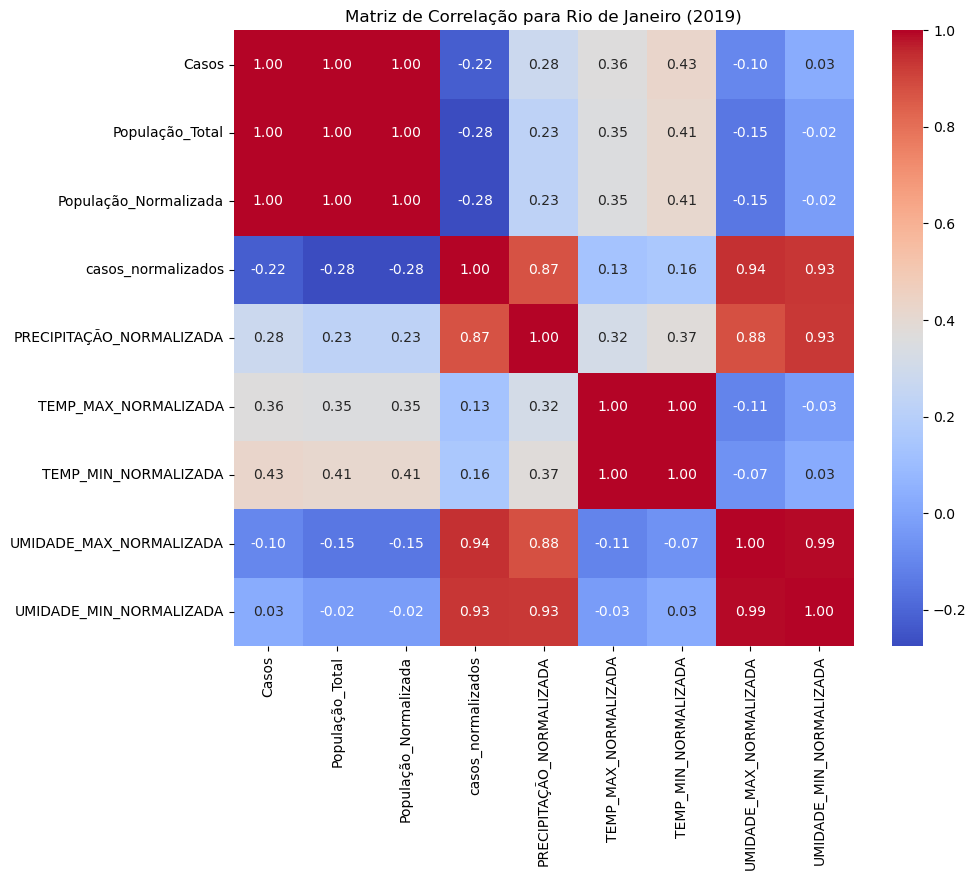


Matriz de correlação para Distrito Federal (ano 2019):
                             Casos  População_Total  População_Normalizada  \
Casos                     1.000000         0.659409               0.659409   
População_Total           0.659409         1.000000               1.000000   
População_Normalizada     0.659409         1.000000               1.000000   
casos_normalizados        0.280672        -0.266409              -0.266409   
PRECIPITAÇÃO_NORMALIZADA -0.016982         0.214802               0.214802   
TEMP_MAX_NORMALIZADA      0.172194         0.267853               0.267853   
TEMP_MIN_NORMALIZADA      0.107827         0.307204               0.307204   
UMIDADE_MAX_NORMALIZADA   0.306524        -0.243406              -0.243406   
UMIDADE_MIN_NORMALIZADA   0.267391        -0.303451              -0.303451   

                          casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  \
Casos                               0.280672                 -0.016982   
População_Total

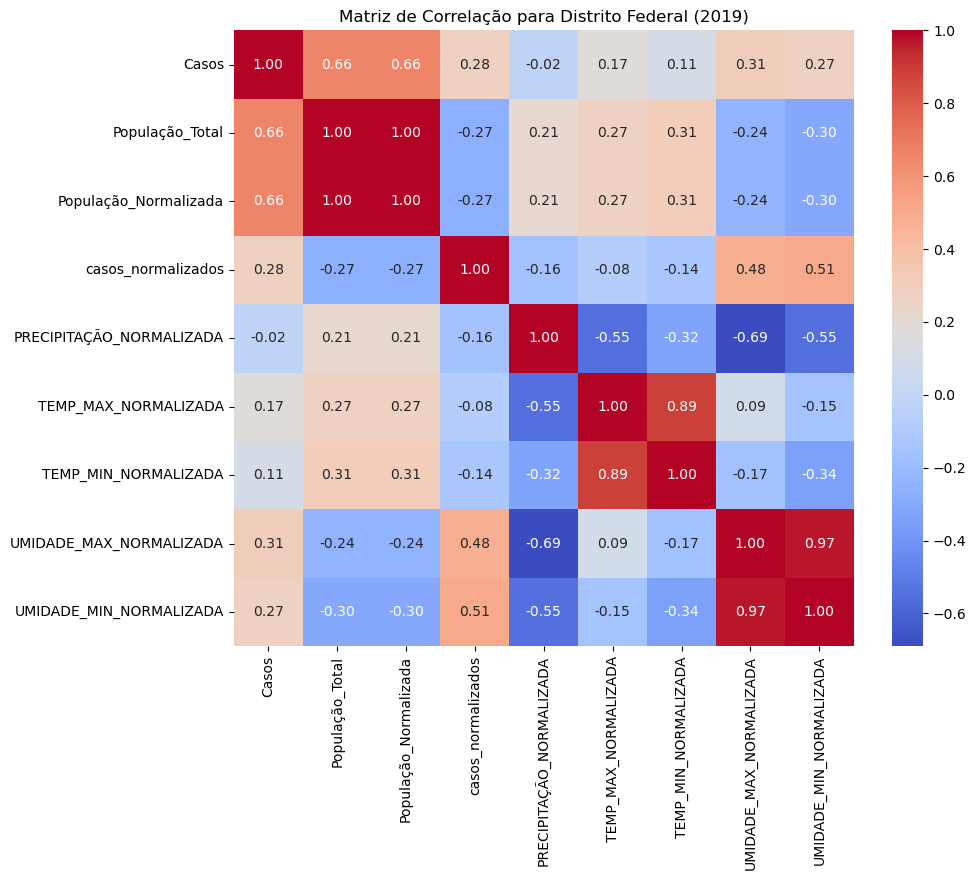

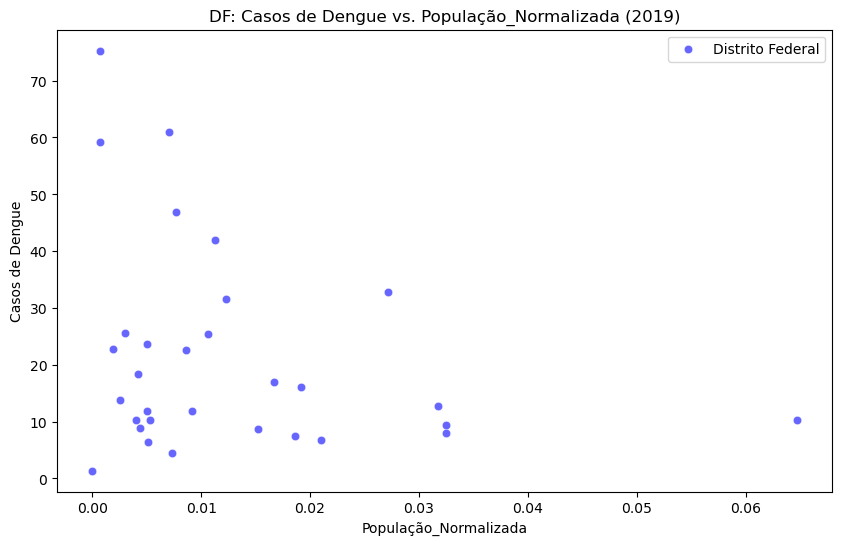

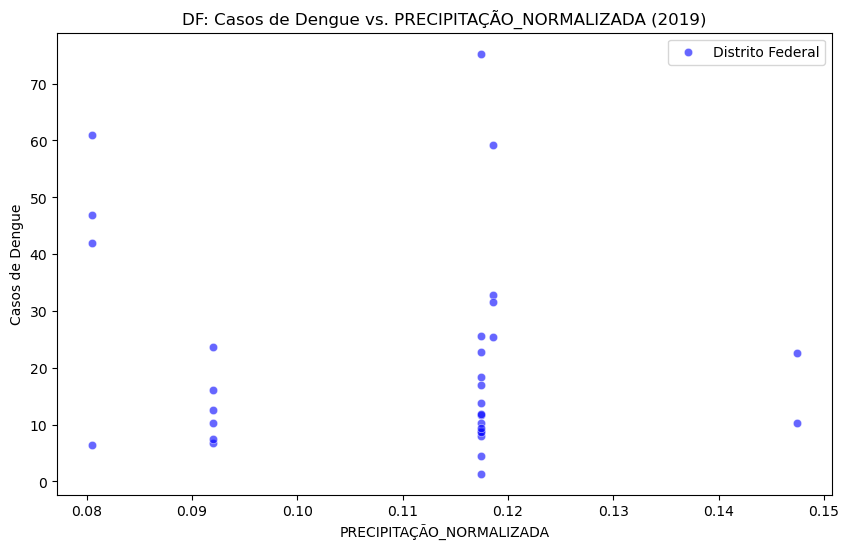

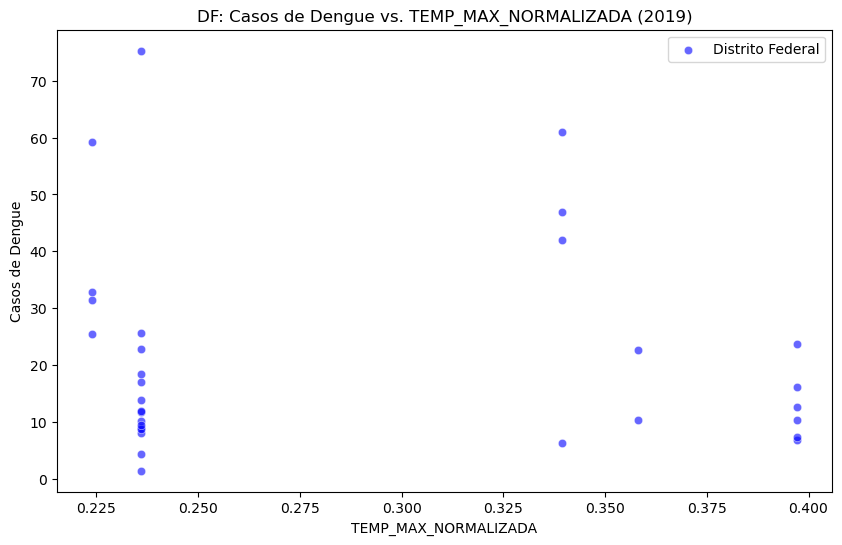

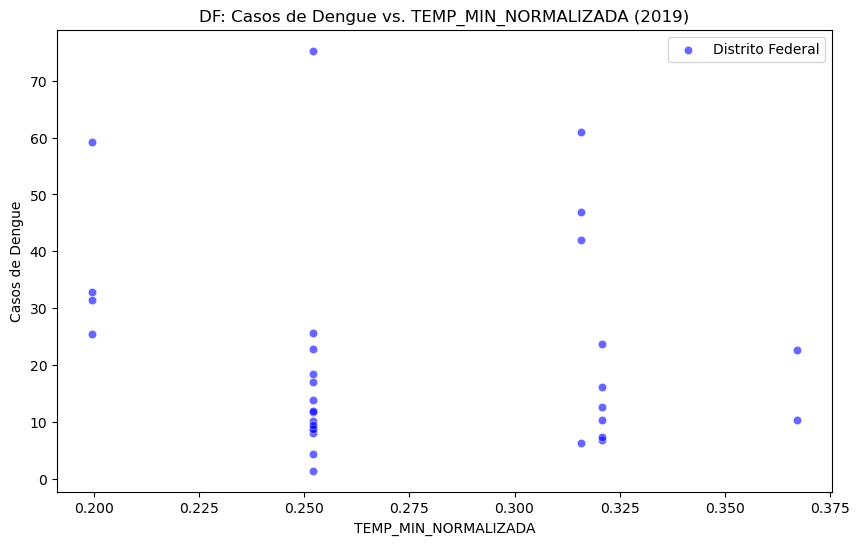

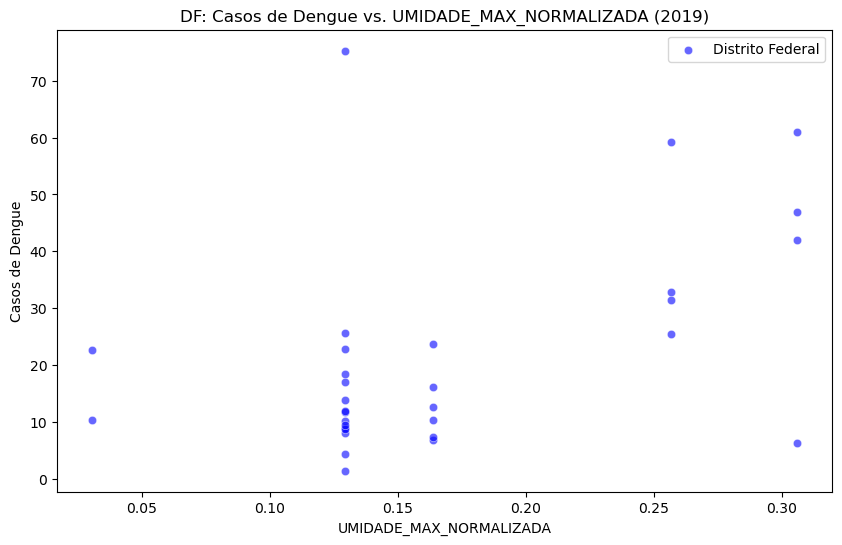

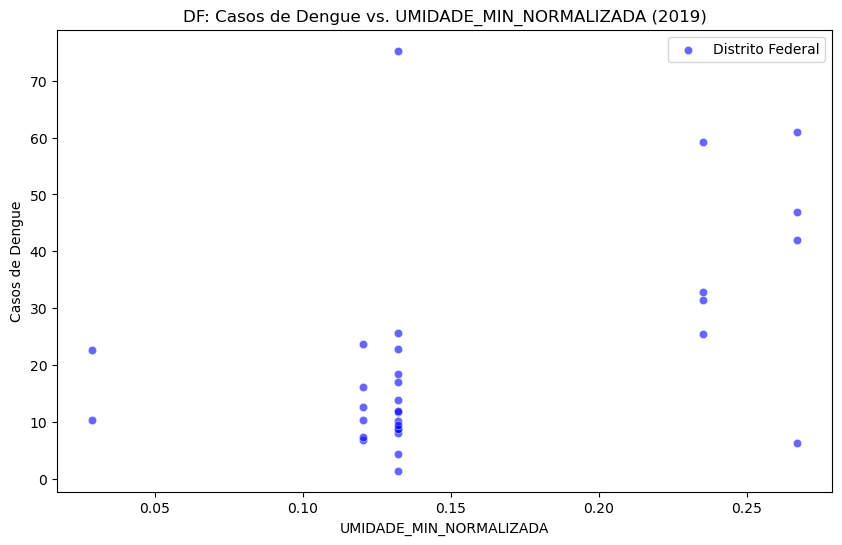

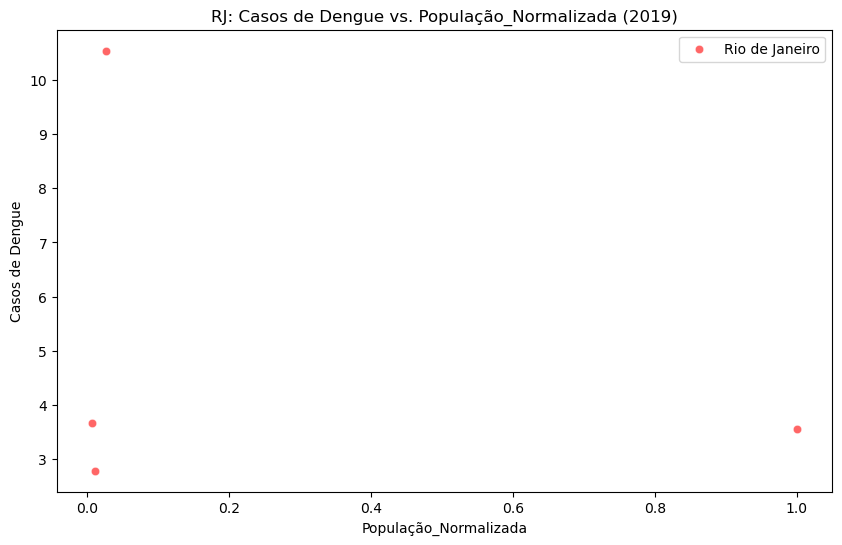

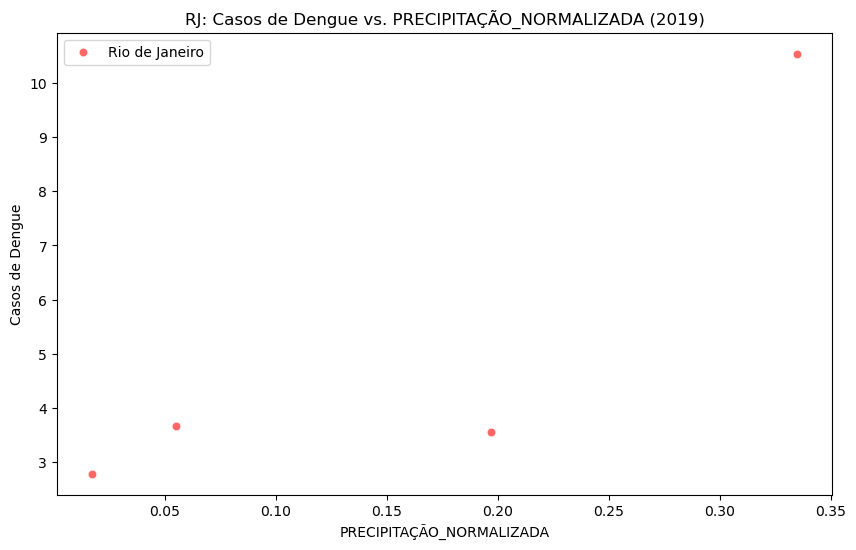

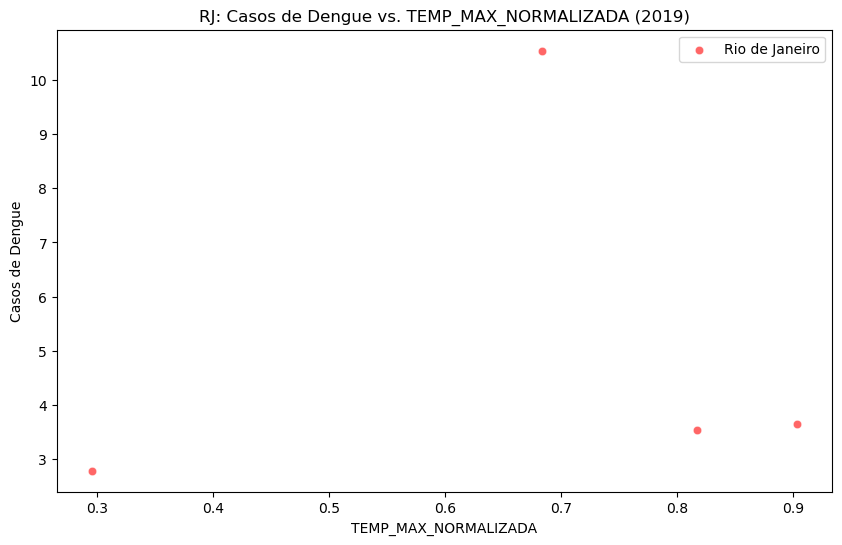

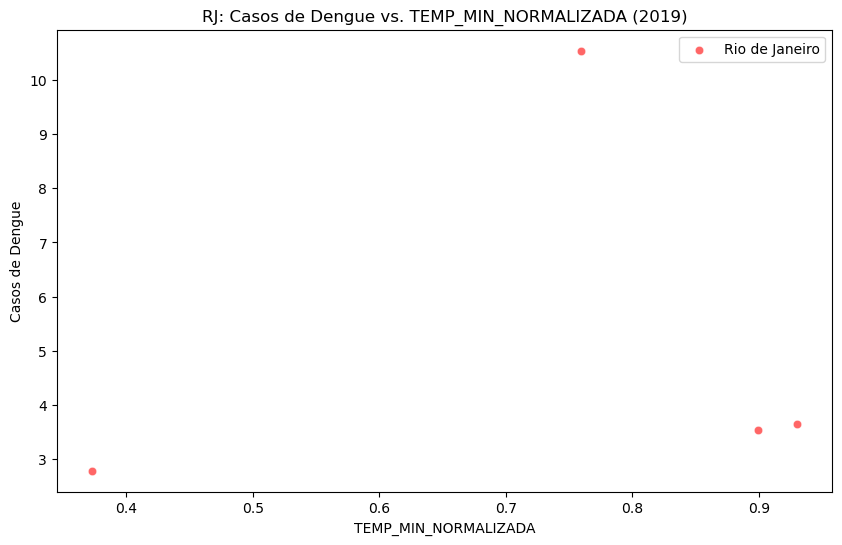

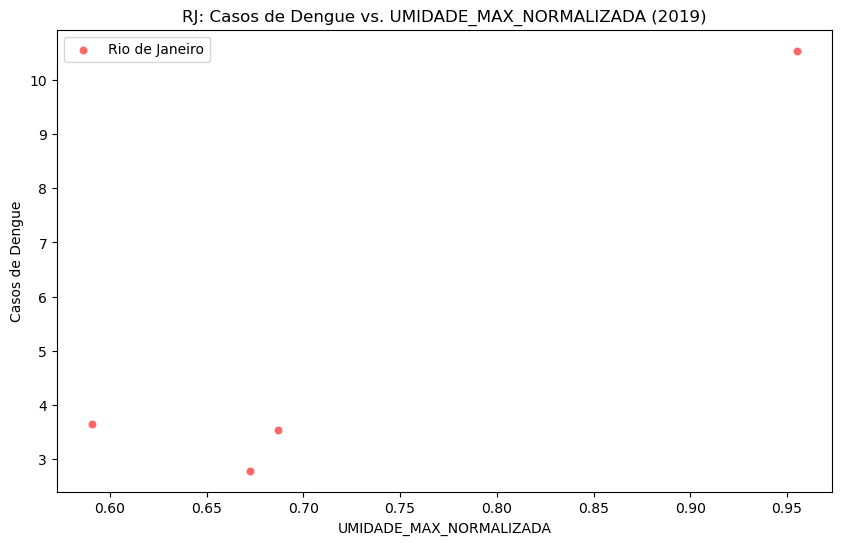

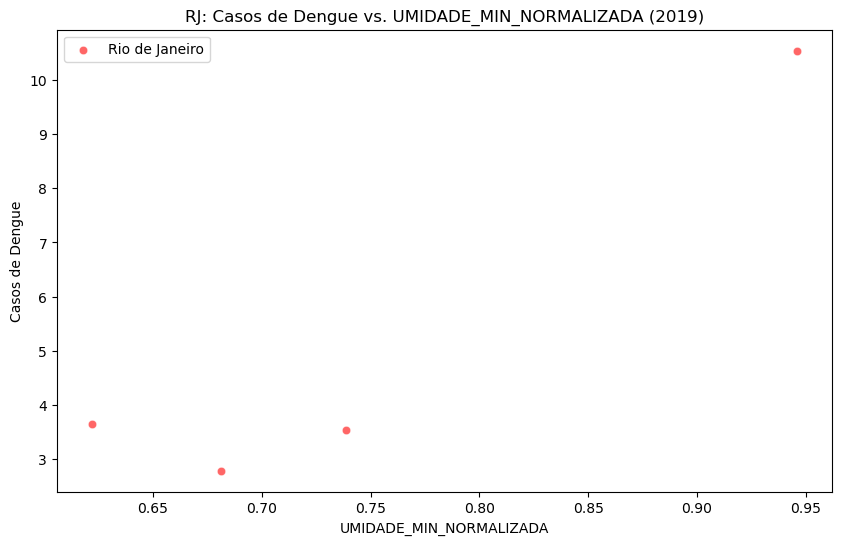


Análise descritiva para Rio de Janeiro (ano 2020):
             Casos  População_Total  População_Normalizada  \
count     4.000000     4.000000e+00               4.000000   
mean    461.250000     1.623775e+08               0.260908   
std     719.814502     3.058743e+08               0.492800   
min      18.000000     4.835400e+06               0.007089   
25%      82.500000     6.315450e+06               0.009473   
50%     145.500000     1.177610e+07               0.018271   
75%     524.250000     1.678381e+08               0.269705   
max    1536.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count            4.000000                  4.000000              4.000000   
mean             0.815960                  0.402976              0.812264   
std              0.610189                  0.424989              0.174672   
min              0.247294                  0.097268              0.636365   
25% 

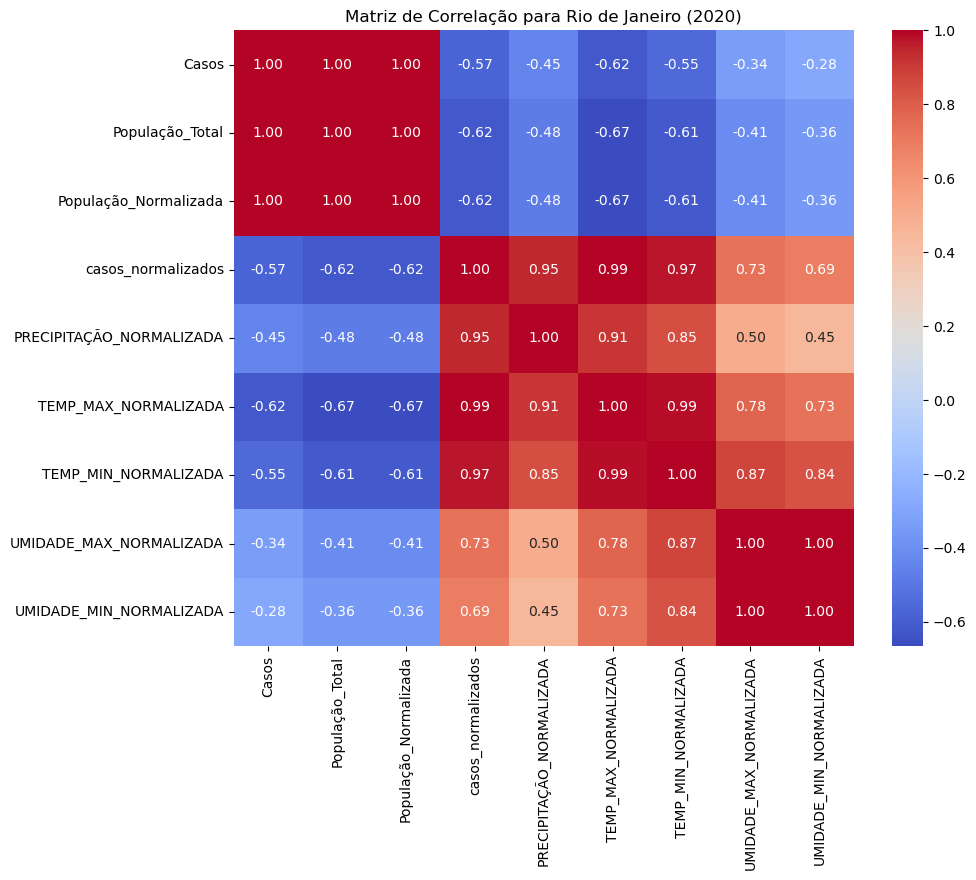


Matriz de correlação para Distrito Federal (ano 2020):
                             Casos  População_Total  População_Normalizada  \
Casos                     1.000000         0.818700               0.818700   
População_Total           0.818700         1.000000               1.000000   
População_Normalizada     0.818700         1.000000               1.000000   
casos_normalizados        0.560990         0.066900               0.066900   
PRECIPITAÇÃO_NORMALIZADA  0.230128         0.221208               0.221208   
TEMP_MAX_NORMALIZADA      0.335189         0.235067               0.235067   
TEMP_MIN_NORMALIZADA      0.288939         0.265322               0.265322   
UMIDADE_MAX_NORMALIZADA  -0.164243        -0.255967              -0.255967   
UMIDADE_MIN_NORMALIZADA  -0.210960        -0.273057              -0.273057   

                          casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  \
Casos                               0.560990                  0.230128   
População_Total

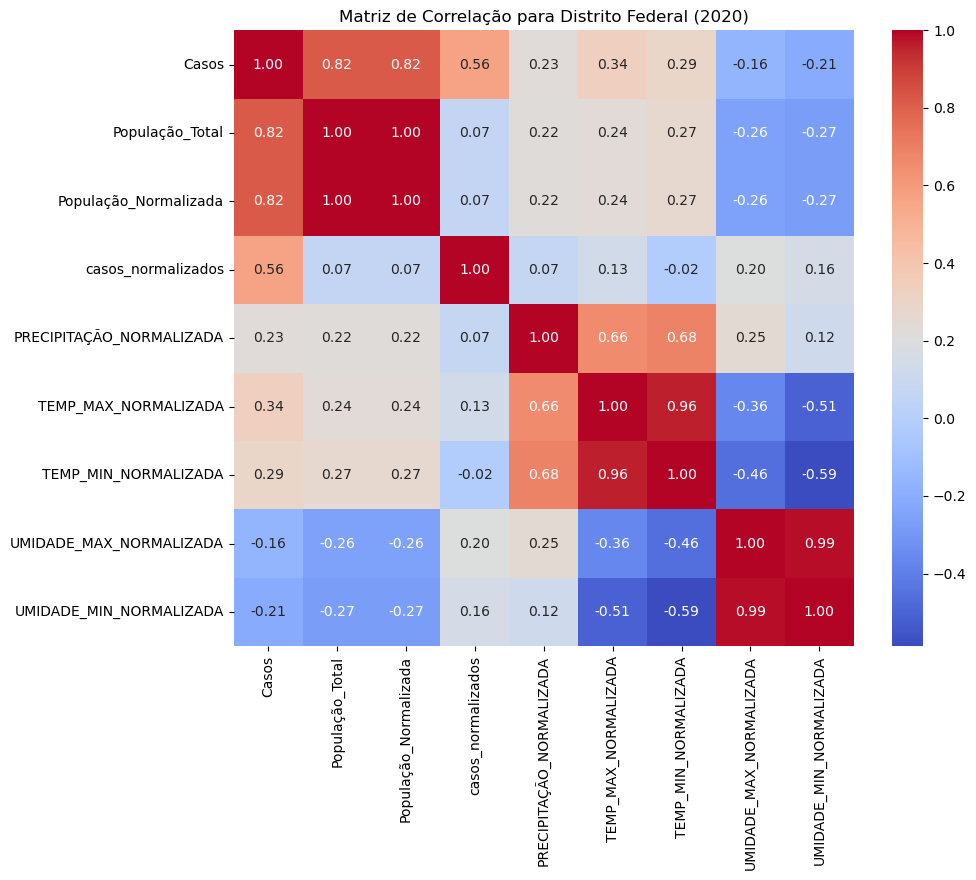

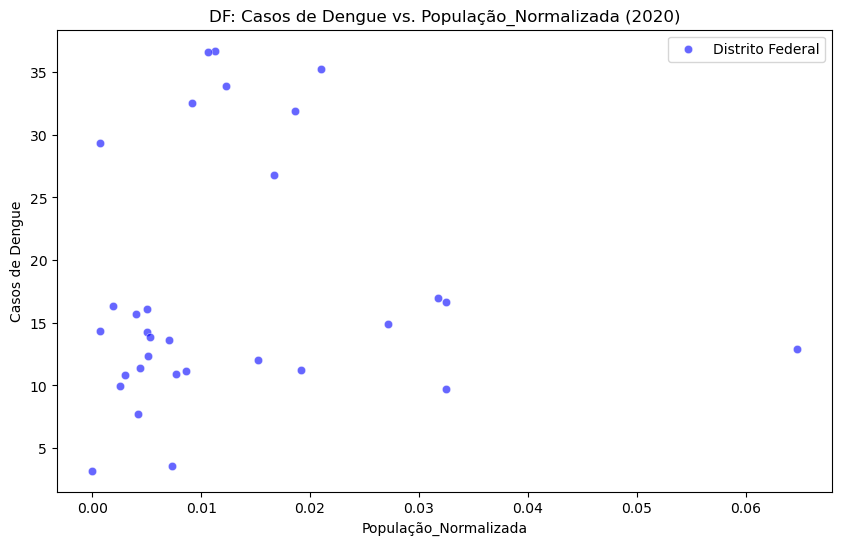

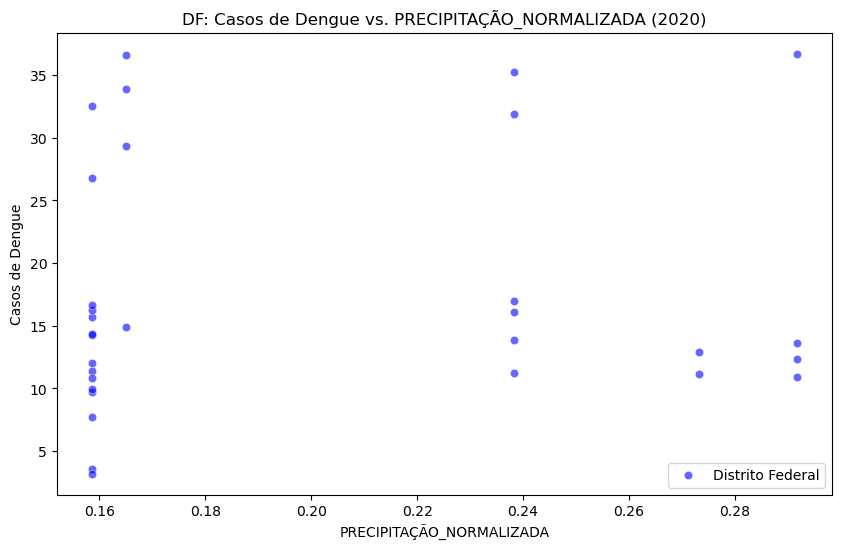

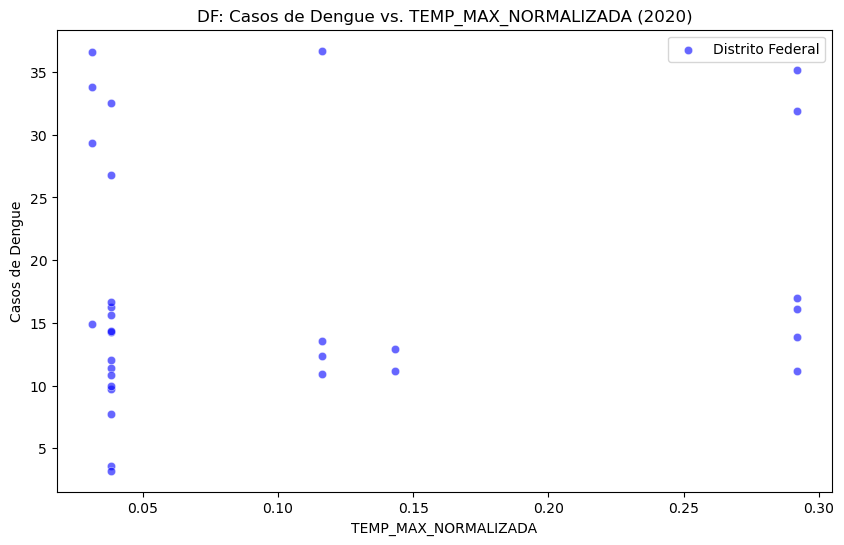

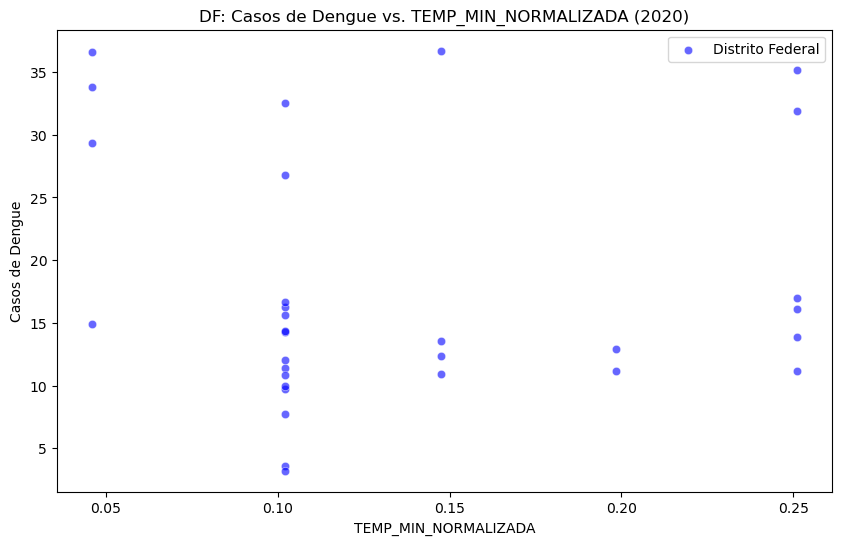

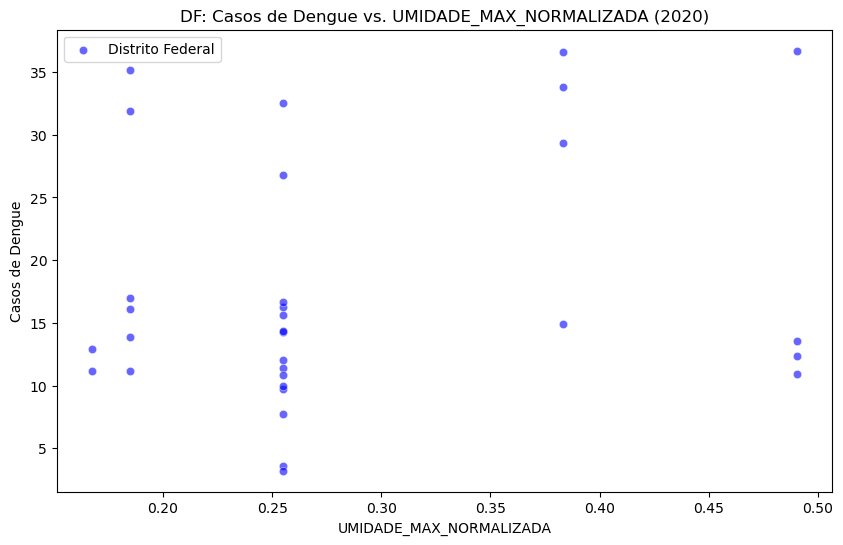

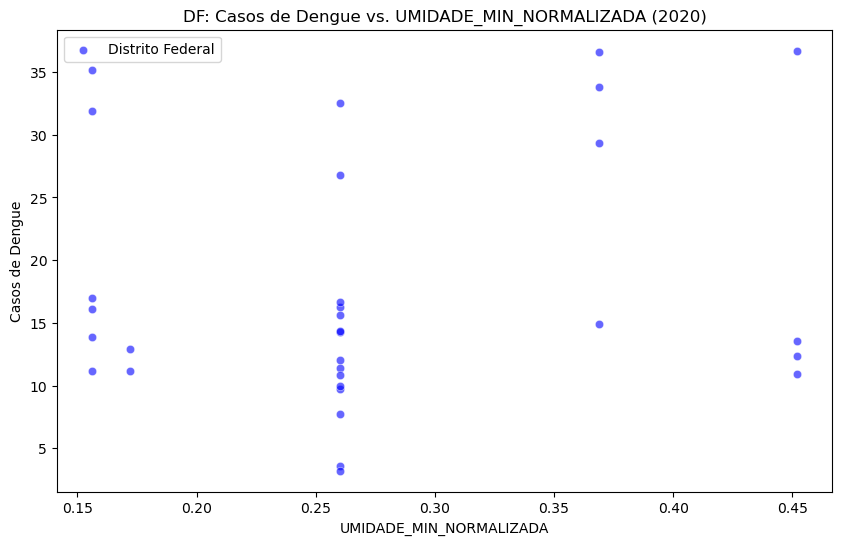

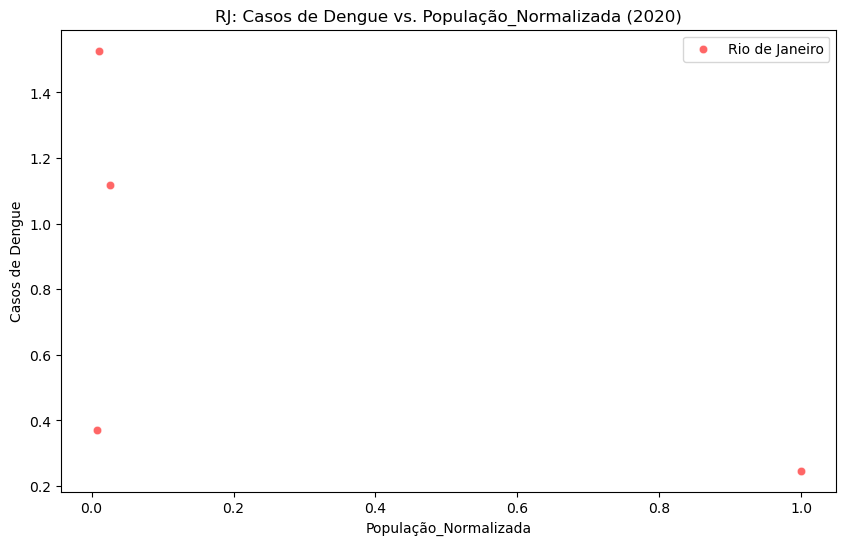

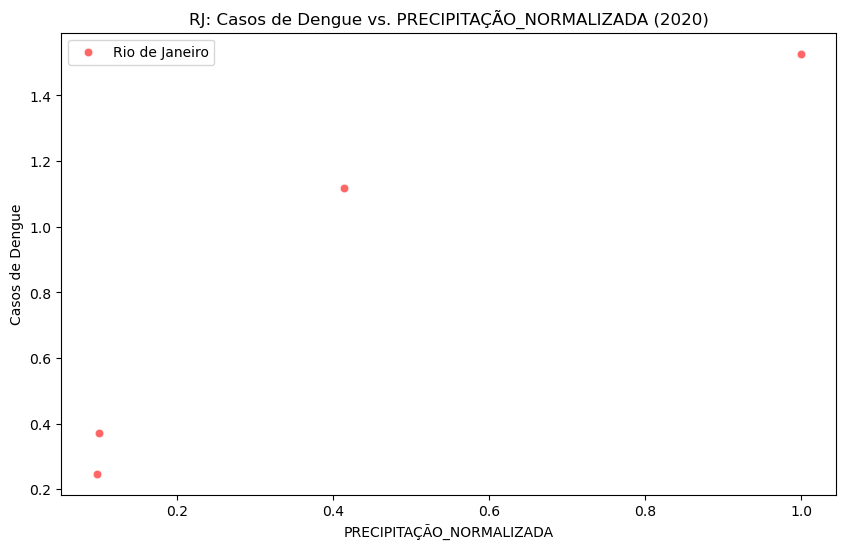

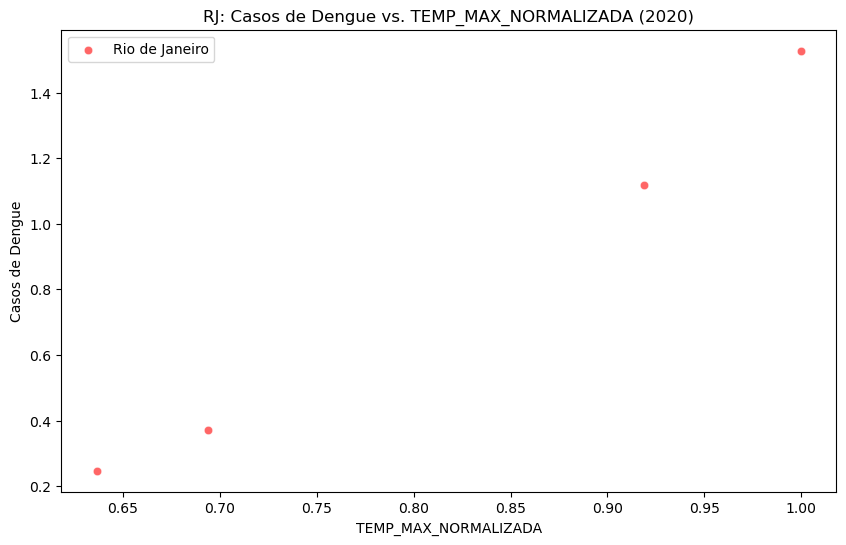

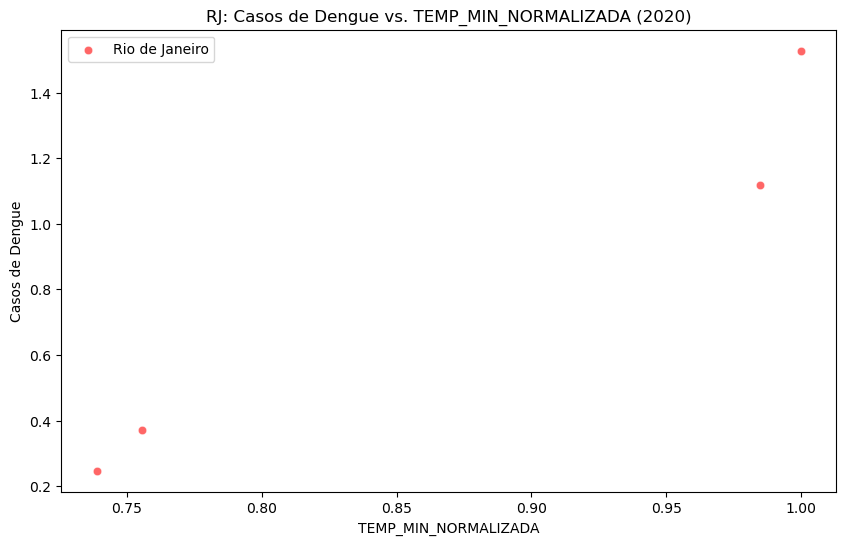

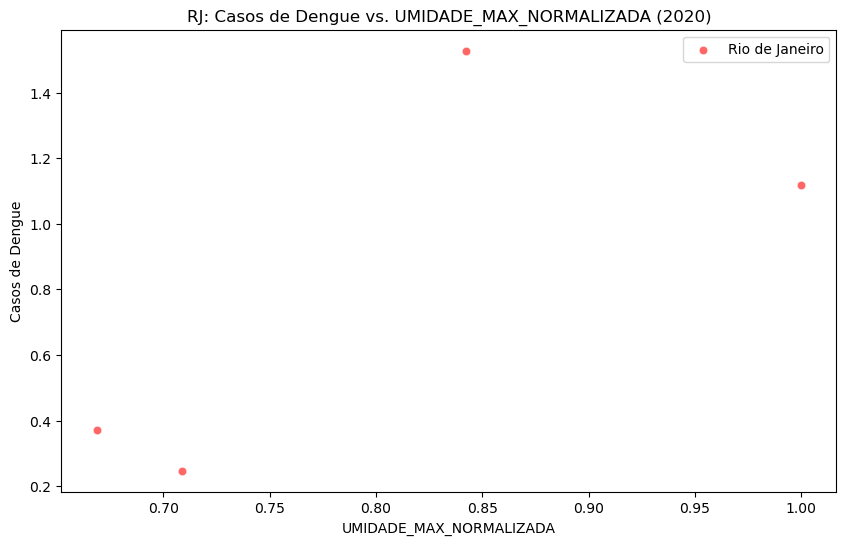

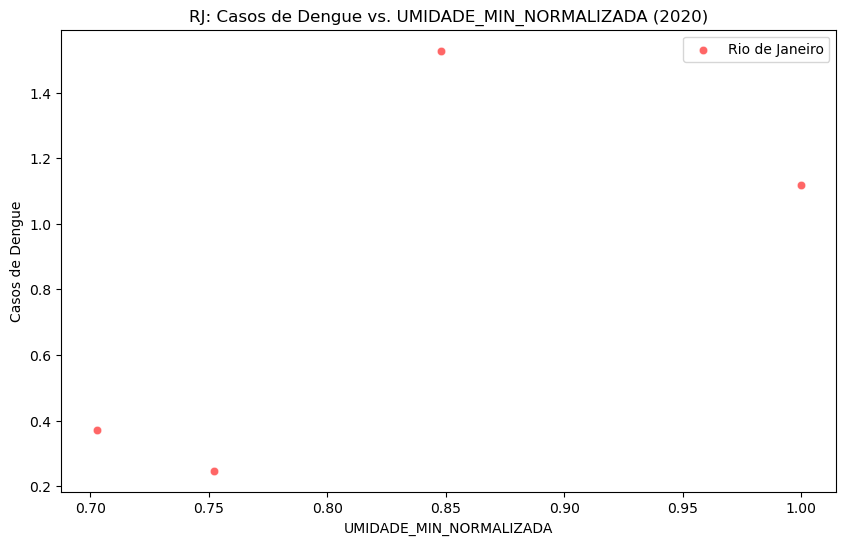


Análise descritiva para Rio de Janeiro (ano 2021):
             Casos  População_Total  População_Normalizada  \
count     4.000000     4.000000e+00               4.000000   
mean    386.000000     1.623775e+08               0.260908   
std     579.359992     3.058743e+08               0.492800   
min      91.000000     4.835400e+06               0.007089   
25%      93.250000     6.315450e+06               0.009473   
50%      99.000000     1.177610e+07               0.018271   
75%     391.750000     1.678381e+08               0.269705   
max    1255.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count            4.000000                  4.000000              4.000000   
mean             1.025924                  0.103818              0.419058   
std              0.770699                  0.040415              0.285571   
min              0.202054                  0.079648              0.000734   
25% 

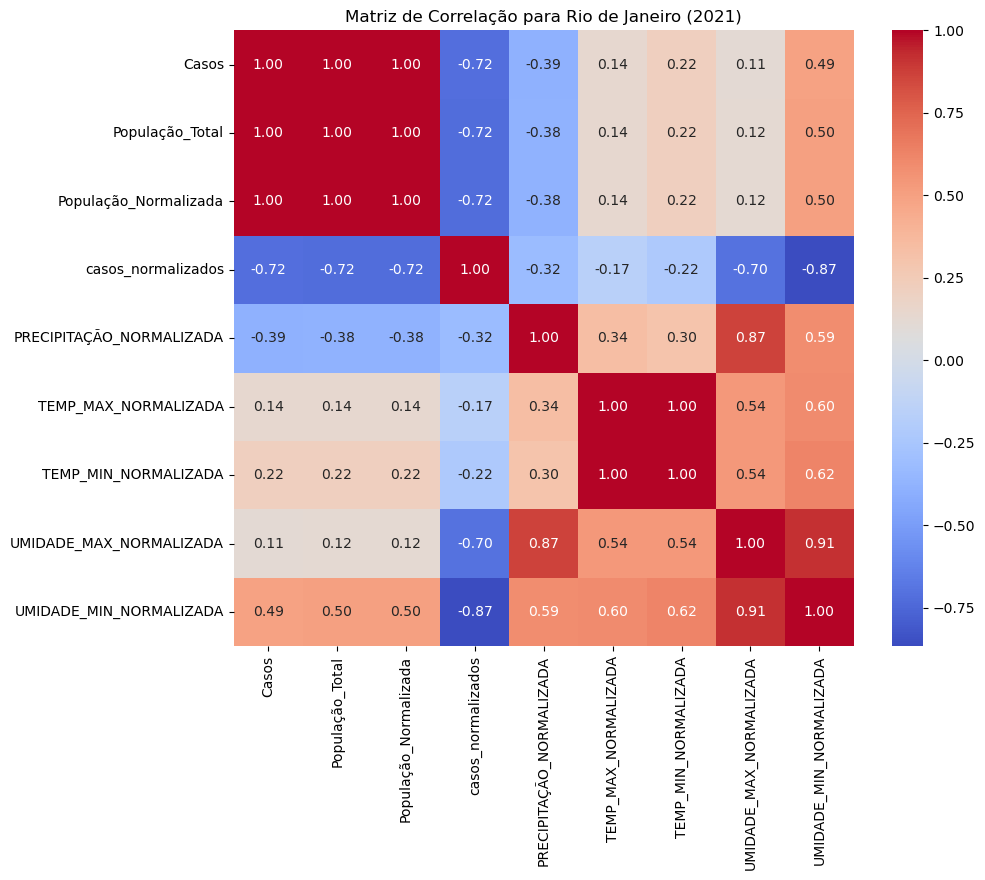


Matriz de correlação para Distrito Federal (ano 2021):
                             Casos  População_Total  População_Normalizada  \
Casos                     1.000000         0.576778               0.576778   
População_Total           0.576778         1.000000               1.000000   
População_Normalizada     0.576778         1.000000               1.000000   
casos_normalizados        0.722608         0.011005               0.011005   
PRECIPITAÇÃO_NORMALIZADA -0.327984        -0.055024              -0.055024   
TEMP_MAX_NORMALIZADA     -0.056853         0.234558               0.234558   
TEMP_MIN_NORMALIZADA     -0.149616         0.275904               0.275904   
UMIDADE_MAX_NORMALIZADA   0.230278        -0.332640              -0.332640   
UMIDADE_MIN_NORMALIZADA   0.238222        -0.315817              -0.315817   

                          casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  \
Casos                               0.722608                 -0.327984   
População_Total

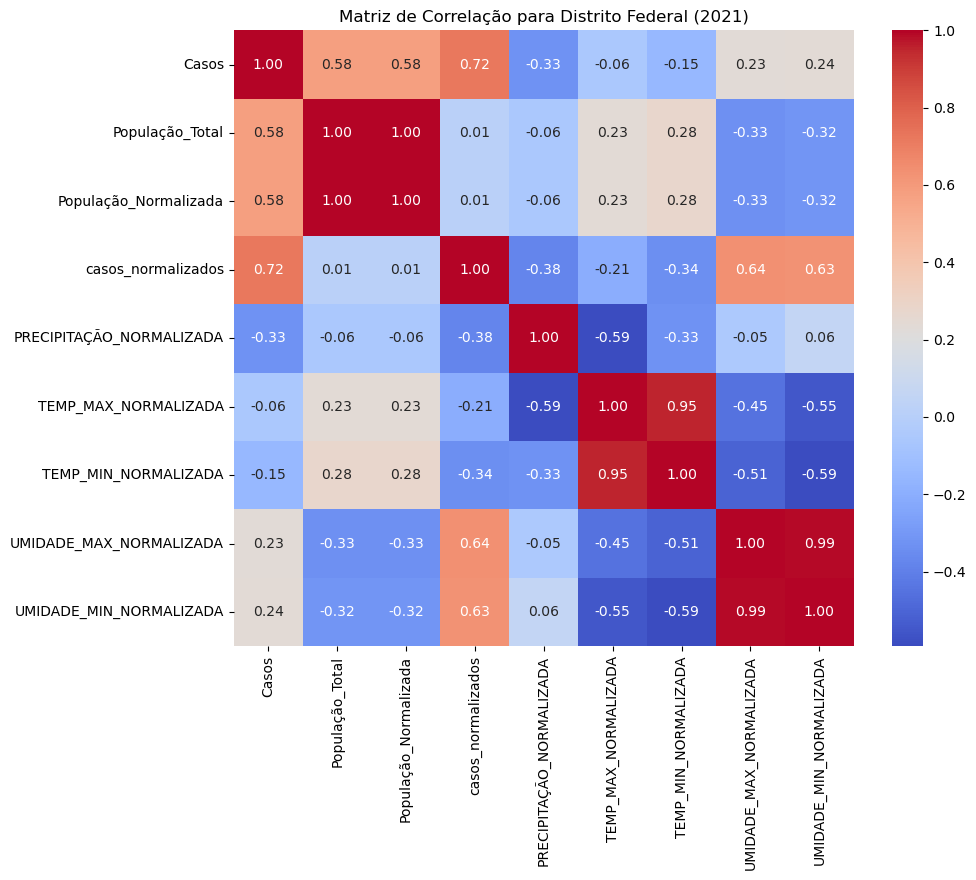

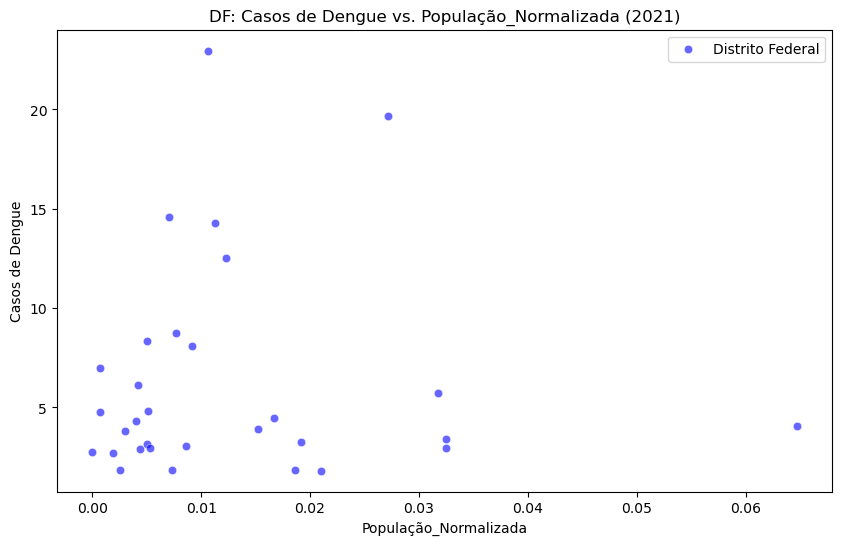

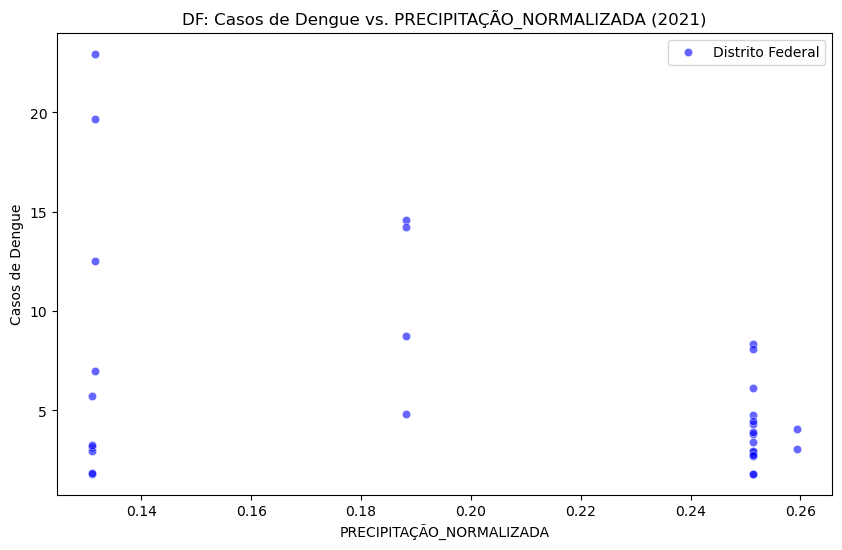

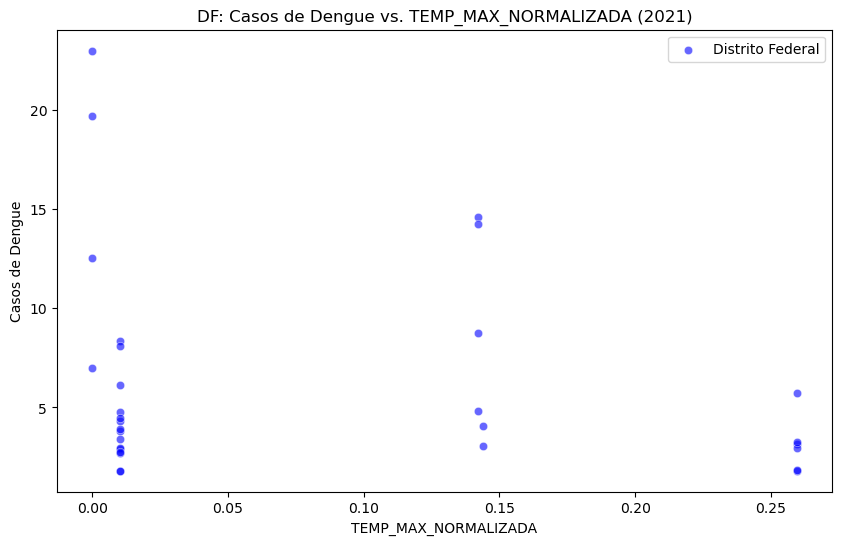

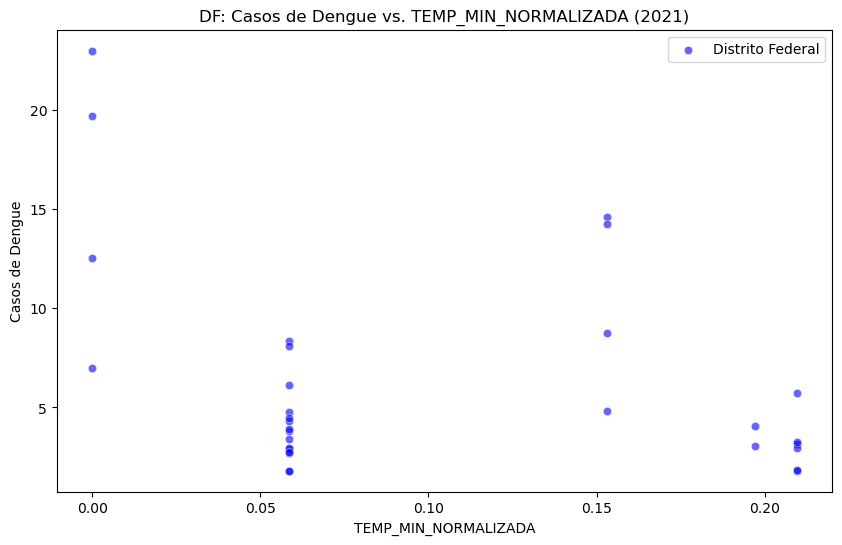

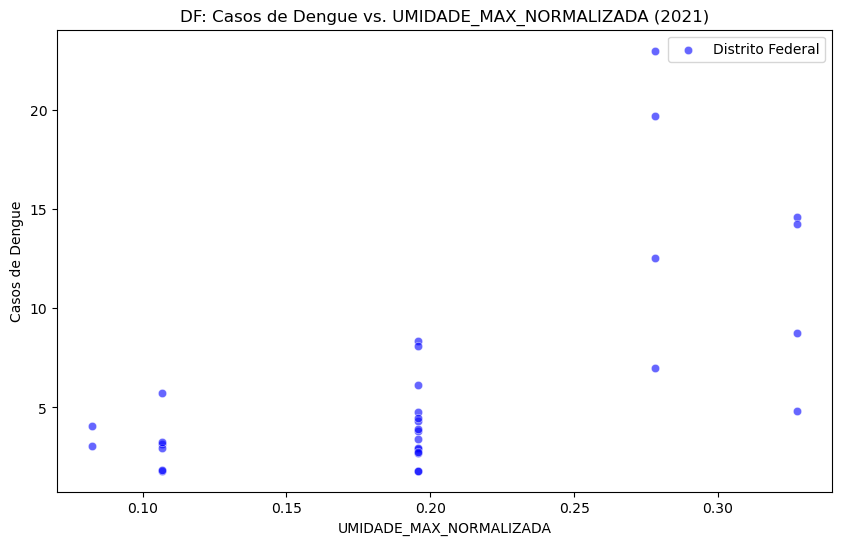

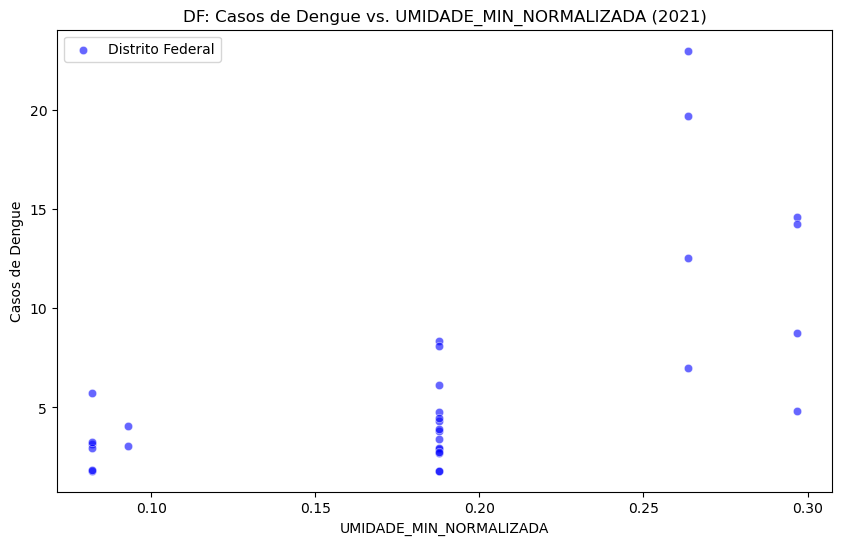

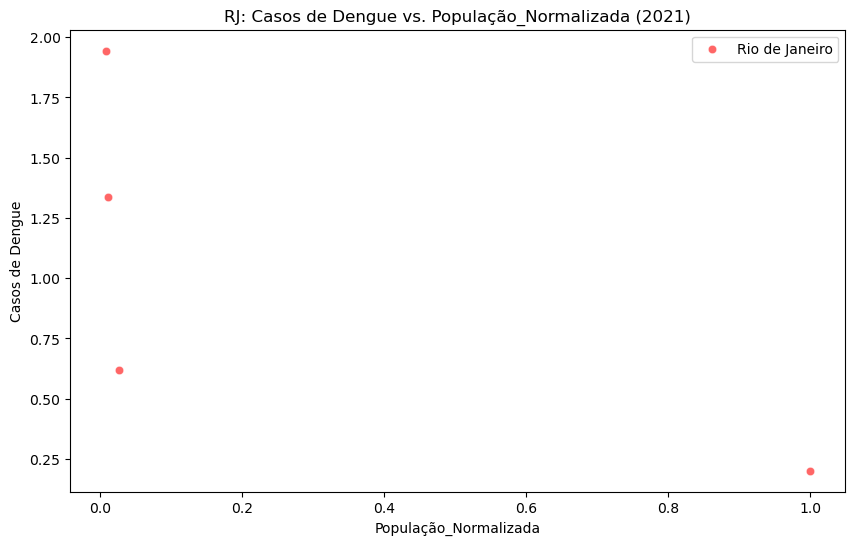

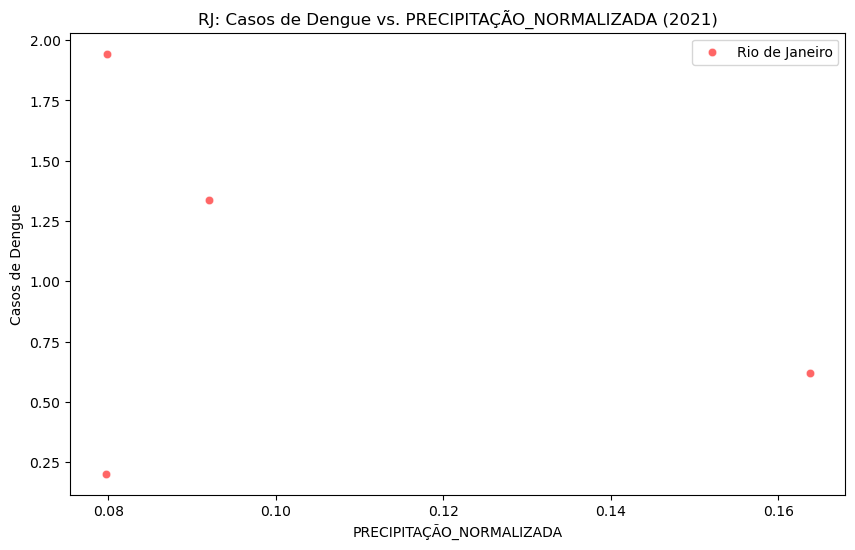

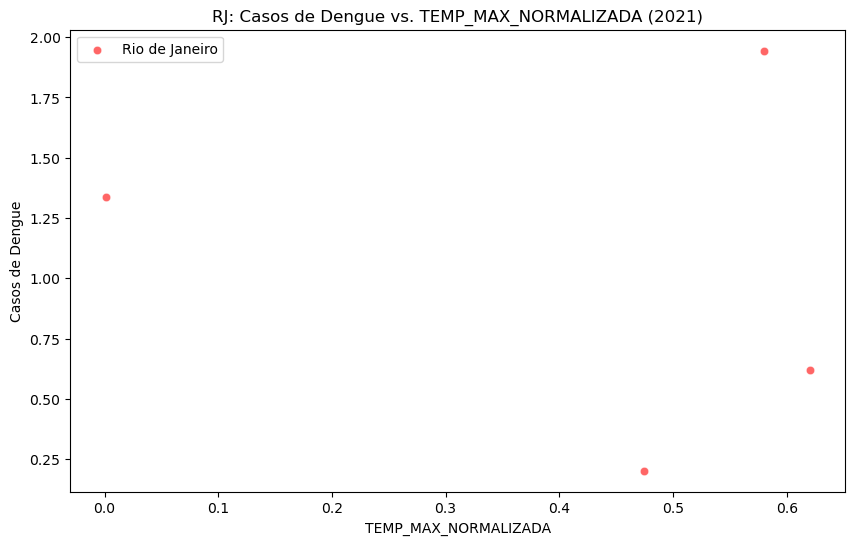

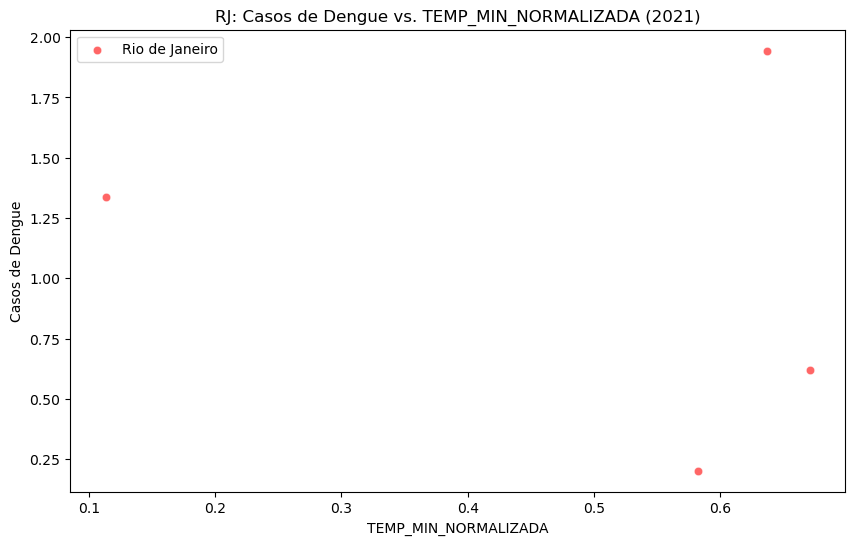

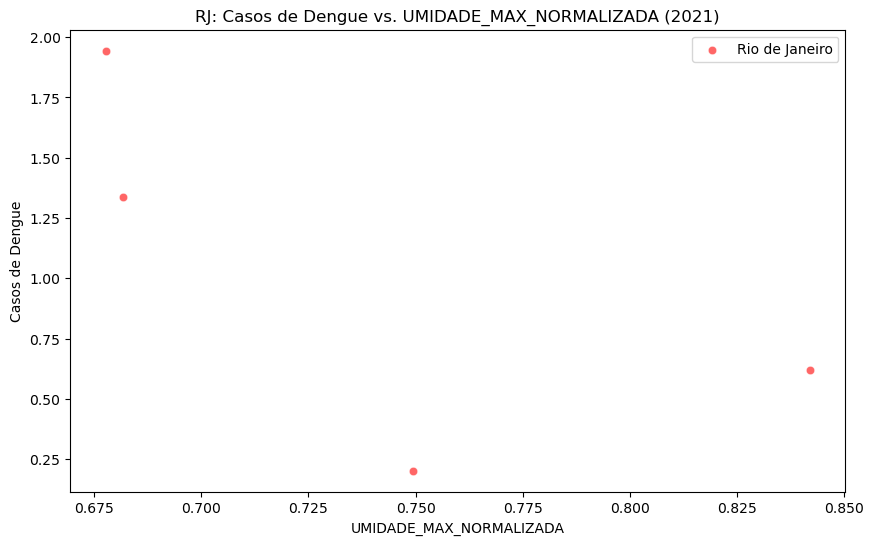

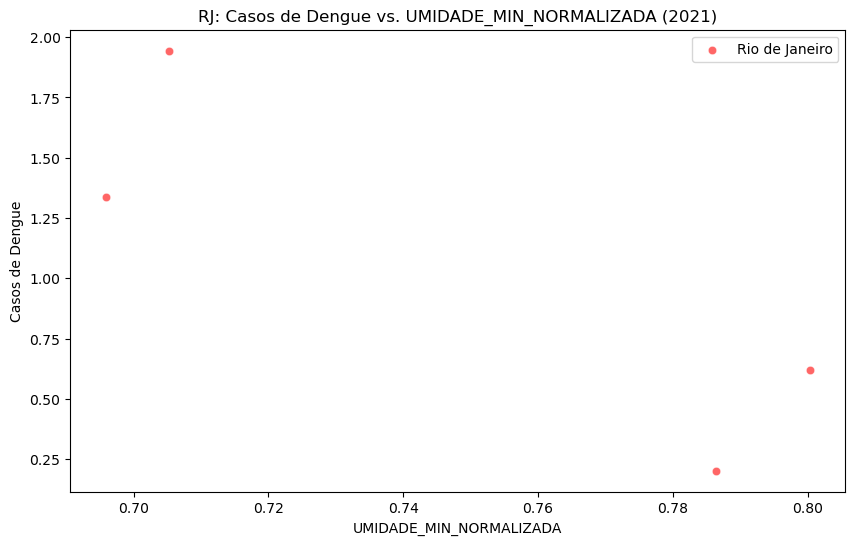


Análise descritiva para Rio de Janeiro (ano 2022):
             Casos  População_Total  População_Normalizada  \
count     4.000000     4.000000e+00               4.000000   
mean   2342.000000     1.623775e+08               0.260908   
std    3513.564951     3.058743e+08               0.492800   
min     146.000000     4.835400e+06               0.007089   
25%     414.500000     6.315450e+06               0.009473   
50%     823.000000     1.177610e+07               0.018271   
75%    2750.500000     1.678381e+08               0.269705   
max    7576.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count            4.000000                  4.000000              4.000000   
mean             7.497910                  0.190319              0.413483   
std             10.771223                  0.158604              0.298727   
min              1.219728                  0.066935              0.003482   
25% 

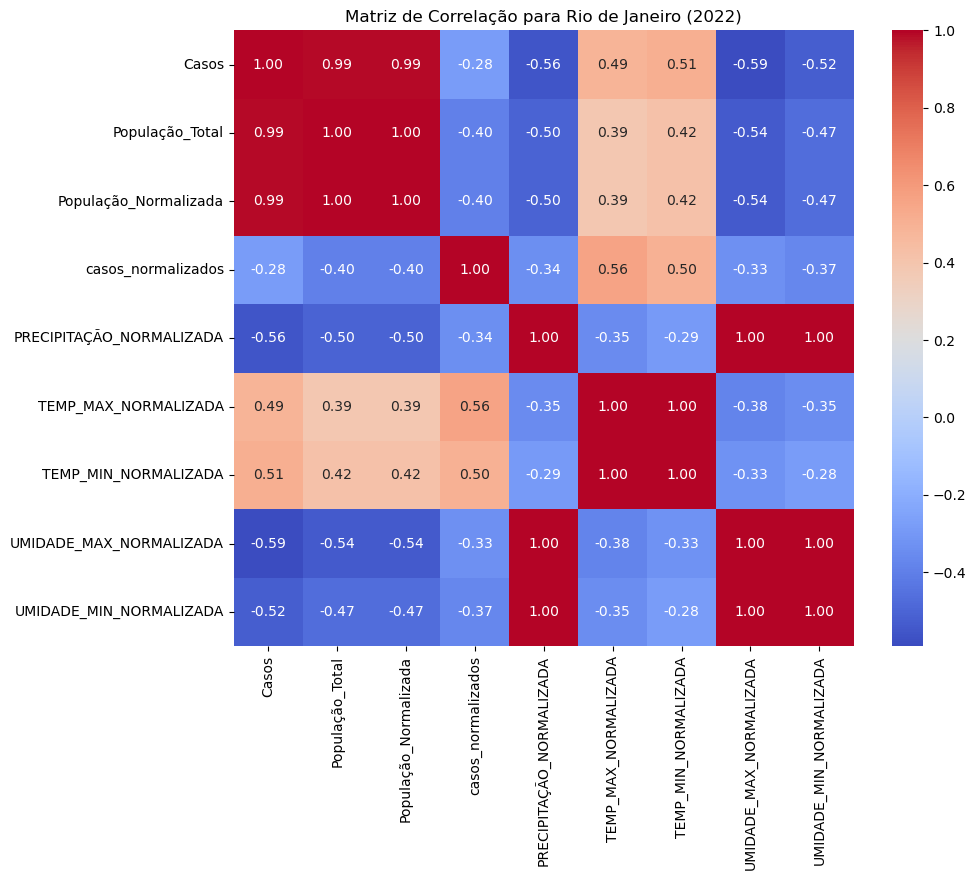


Matriz de correlação para Distrito Federal (ano 2022):
                             Casos  População_Total  População_Normalizada  \
Casos                     1.000000         0.894726               0.894726   
População_Total           0.894726         1.000000               1.000000   
População_Normalizada     0.894726         1.000000               1.000000   
casos_normalizados        0.483366         0.155472               0.155472   
PRECIPITAÇÃO_NORMALIZADA  0.134453         0.245488               0.245488   
TEMP_MAX_NORMALIZADA      0.176459         0.249653               0.249653   
TEMP_MIN_NORMALIZADA      0.218859         0.289742               0.289742   
UMIDADE_MAX_NORMALIZADA  -0.153386        -0.294726              -0.294726   
UMIDADE_MIN_NORMALIZADA  -0.152567        -0.296348              -0.296348   

                          casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  \
Casos                               0.483366                  0.134453   
População_Total

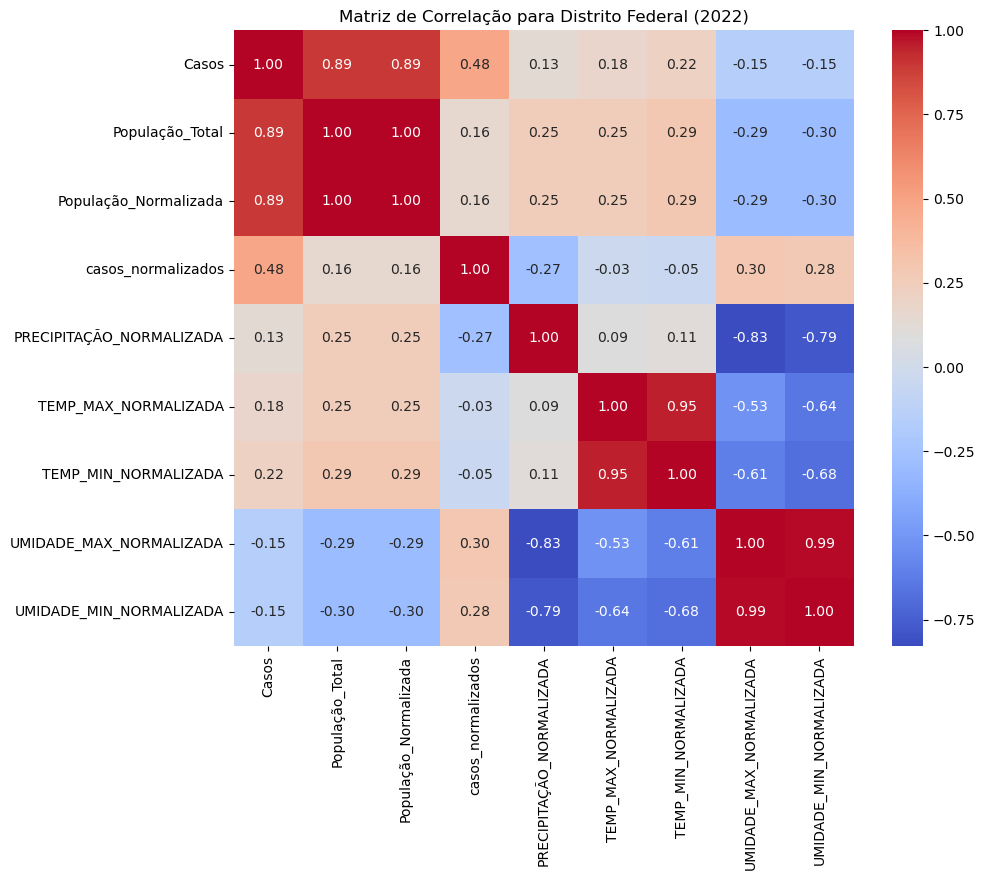

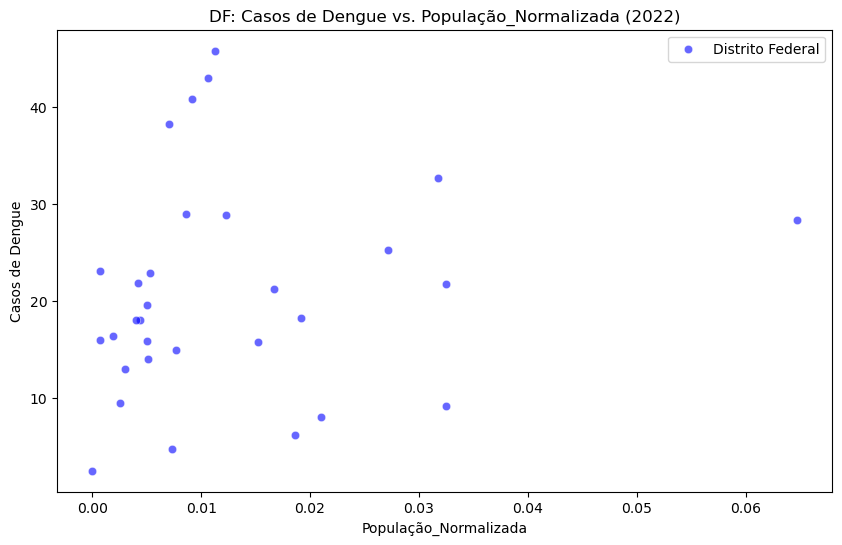

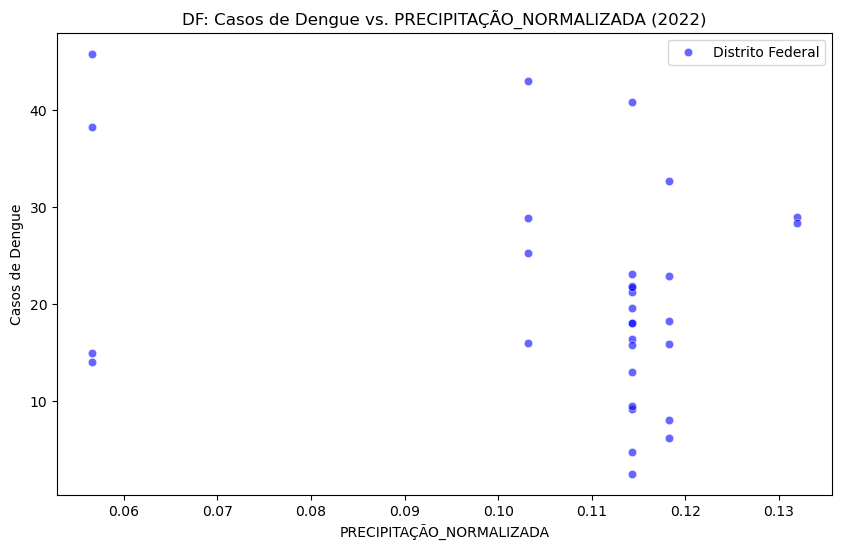

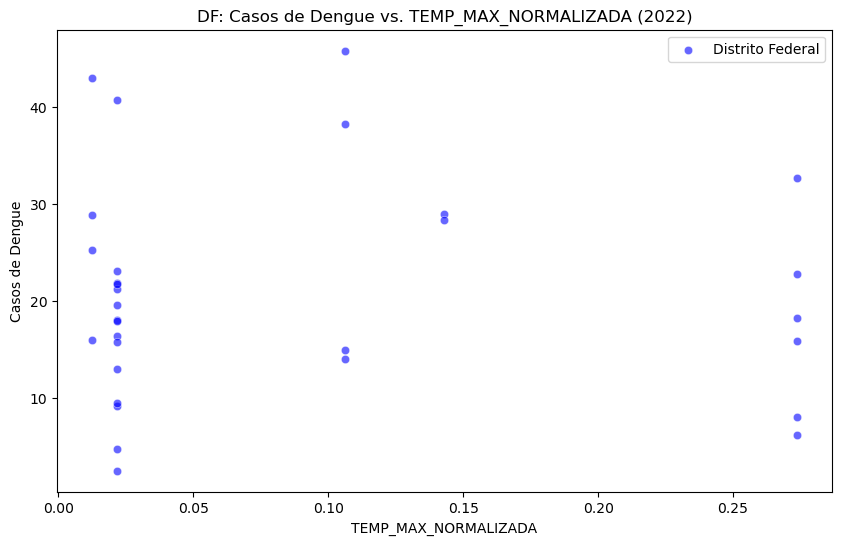

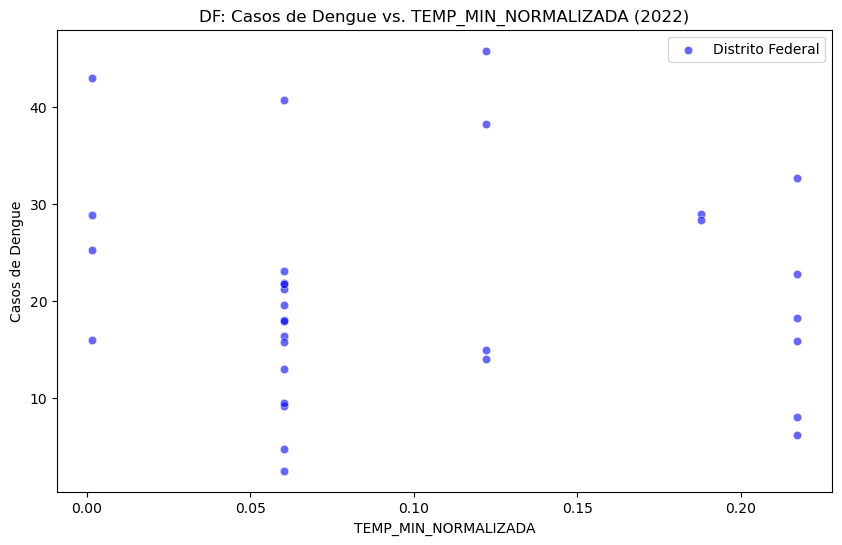

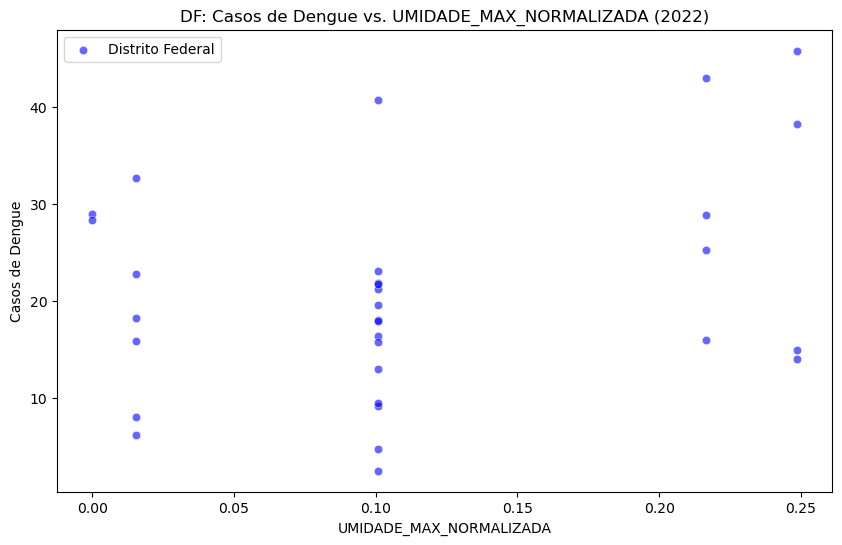

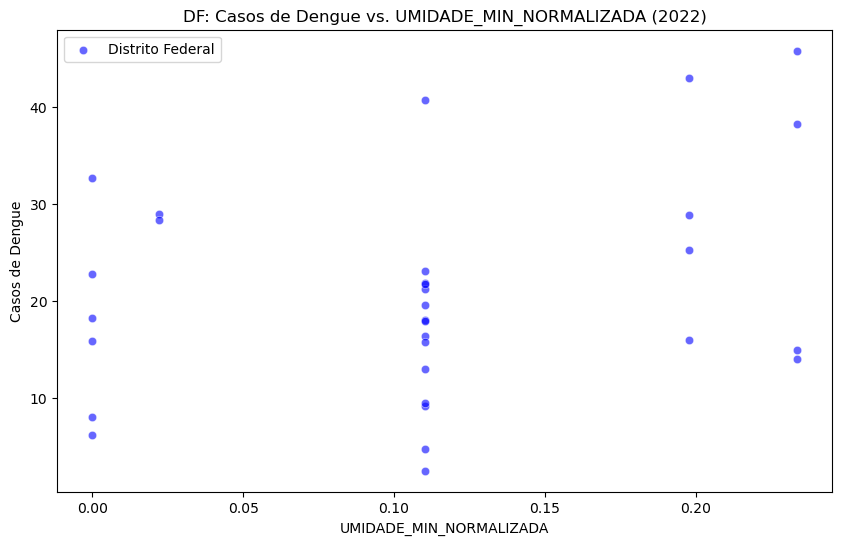

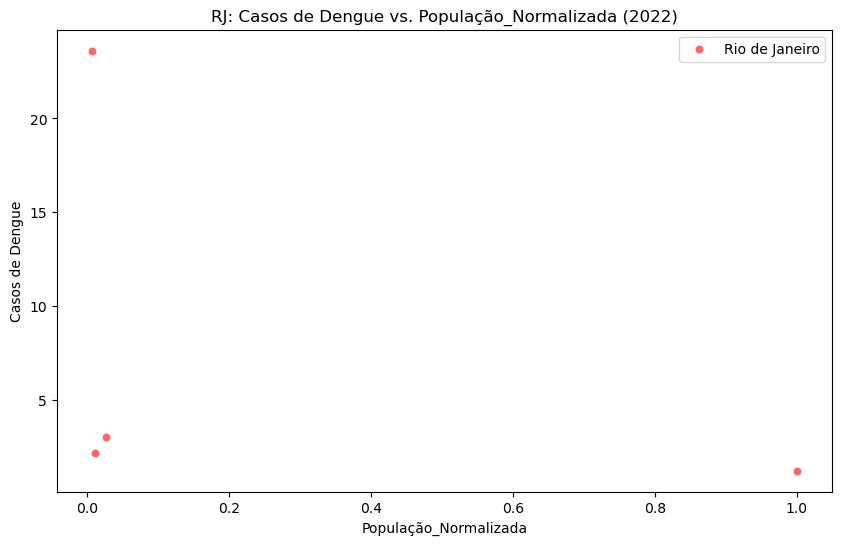

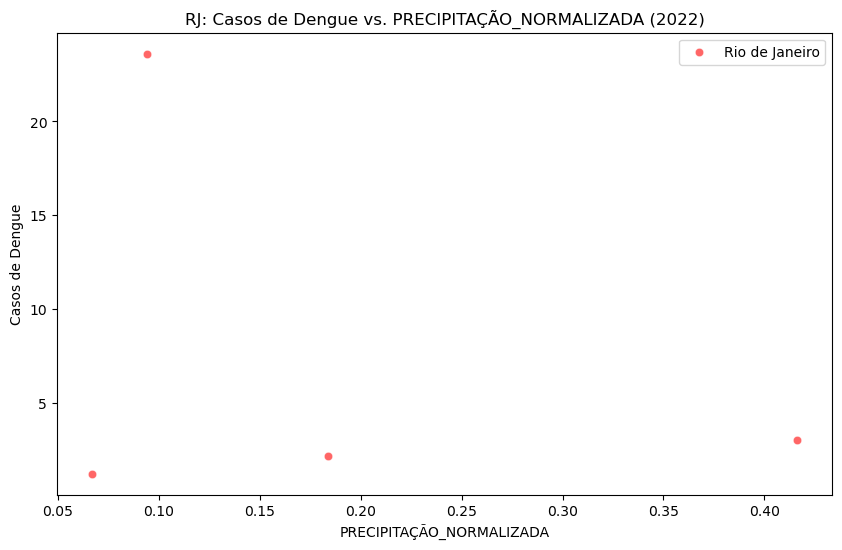

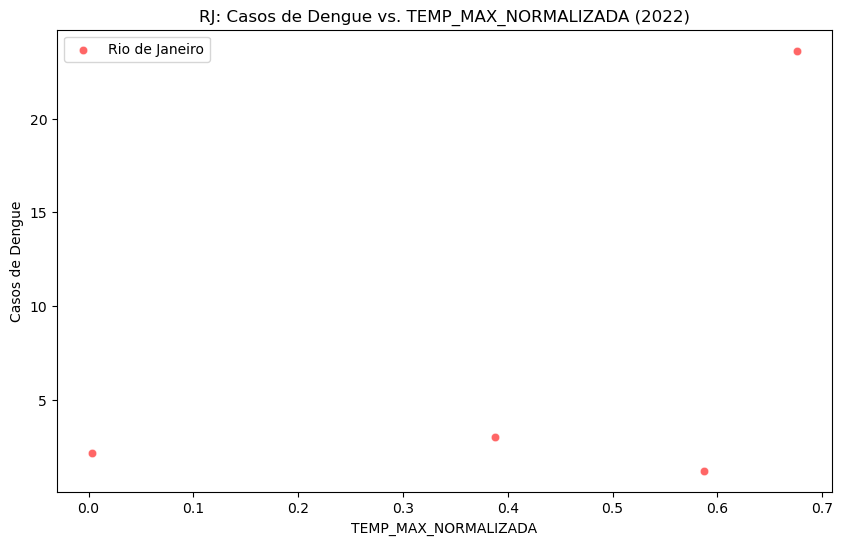

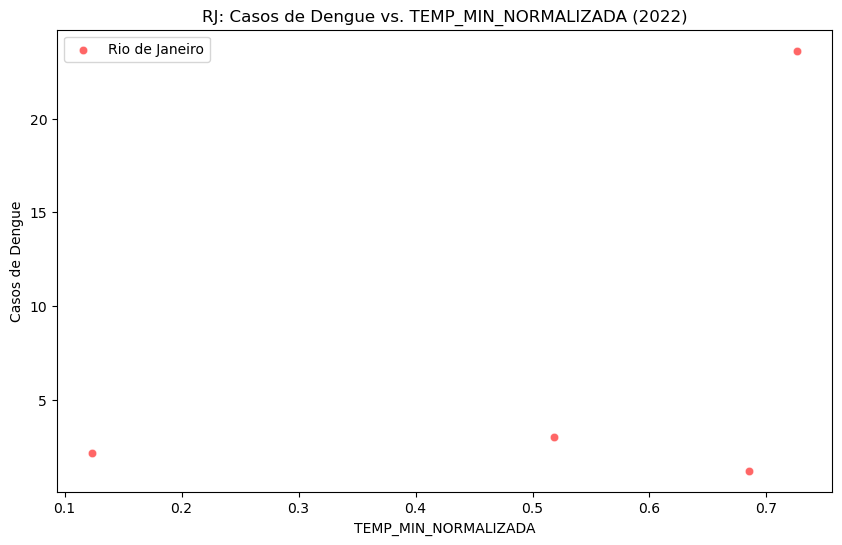

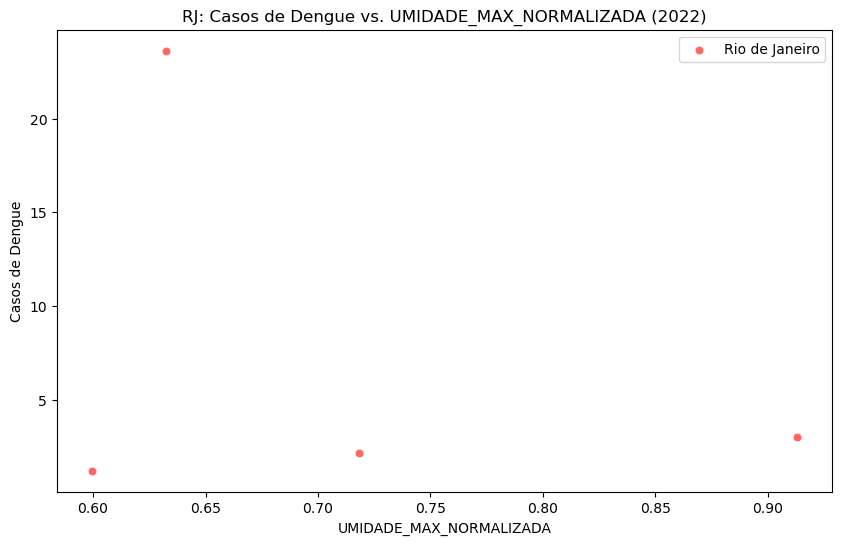

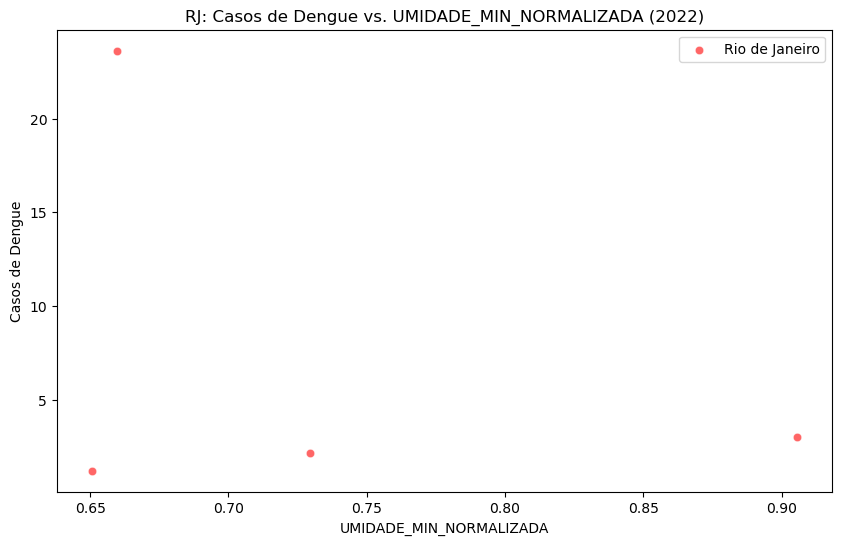


Análise descritiva para Rio de Janeiro (ano 2023):
              Casos  População_Total  População_Normalizada  \
count      4.000000     4.000000e+00               4.000000   
mean   13805.000000     1.623775e+08               0.260908   
std    20144.447275     3.058743e+08               0.492800   
min       80.000000     4.835400e+06               0.007089   
25%     2456.000000     6.315450e+06               0.009473   
50%     5774.000000     1.177610e+07               0.018271   
75%    17123.000000     1.678381e+08               0.269705   
max    43592.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count            4.000000                  4.000000              4.000000   
mean            49.810661                  0.119060              0.651052   
std             81.581279                  0.117003              0.255606   
min              1.174950                  0.000000              0.29776

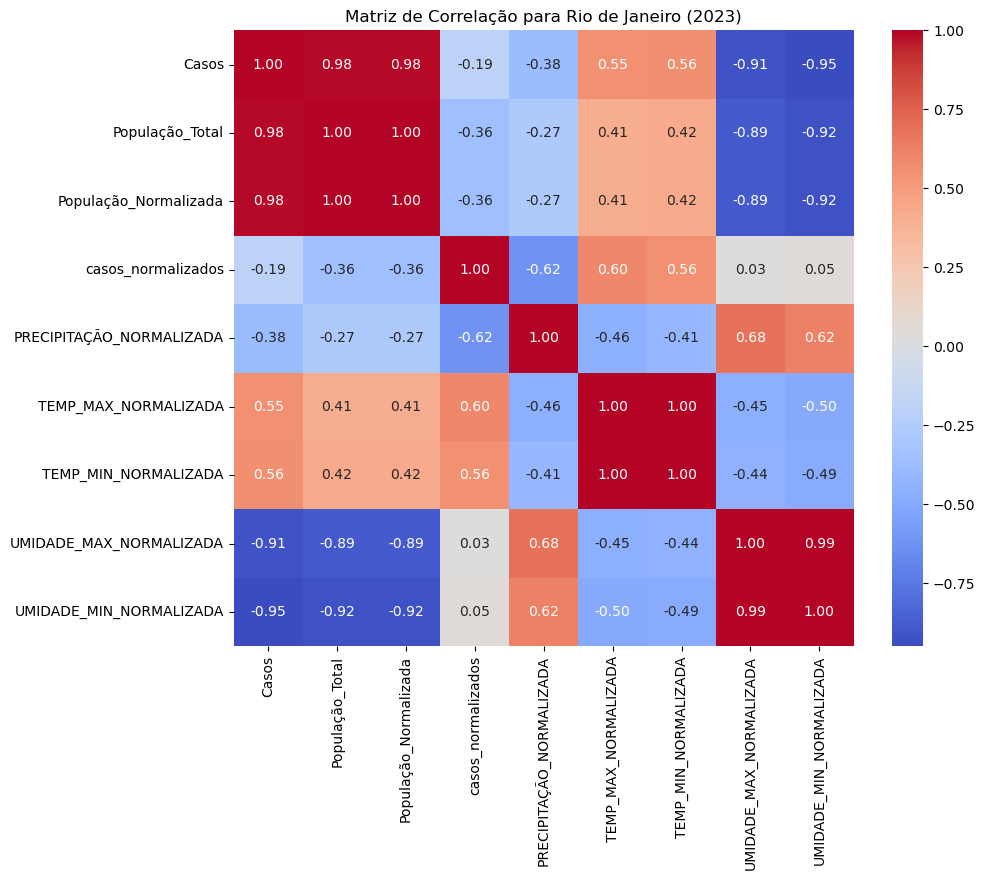


Matriz de correlação para Distrito Federal (ano 2023):
                             Casos  População_Total  População_Normalizada  \
Casos                     1.000000         0.839188               0.839188   
População_Total           0.839188         1.000000               1.000000   
População_Normalizada     0.839188         1.000000               1.000000   
casos_normalizados        0.522791         0.065159               0.065159   
PRECIPITAÇÃO_NORMALIZADA  0.567716         0.404331               0.404331   
TEMP_MAX_NORMALIZADA      0.426762         0.255040               0.255040   
TEMP_MIN_NORMALIZADA      0.495722         0.292115               0.292115   
UMIDADE_MAX_NORMALIZADA  -0.466500        -0.421429              -0.421429   
UMIDADE_MIN_NORMALIZADA  -0.440447        -0.399791              -0.399791   

                          casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  \
Casos                               0.522791                  0.567716   
População_Total

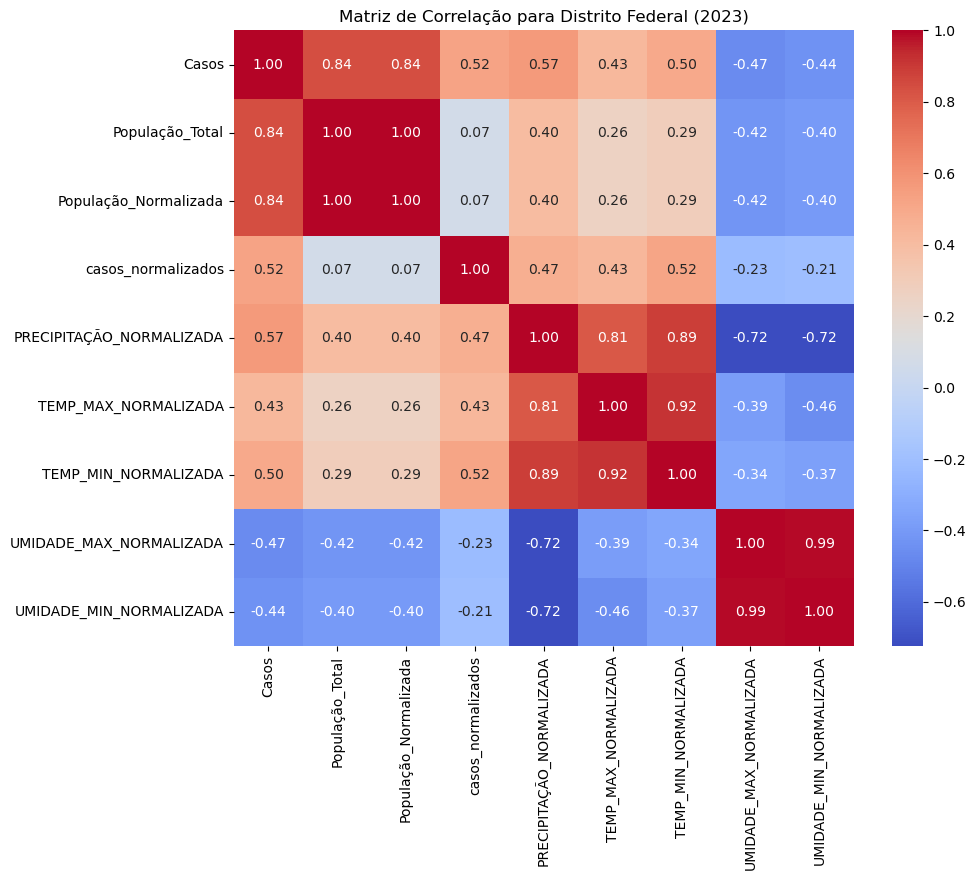

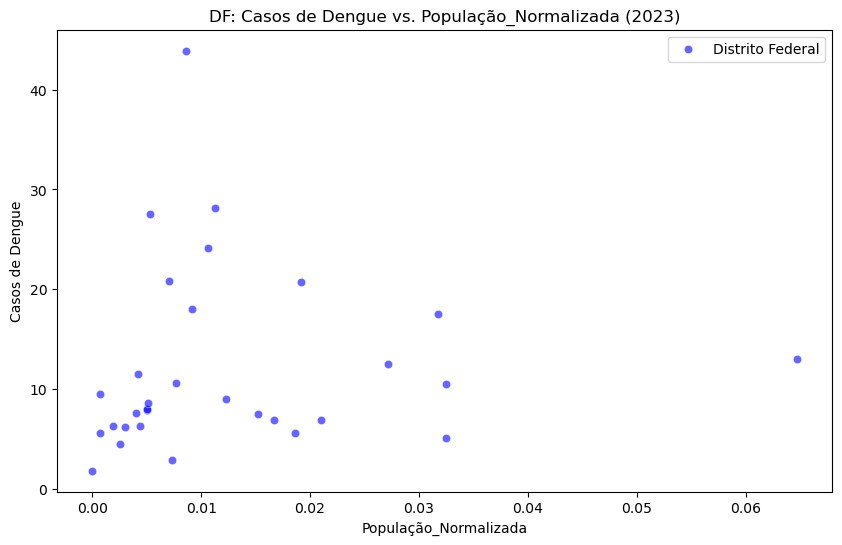

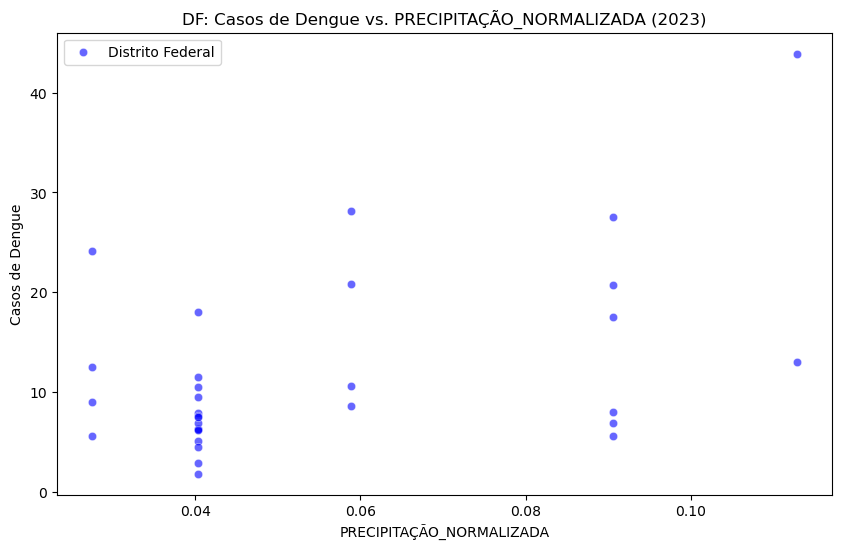

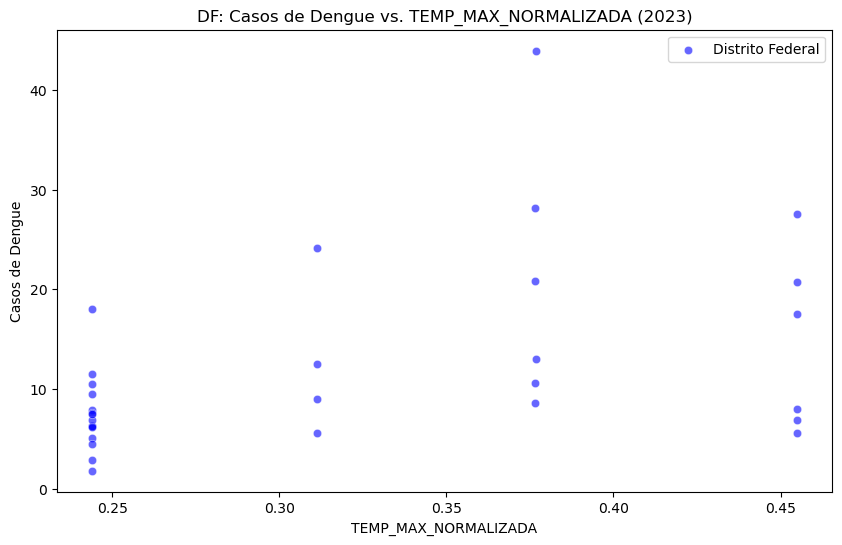

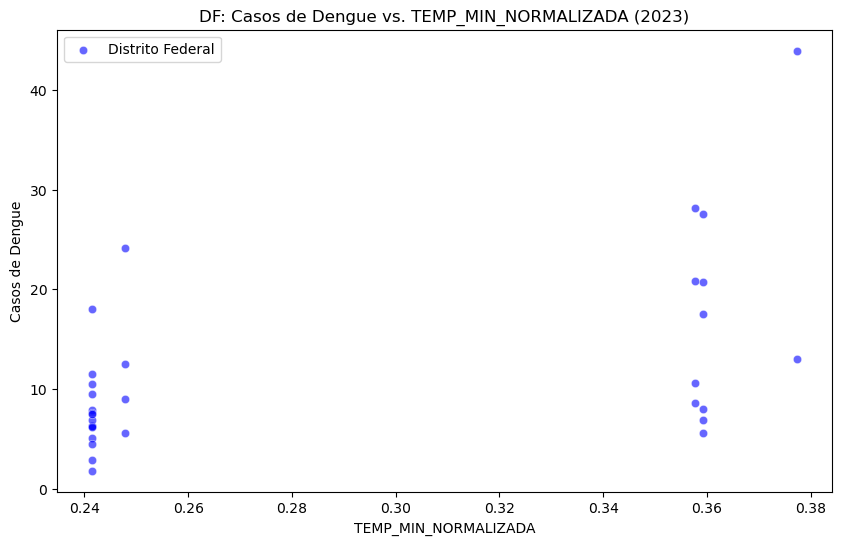

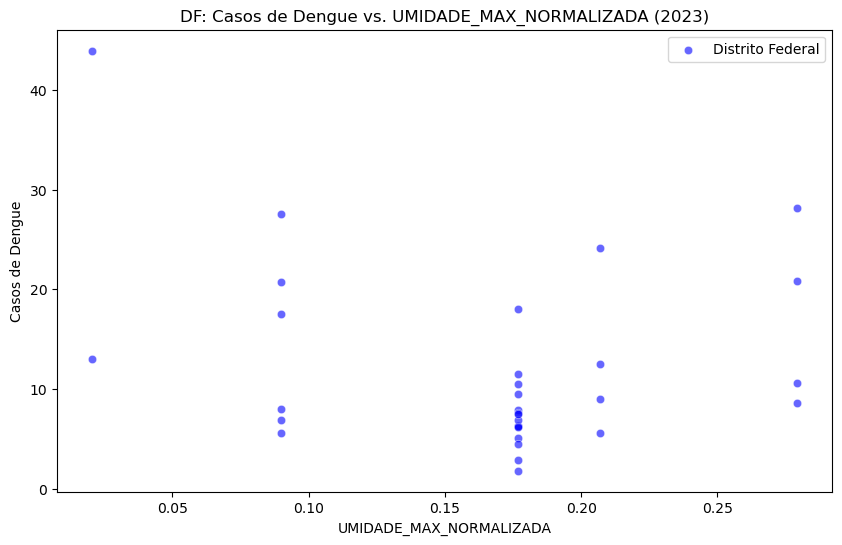

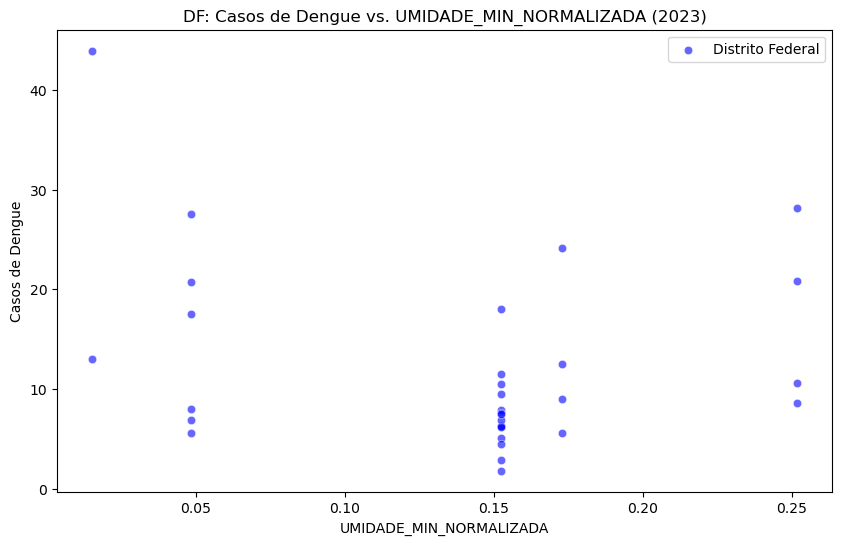

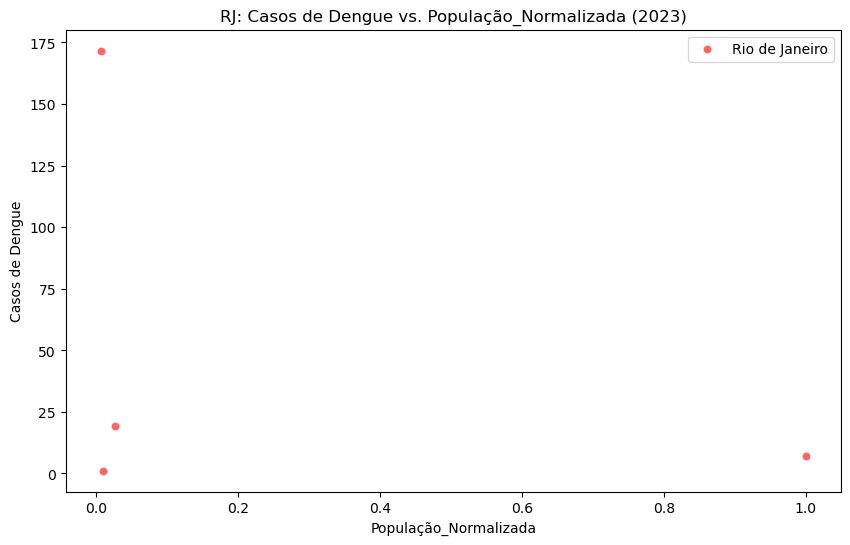

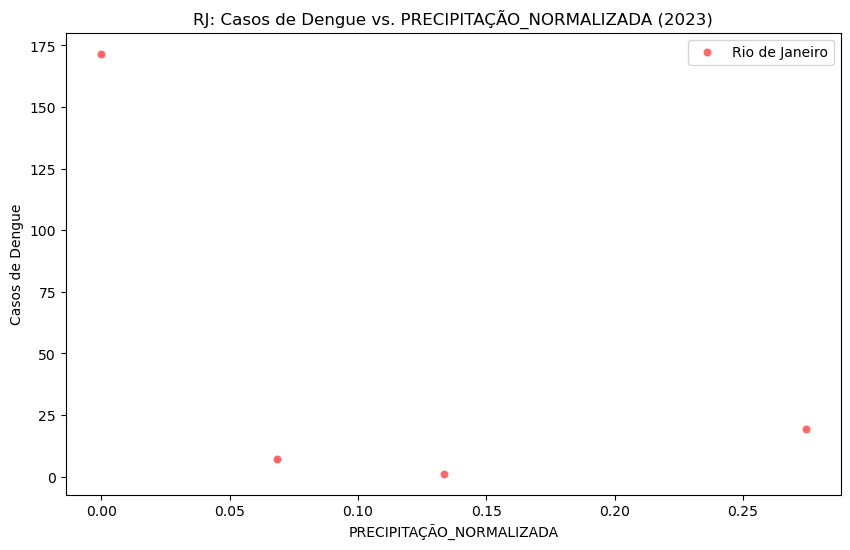

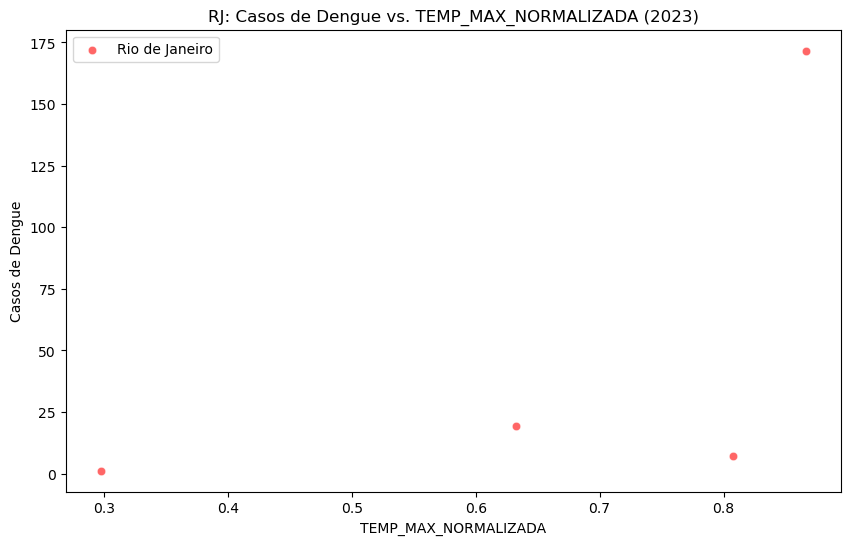

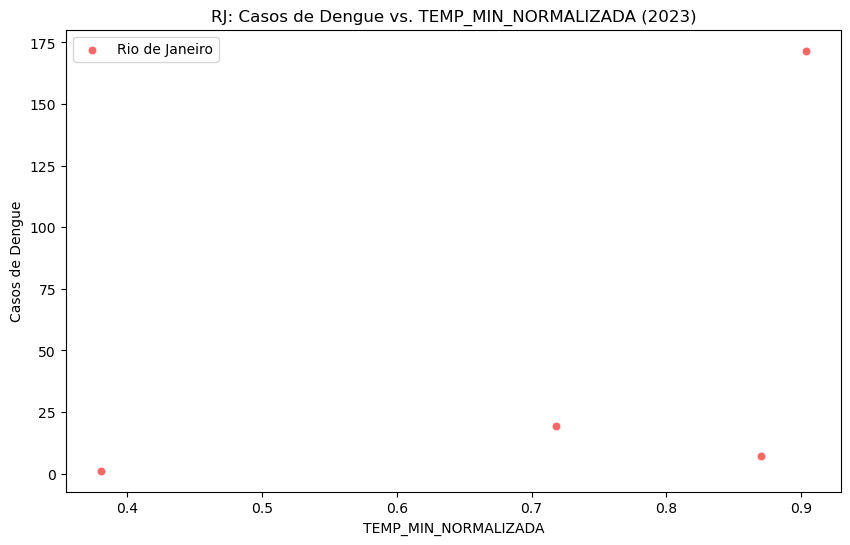

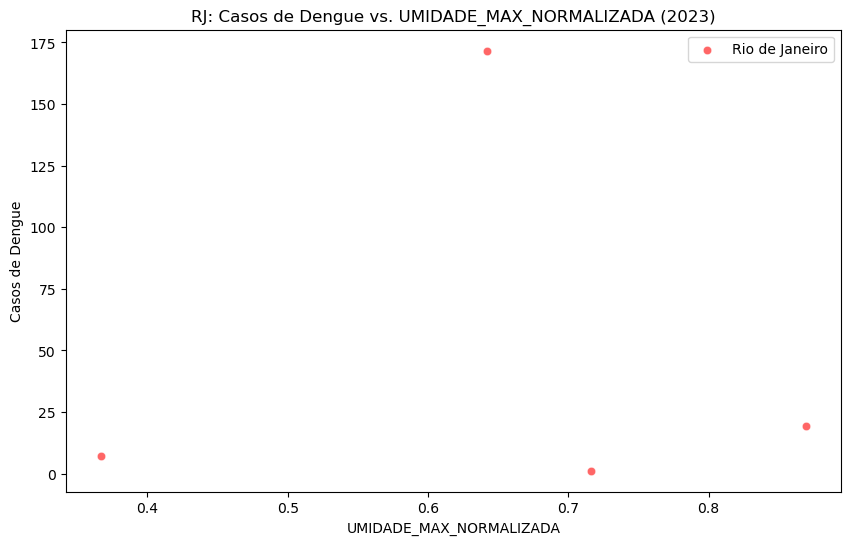

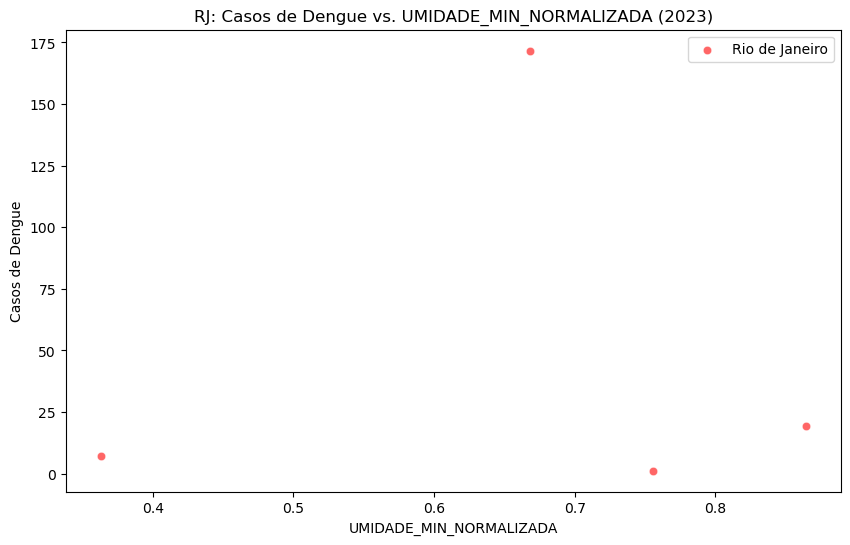

In [220]:
for ano in anos:
    processar_ano_distintos(ano)

**Processa os dados de um ano específico, lendo o arquivo CSV, realizando análises descritivas, cálculos de correlação, e gerando gráficos de dispersão para as características relacionadas aos casos de dengue.**


In [221]:
tabelas_dengue = []

def processar_ano(ano):
    file_path_resultados = f'tabela_saude_com_normalizacao_{ano}.csv'  # Ajusta para múltiplos anos
    df = pd.read_csv(file_path_resultados)

    df_relevante = df.drop(columns=['COD_CIDADE', 'COD_REG'])

    df_relevante.columns = df_relevante.columns.str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')

    print(f"Análise descritiva para o ano {ano}:")
    print(df_relevante.describe())

    numerical_df = df_relevante.select_dtypes(include=[np.number])

    correlation_matrix = numerical_df.corr()
    print(f"\nMatriz de correlação para {ano}:")
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Matriz de Correlação para {ano}')
    plt.show()

    # Separa os dados do Rio de Janeiro e do restante do DF
    df_rio = df_relevante.iloc[-4:]  # Últimos 4 registros para Rio de Janeiro
    df_df = df_relevante.iloc[:-4]    # Todos os registros menos os últimos 4

    features = [
        'População_Normalizada',
        'PRECIPITAÇÃO_NORMALIZADA', 
        'TEMP_MAX_NORMALIZADA',
        'TEMP_MIN_NORMALIZADA', 
        'UMIDADE_MAX_NORMALIZADA',
        'UMIDADE_MIN_NORMALIZADA'
    ]

    for feature in features:
        plt.figure(figsize=(10, 6))
        
        sns.scatterplot(data=df_df, x=feature, y='casos_normalizados', label='Distrito Federal', color='blue', alpha=0.6)
        sns.scatterplot(data=df_rio, x=feature, y='casos_normalizados', label='Rio de Janeiro', color='red', alpha=0.6)
        
        plt.title(f'Casos de Dengue vs. {feature} ({ano})')
        plt.xlabel(feature)
        plt.ylabel('Casos de Dengue')
        plt.legend()
        plt.show()

    df_relevante['Ano'] = ano
    tabelas_dengue.append(df_relevante)

Análise descritiva para o ano 2019:
              Casos  População_Total  População_Normalizada  \
count     35.000000     3.500000e+01              35.000000   
mean    1919.057143     2.595315e+07               0.041112   
std     3724.560590     1.038762e+08               0.167357   
min        6.000000     4.356000e+05               0.000000   
25%      374.500000     3.340250e+06               0.004680   
50%      862.000000     5.797400e+06               0.008638   
75%     1973.000000     1.216530e+07               0.018898   
max    22046.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count           35.000000                 35.000000             35.000000   
mean            19.505296                  0.114532              0.331196   
std             17.934000                  0.047983              0.162557   
min              1.377410                  0.017345              0.223964   
25%        

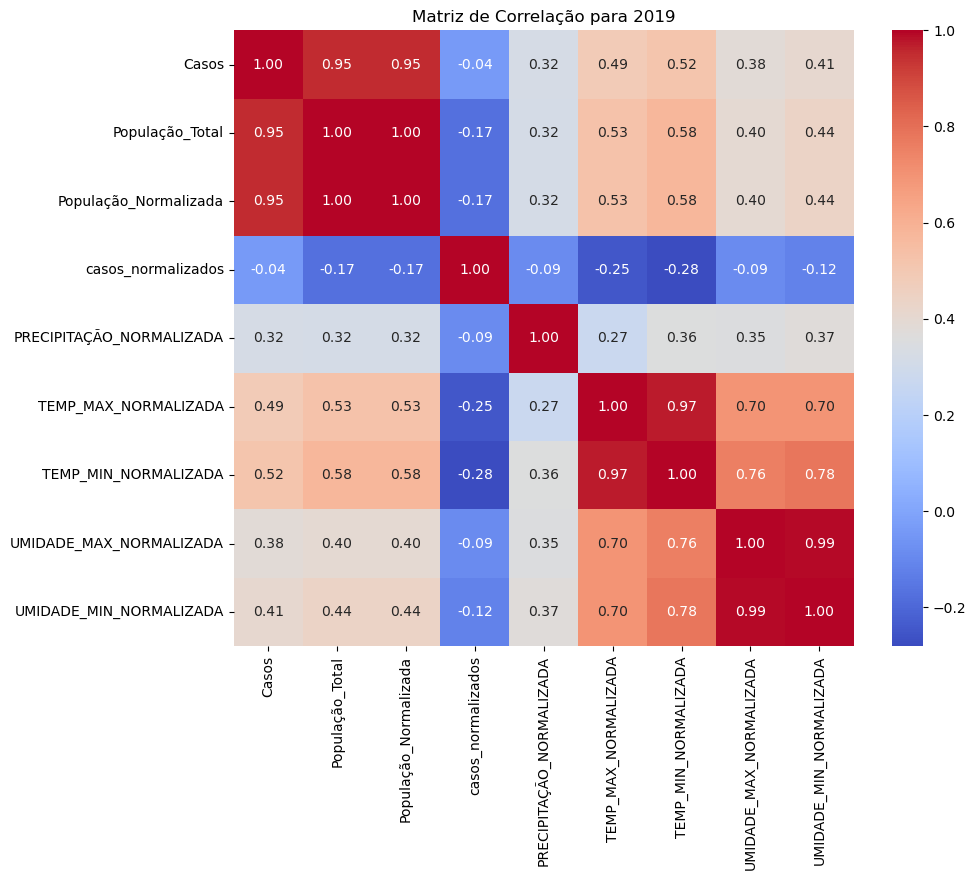

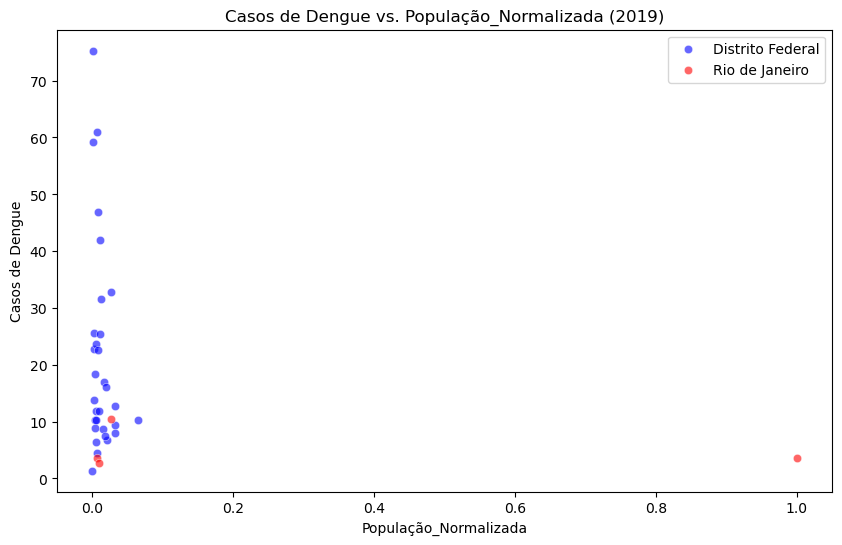

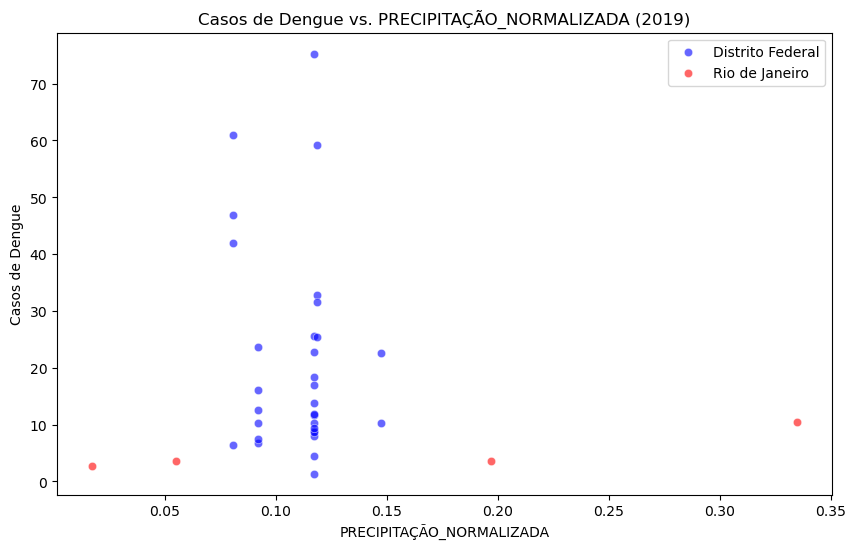

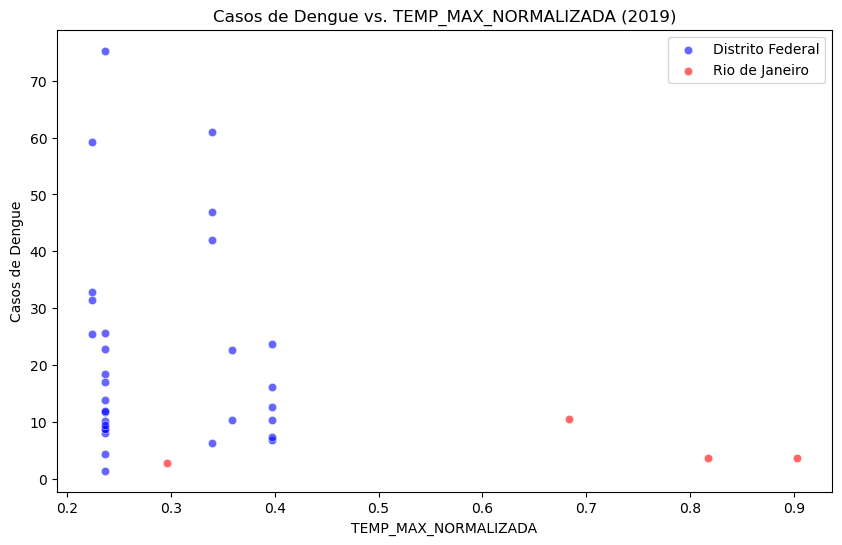

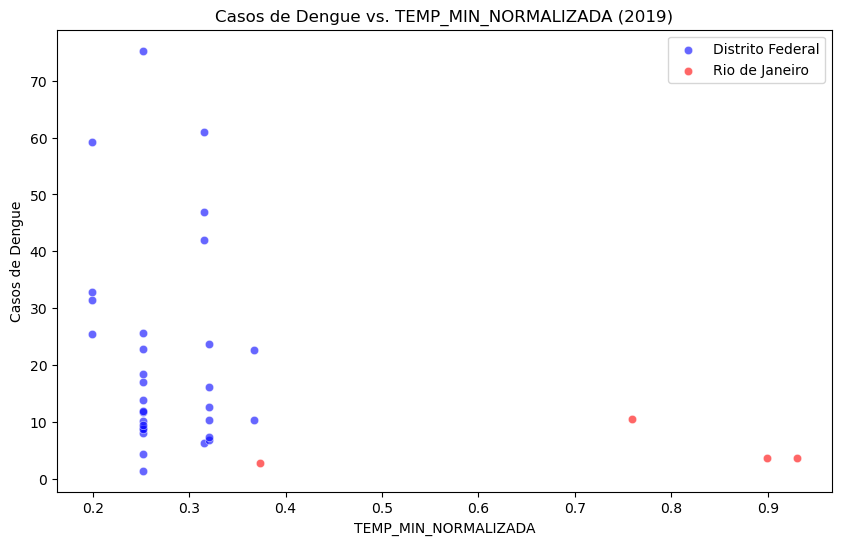

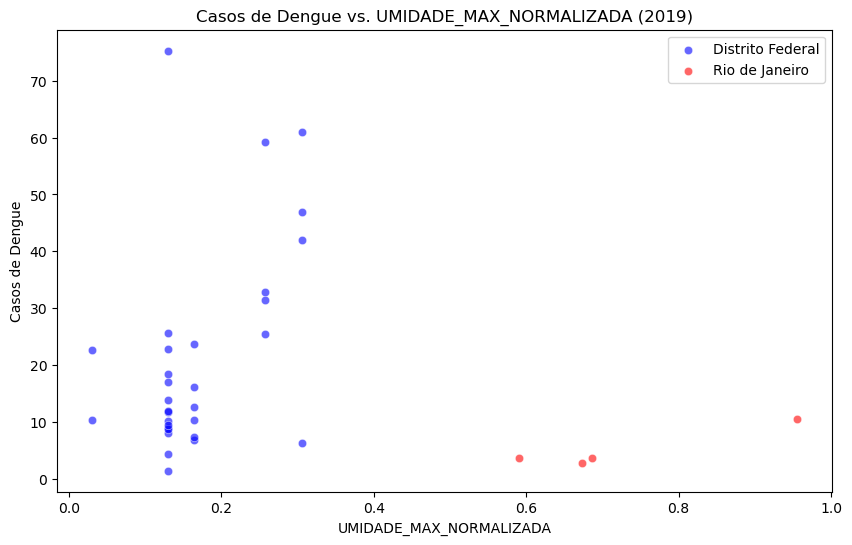

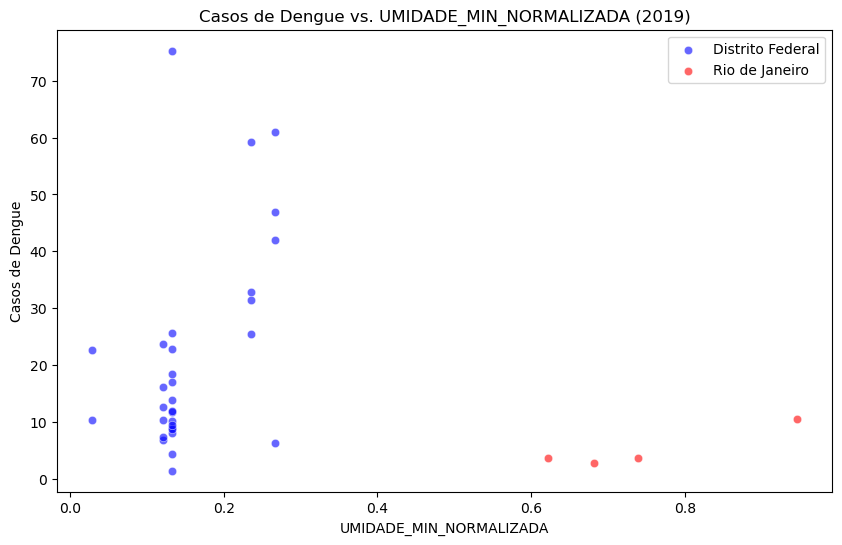

Análise descritiva para o ano 2020:
             Casos  População_Total  População_Normalizada  \
count    35.000000     3.500000e+01              35.000000   
mean   1394.828571     2.595315e+07               0.041112   
std    1465.555295     1.038762e+08               0.167357   
min      14.000000     4.356000e+05               0.000000   
25%     254.000000     3.340250e+06               0.004680   
50%     568.000000     5.797400e+06               0.008638   
75%    2573.500000     1.216530e+07               0.018898   
max    5249.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count           35.000000                 35.000000             35.000000   
mean            15.593692                  0.222720              0.184376   
std             10.729024                  0.150712              0.252818   
min              0.247294                  0.097268              0.031316   
25%             10.3

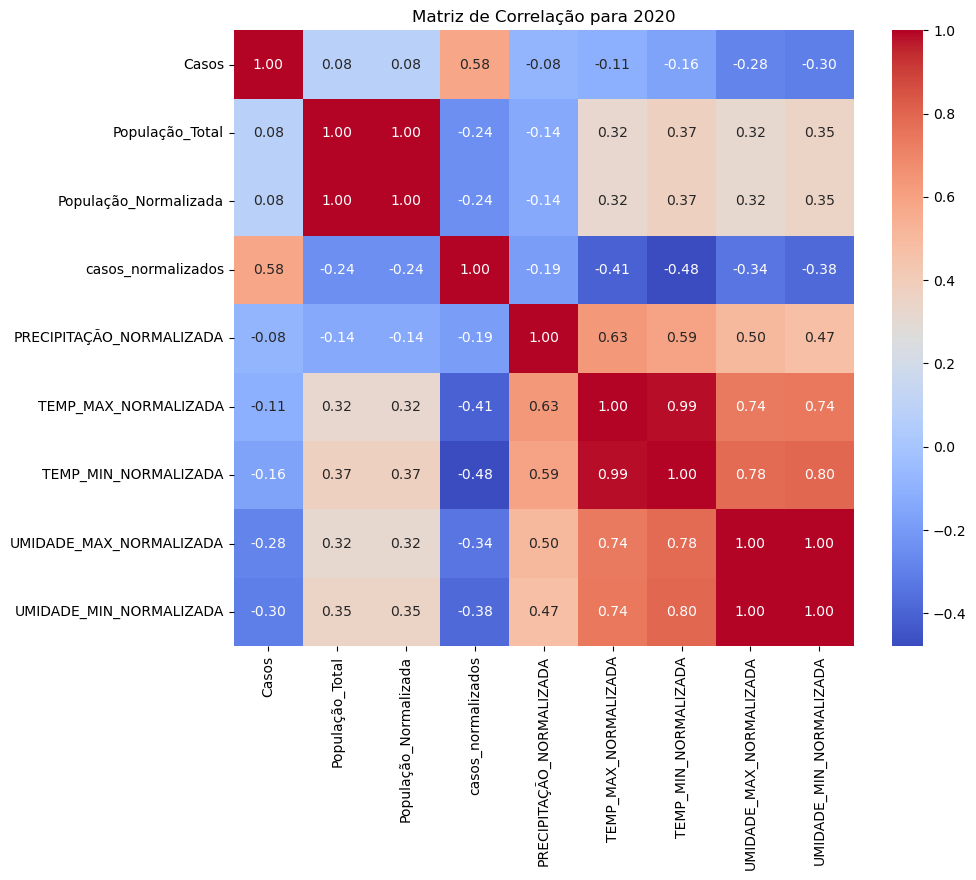

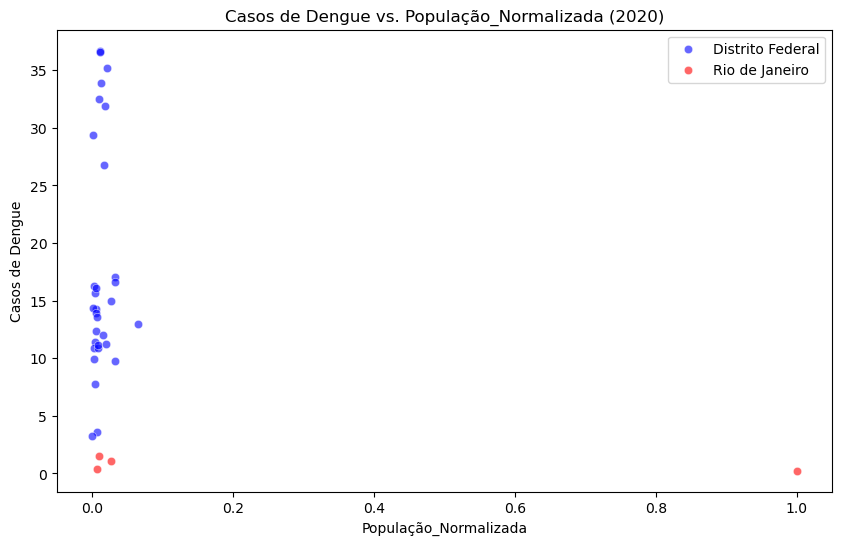

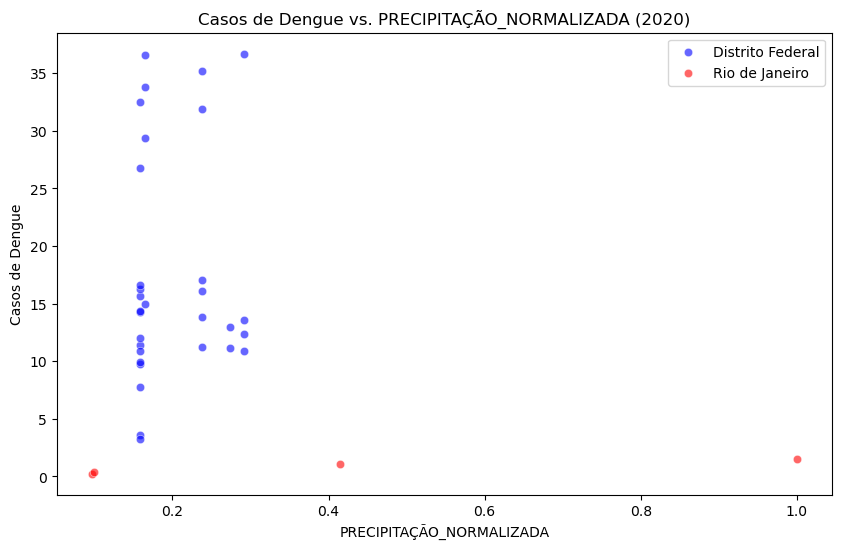

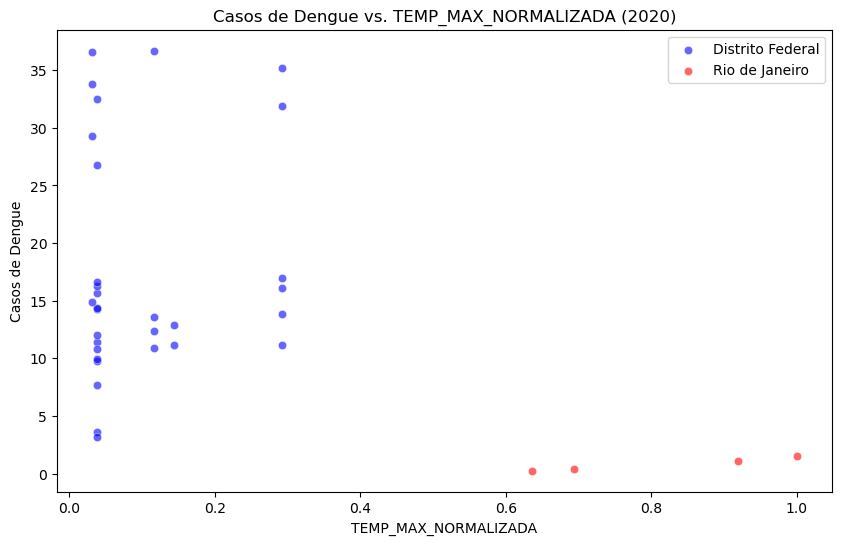

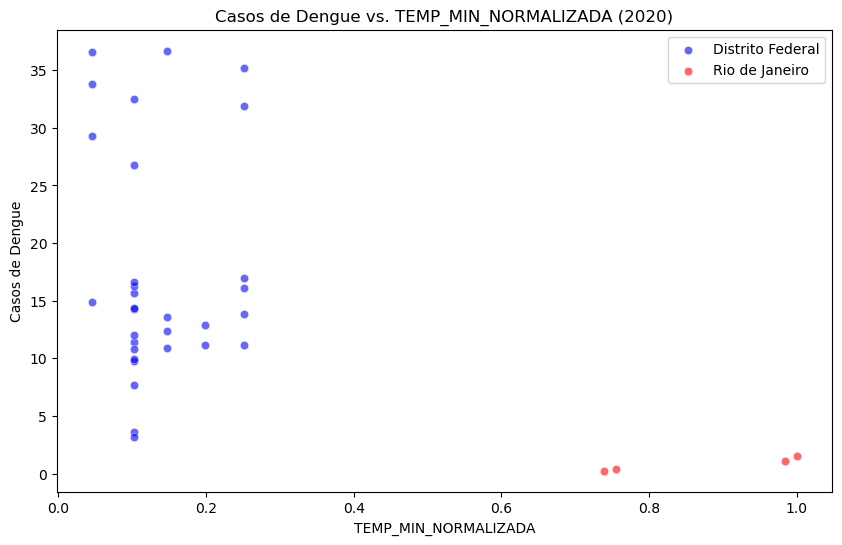

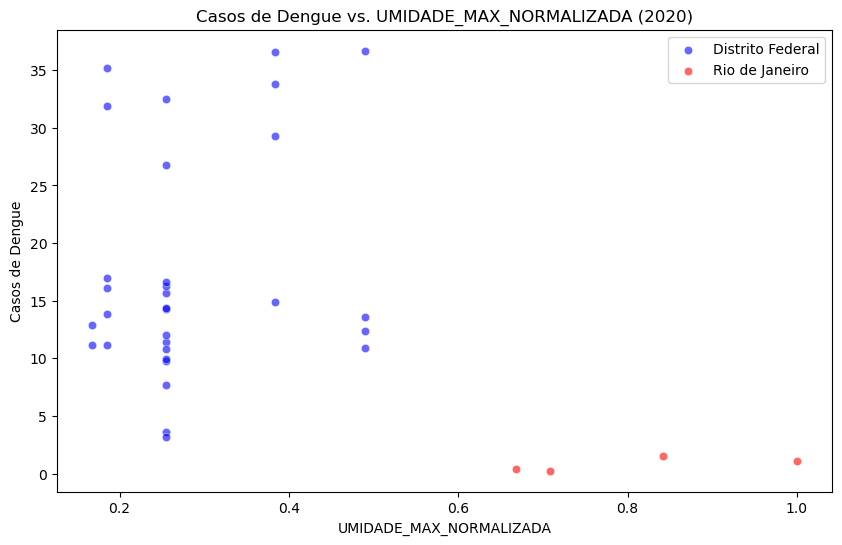

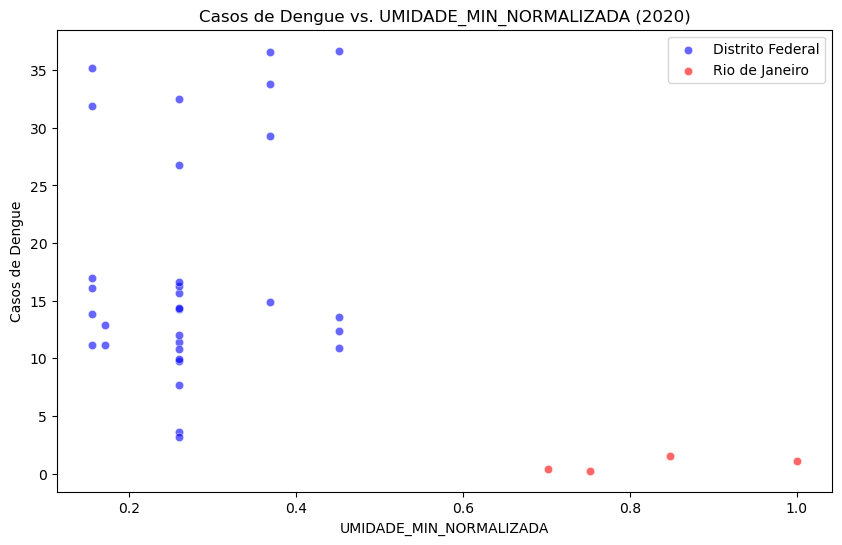

Análise descritiva para o ano 2021:
             Casos  População_Total  População_Normalizada  \
count    35.000000     3.500000e+01              35.000000   
mean    507.885714     2.595315e+07               0.041112   
std     677.408460     1.038762e+08               0.167357   
min      12.000000     4.356000e+05               0.000000   
25%      93.000000     3.340250e+06               0.004680   
50%     223.000000     5.797400e+06               0.008638   
75%     655.000000     1.216530e+07               0.018898   
max    3395.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count           35.000000                 35.000000             35.000000   
mean             5.620688                  0.193442              0.121212   
std              5.271071                  0.062995              0.168104   
min              0.202054                  0.079648              0.000000   
25%              2.7

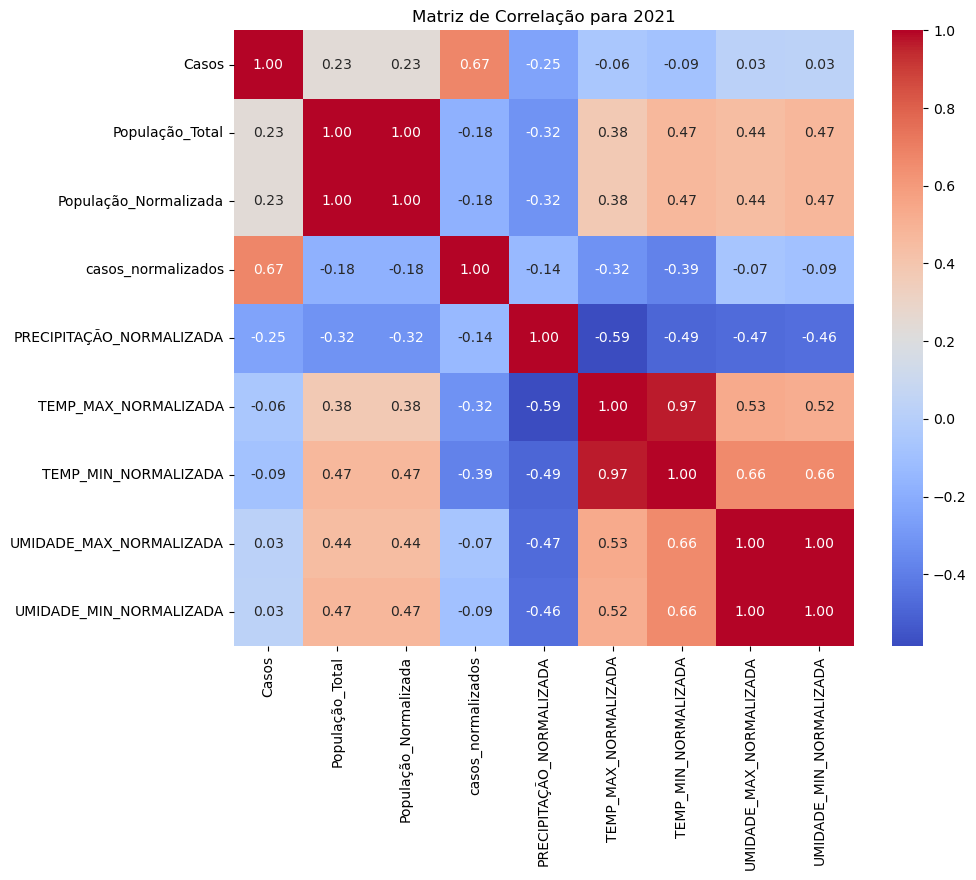

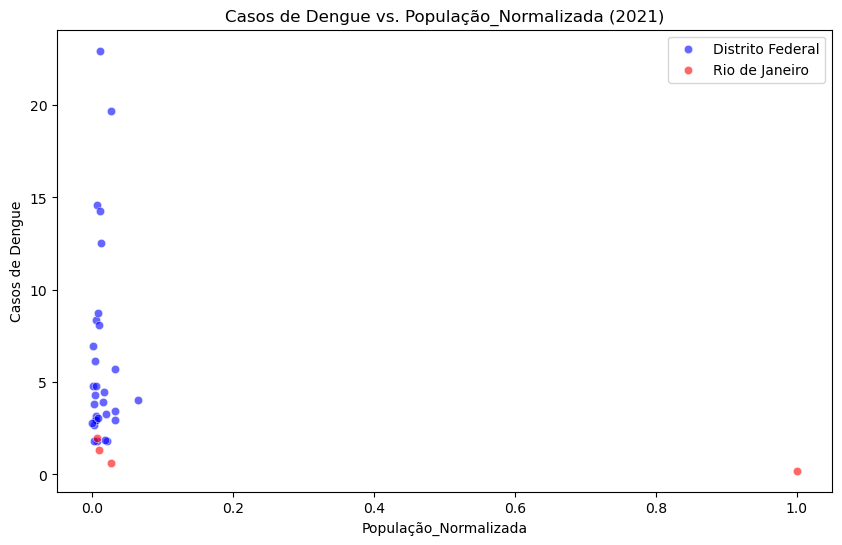

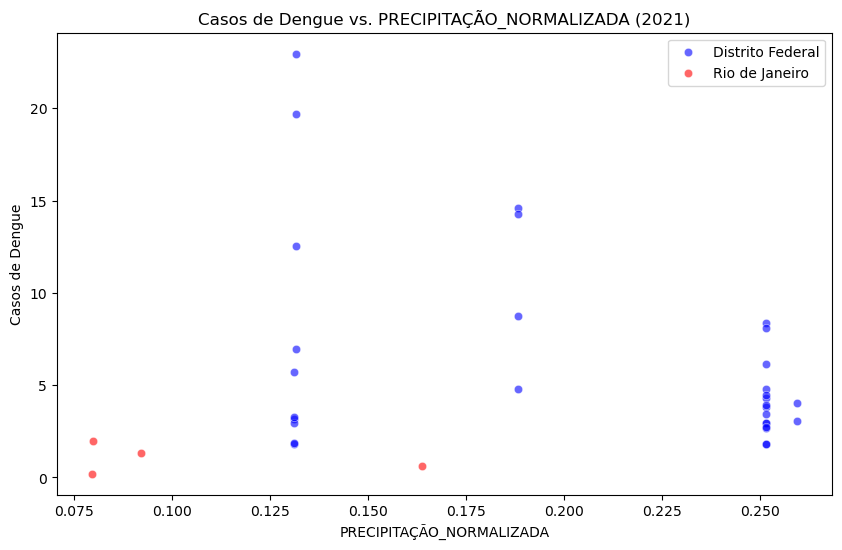

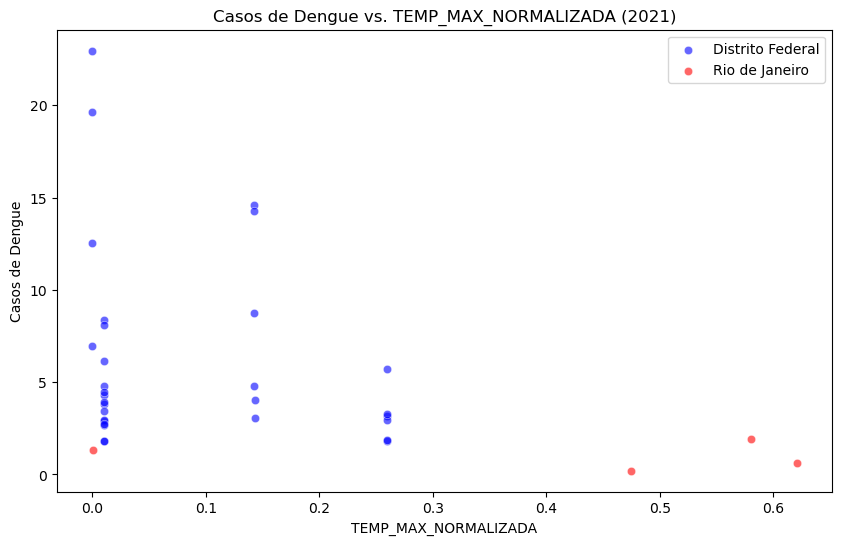

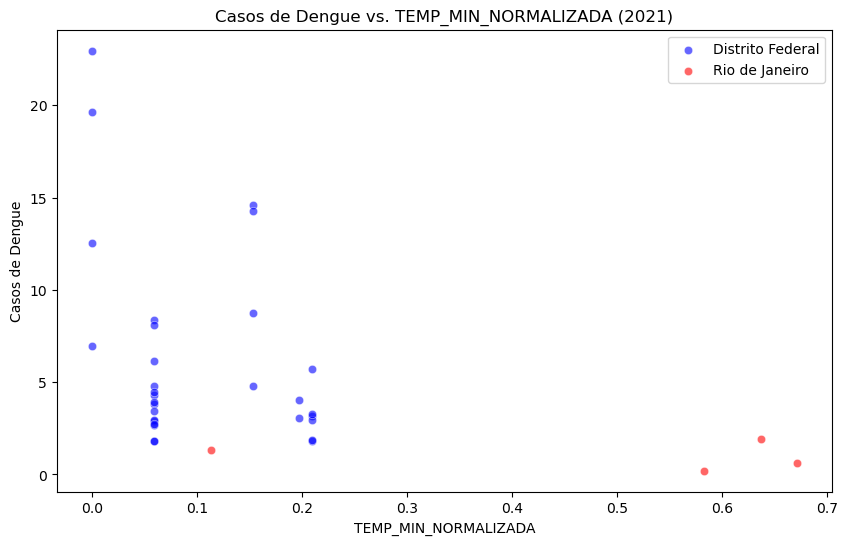

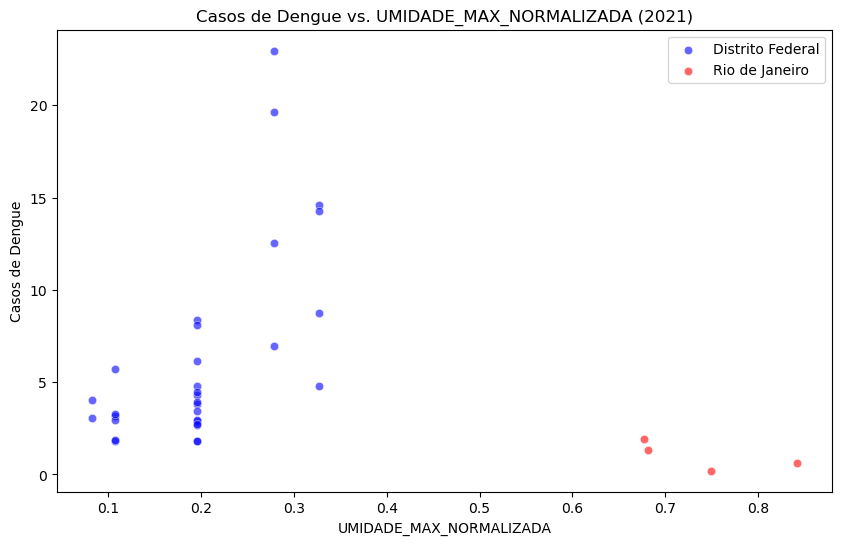

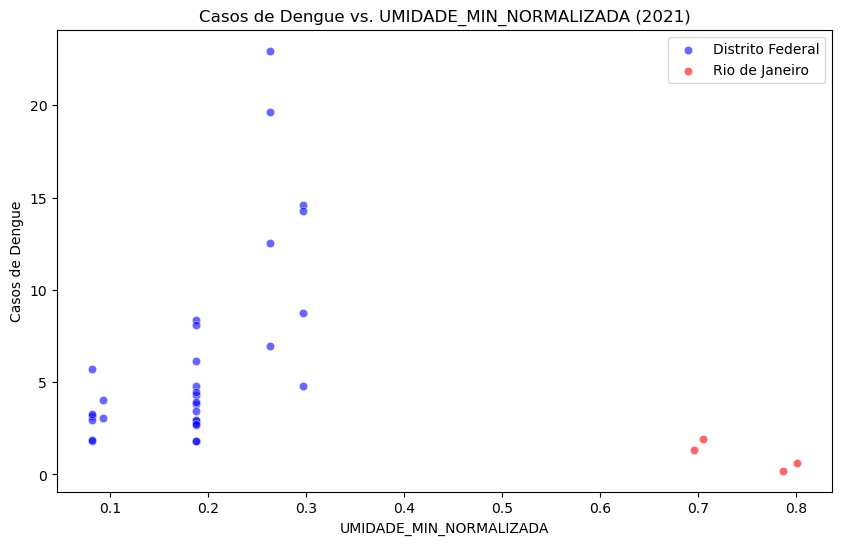

Análise descritiva para o ano 2022:
              Casos  População_Total  População_Normalizada  \
count     35.000000     3.500000e+01              35.000000   
mean    1926.571429     2.595315e+07               0.041112   
std     2450.841804     1.038762e+08               0.167357   
min       11.000000     4.356000e+05               0.000000   
25%      503.500000     3.340250e+06               0.004680   
50%      848.000000     5.797400e+06               0.008638   
75%     2316.500000     1.216530e+07               0.018898   
max    11499.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count           35.000000                 35.000000             35.000000   
mean            19.233139                  0.116810              0.125281   
std             11.684292                  0.057616              0.166735   
min              1.219728                  0.056630              0.003482   
25%        

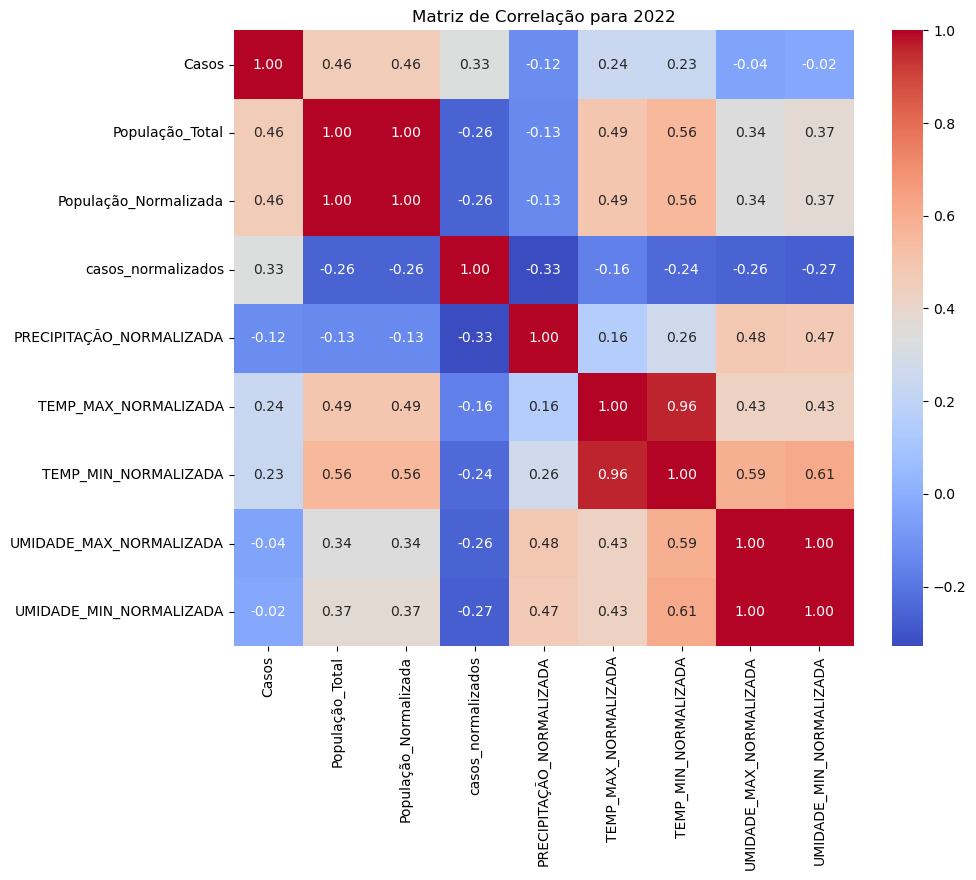

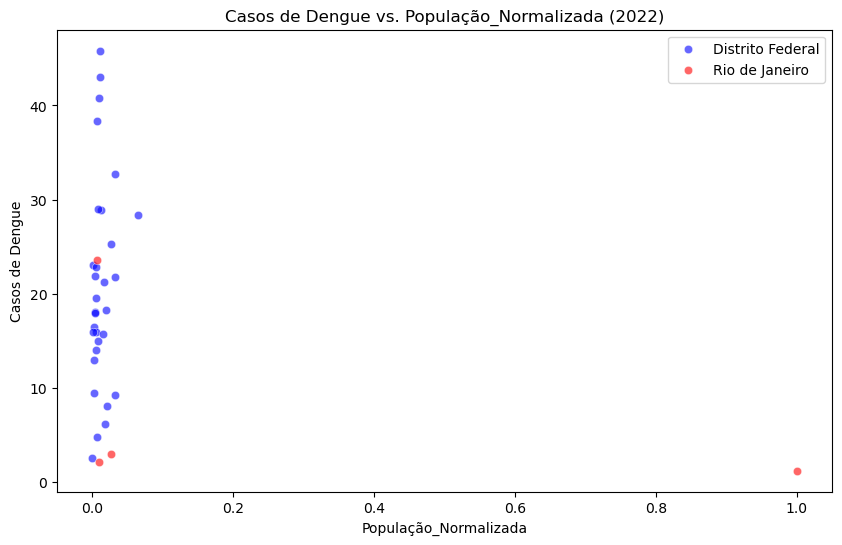

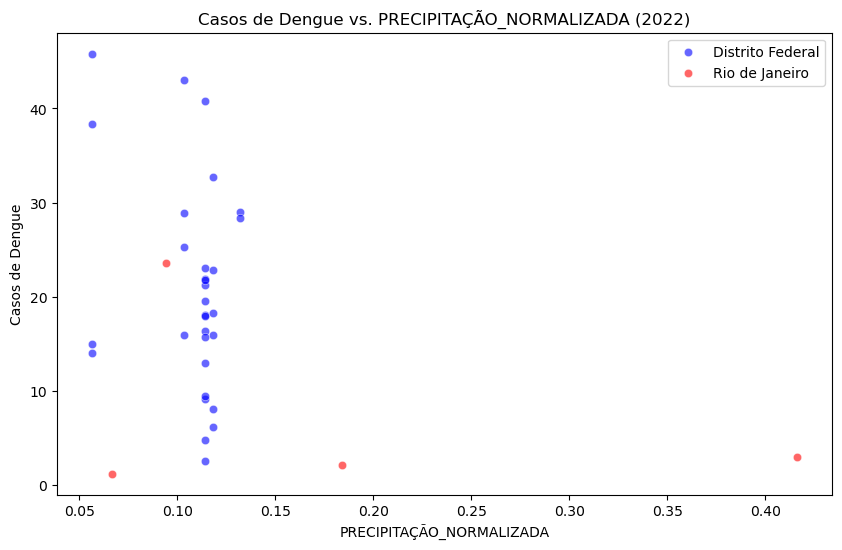

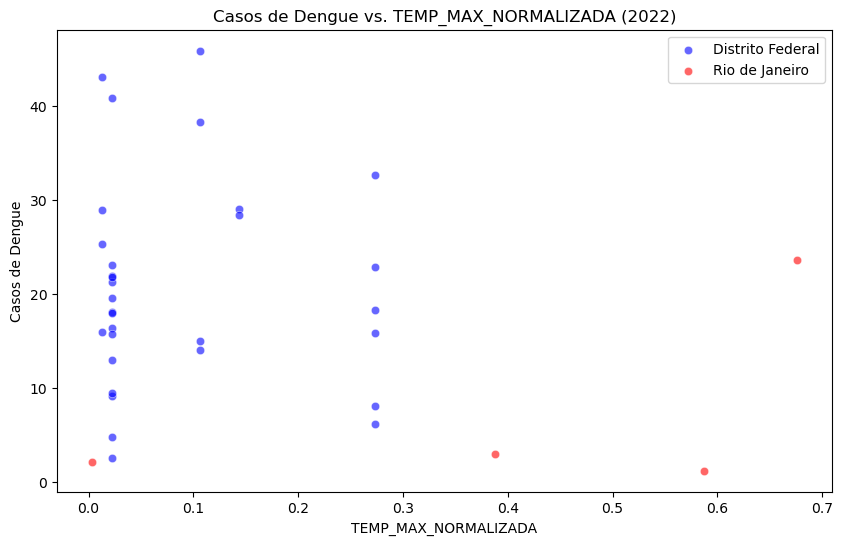

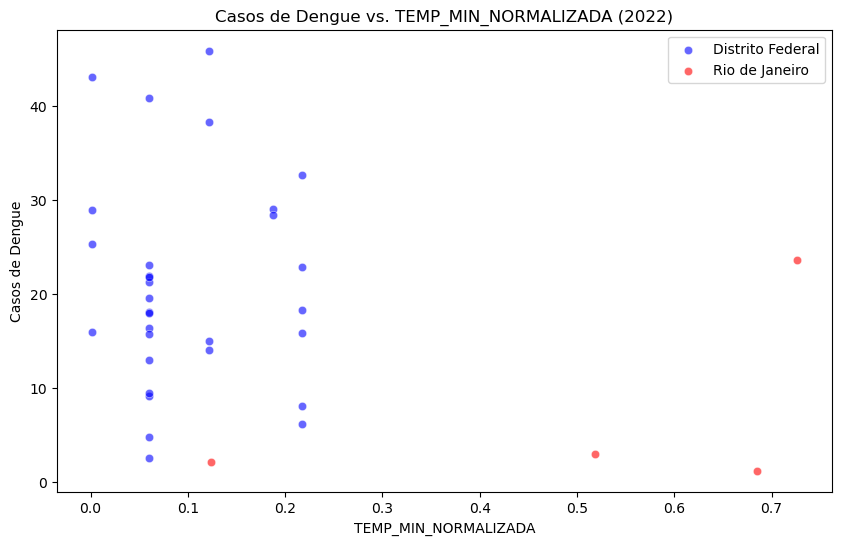

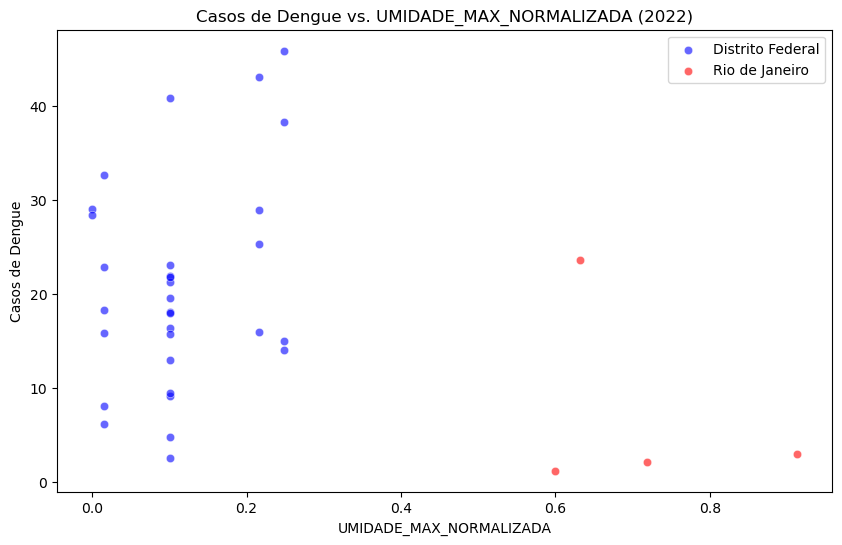

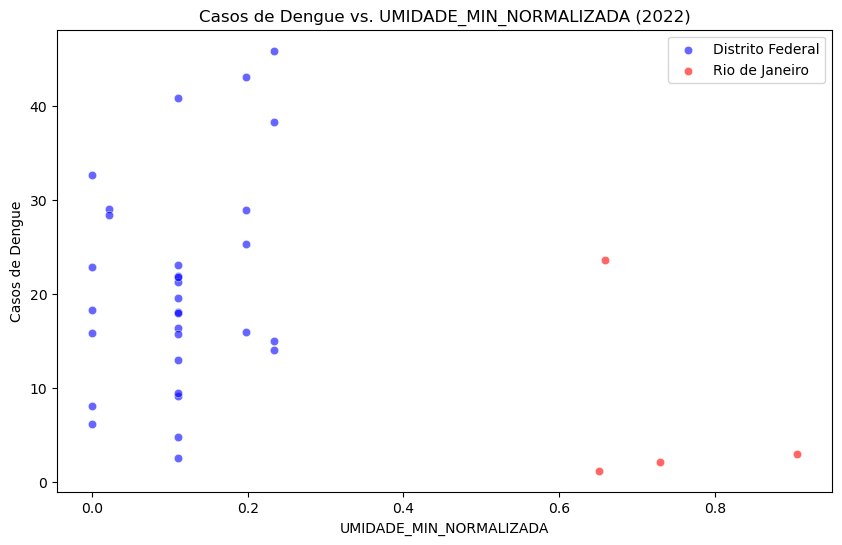

Análise descritiva para o ano 2023:
              Casos  População_Total  População_Normalizada  \
count     35.000000     3.500000e+01              35.000000   
mean    2516.285714     2.595315e+07               0.041112   
std     7348.941295     1.038762e+08               0.167357   
min        8.000000     4.356000e+05               0.000000   
25%      211.000000     3.340250e+06               0.004680   
50%      743.000000     5.797400e+06               0.008638   
75%     2131.500000     1.216530e+07               0.018898   
max    43592.000000     6.211223e+08               1.000000   

       casos_normalizados  PRECIPITAÇÃO_NORMALIZADA  TEMP_MAX_NORMALIZADA  \
count           35.000000                 35.000000             35.000000   
mean            16.415928                  0.062708              0.357094   
std             28.448728                  0.047287              0.153530   
min              1.174950                  0.000000              0.244023   
25%        

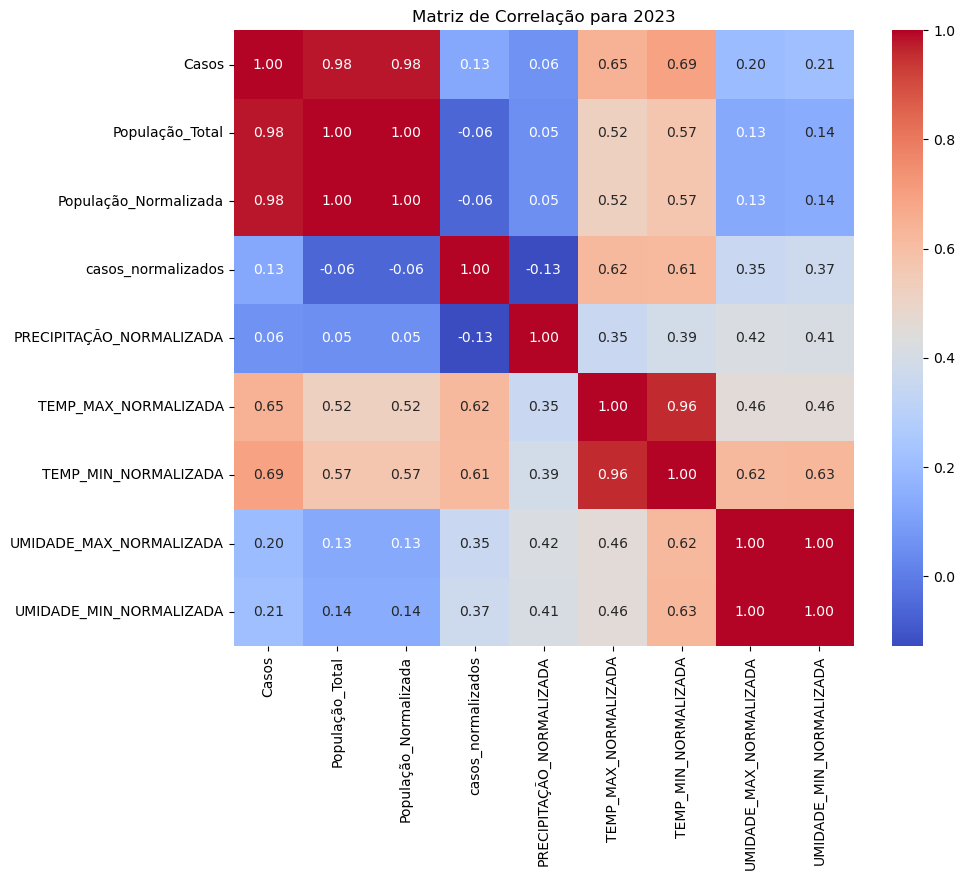

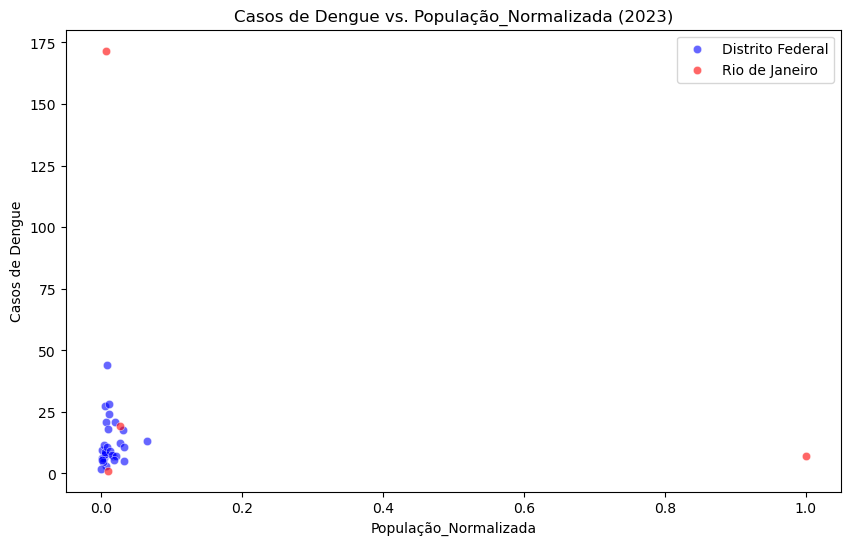

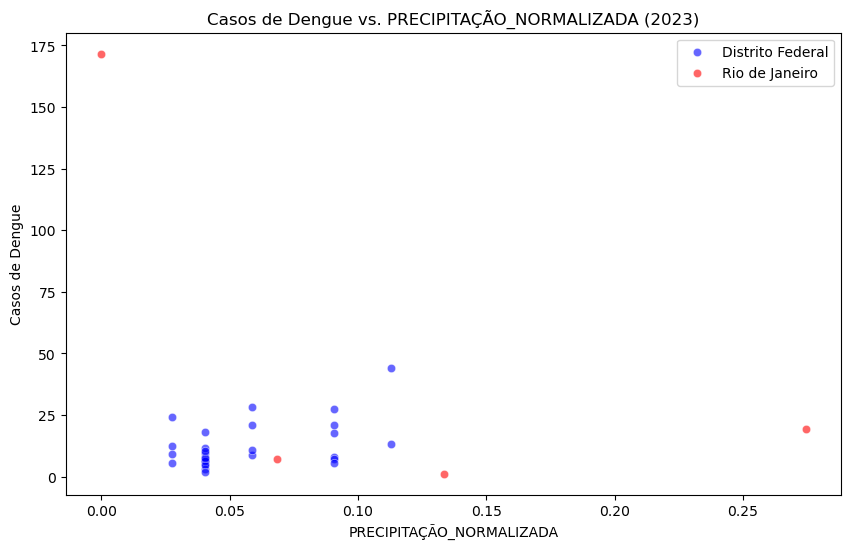

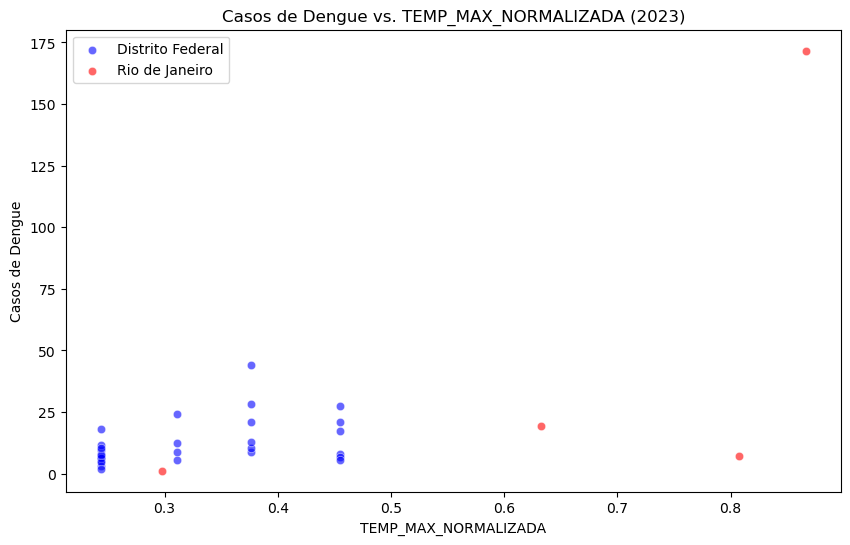

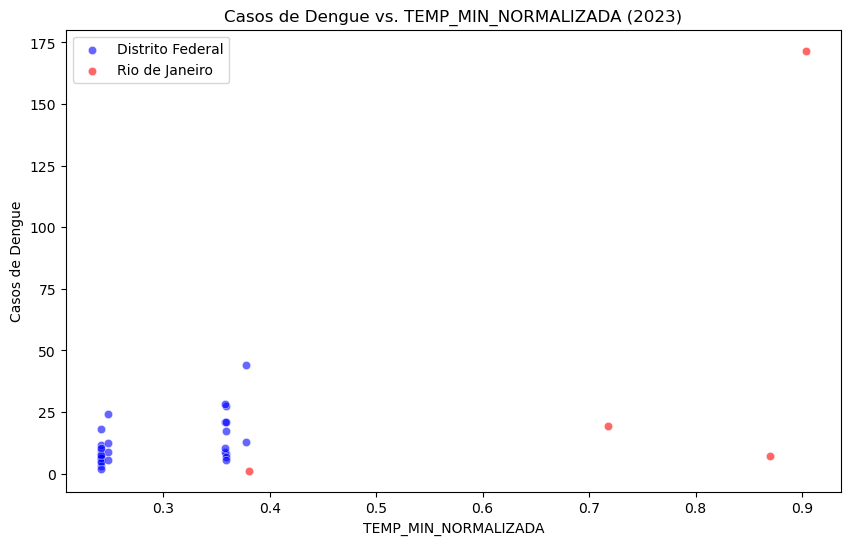

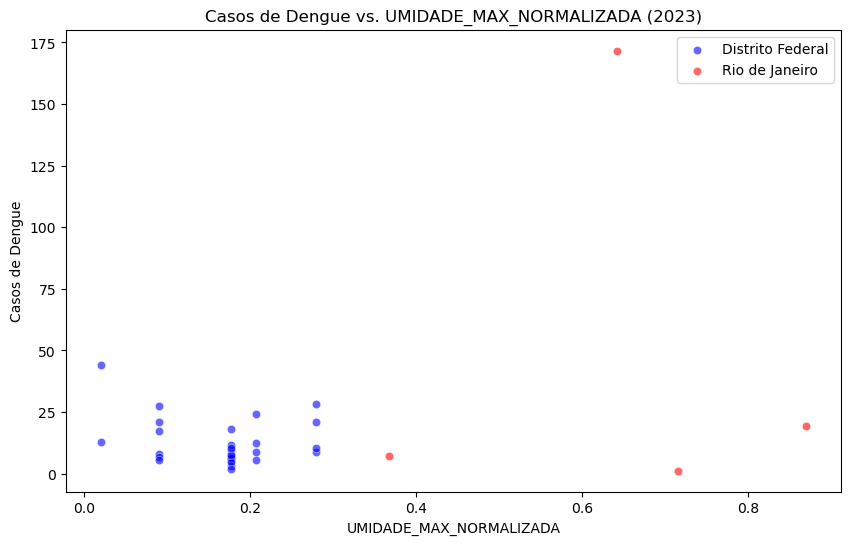

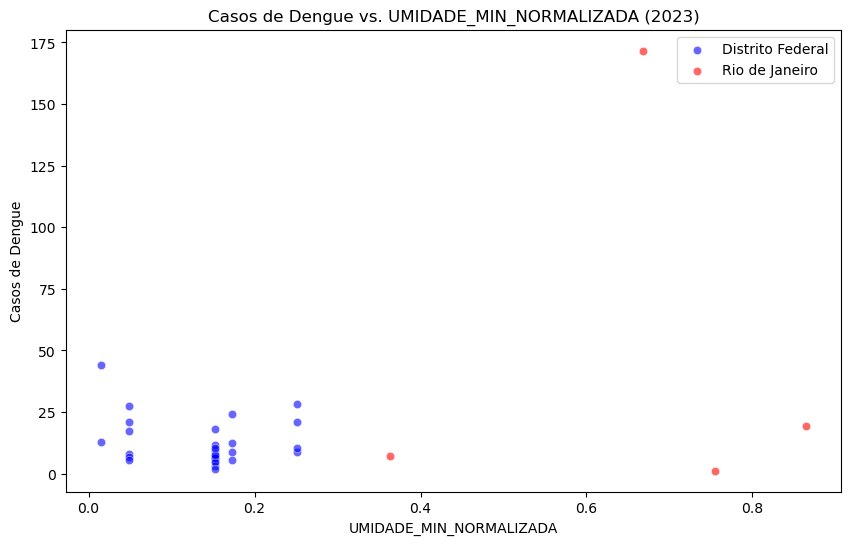

In [222]:
for ano in anos:
    processar_ano(ano)

# **Análise com todos os anos**


**Função para plotar gráfico de dispersão (scatter plot) comparando casos de dengue normalizados
    com uma variável normalizada.**

    Parâmetros:
    - df_consolidado: DataFrame consolidado contendo os dados de dengue e variáveis normalizadas.
    - x_variable: A coluna do DataFrame a ser usada no eixo x (exemplo: 'TEMP_MAX_NORMALIZADA').
    - x_label: Rótulo do eixo x para o gráfico.
    - title: Título do gráfico.
   

In [223]:
def plot_dengue_vs_variable(df_consolidado, x_variable, x_label, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_consolidado, x=x_variable, y='casos_normalizados', hue='Ano', palette='viridis', alpha=0.6)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Casos de Dengue')
    plt.legend(title='Ano')
    plt.show()

## **Gráfico de Casos de Dengue vs. Precipitação**

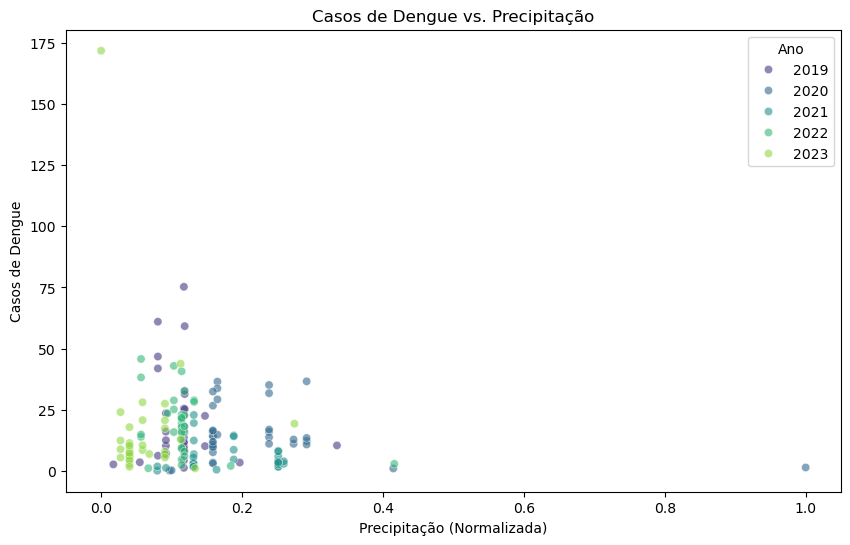

In [224]:
plot_dengue_vs_variable(pd.concat(tabelas_dengue), 'PRECIPITAÇÃO_NORMALIZADA', 'Precipitação (Normalizada)', 'Casos de Dengue vs. Precipitação')

## **Gráfico de Casos de Dengue vs. Temperatura Máxima**

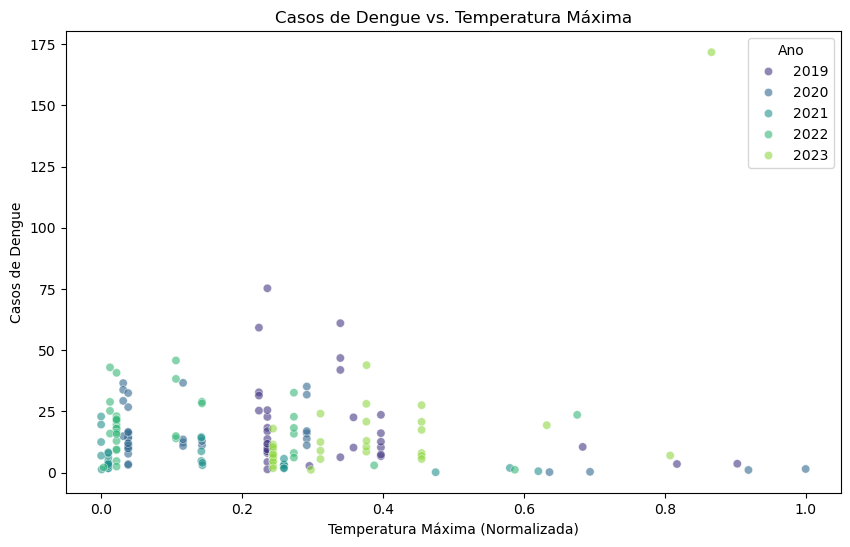

In [225]:
plot_dengue_vs_variable(pd.concat(tabelas_dengue), 'TEMP_MAX_NORMALIZADA', 'Temperatura Máxima (Normalizada)', 'Casos de Dengue vs. Temperatura Máxima')


## **Gráfico de Casos de Dengue vs. Temperatura Mínima**

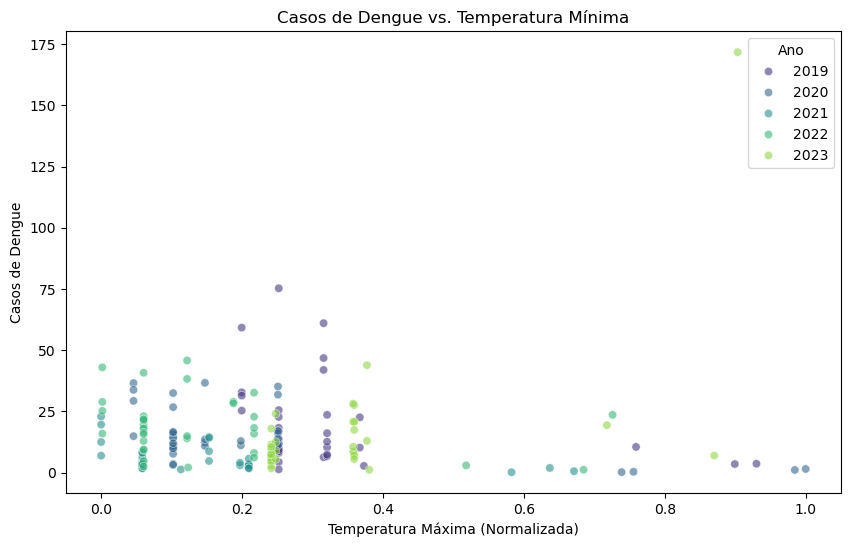

In [226]:
plot_dengue_vs_variable(pd.concat(tabelas_dengue), 'TEMP_MIN_NORMALIZADA', 'Temperatura Máxima (Normalizada)', 'Casos de Dengue vs. Temperatura Mínima')


## **Gráfico de Casos de Dengue vs. Umidade Mínima**

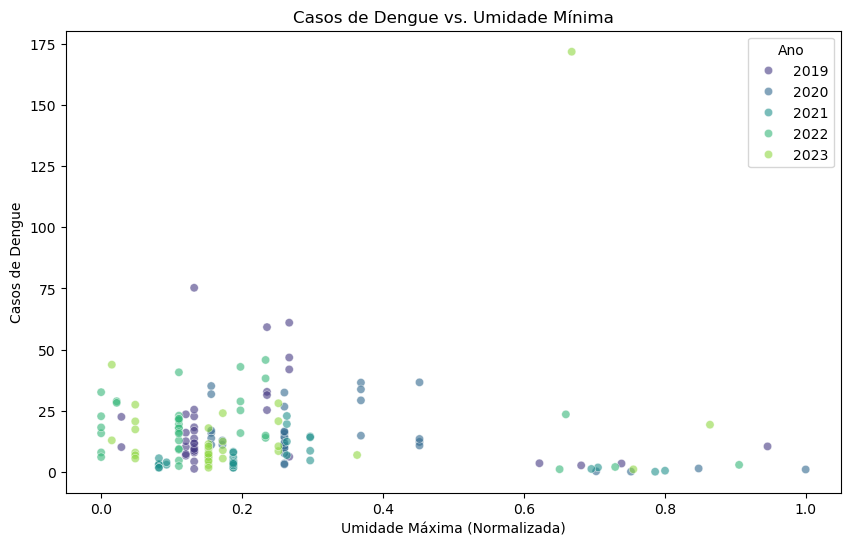

In [227]:
plot_dengue_vs_variable(pd.concat(tabelas_dengue), 'UMIDADE_MIN_NORMALIZADA', 'Umidade Máxima (Normalizada)', 'Casos de Dengue vs. Umidade Mínima')


## **Gráfico de Casos de Dengue vs. Umidade Máxima**

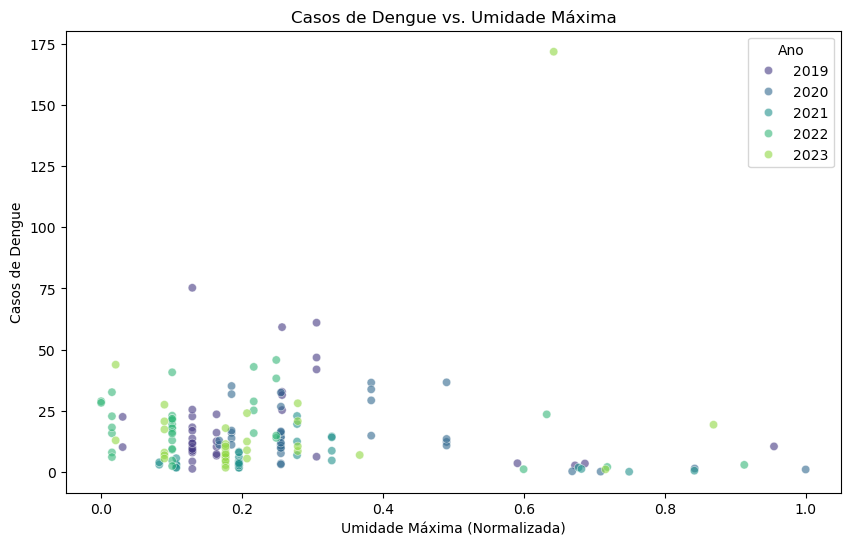

In [228]:
plot_dengue_vs_variable(pd.concat(tabelas_dengue), 'UMIDADE_MAX_NORMALIZADA', 'Umidade Máxima (Normalizada)', 'Casos de Dengue vs. Umidade Máxima')


# **Testes de Fisher e Análise de contingência**

Tabela de Contingência para Umidade Mínima:
Umidade Mínima_Categoria  Baixa  Alta
Dengue_Categoria                     
Ausente                      72    40
Presente                     44    19

Odds Ratio para Umidade Mínima: 0.7773, p-valor: 0.5075
Interpretação para Umidade Mínima:
- O Odds Ratio de 0.7773 indica que as chances de ter dengue são 0.7773 vezes maiores em condições de 'Umidade Mínima' baixa em comparação com condições de 'Umidade Mínima' alta.
- O p-valor de 0.5075 indica que o resultado é não significativo, sugerindo que a relação entre Umidade Mínima e dengue pode estatisticamente relevante.



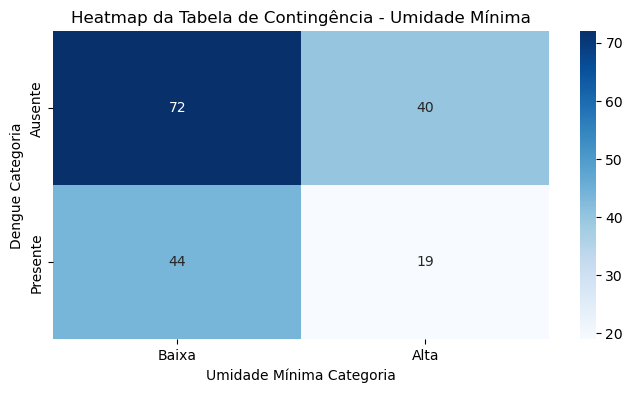

Tabela de Contingência para Umidade Máxima:
Umidade Máxima_Categoria  Baixa  Alta
Dengue_Categoria                     
Ausente                      70    42
Presente                     38    25

Odds Ratio para Umidade Máxima: 1.0965, p-valor: 0.8715
Interpretação para Umidade Máxima:
- O Odds Ratio de 1.0965 indica que as chances de ter dengue são 1.0965 vezes maiores em condições de 'Umidade Máxima' baixa em comparação com condições de 'Umidade Máxima' alta.
- O p-valor de 0.8715 indica que o resultado é não significativo, sugerindo que a relação entre Umidade Máxima e dengue pode estatisticamente relevante.



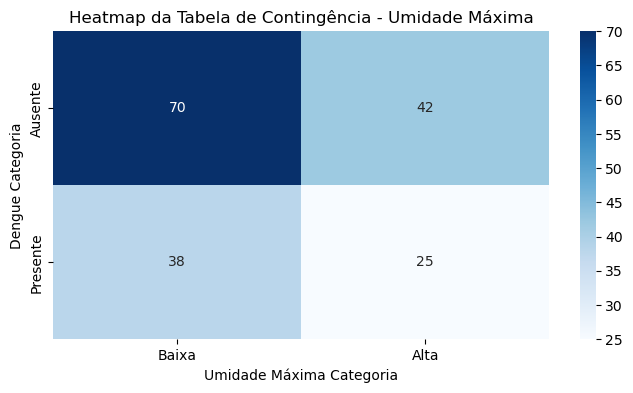

Tabela de Contingência para Temperatura Máxima:
Temperatura Máxima_Categoria  Baixa  Alta
Dengue_Categoria                         
Ausente                          48    64
Presente                         29    34

Odds Ratio para Temperatura Máxima: 0.8793, p-valor: 0.7517
Interpretação para Temperatura Máxima:
- O Odds Ratio de 0.8793 indica que as chances de ter dengue são 0.8793 vezes maiores em condições de 'Temperatura Máxima' baixa em comparação com condições de 'Temperatura Máxima' alta.
- O p-valor de 0.7517 indica que o resultado é não significativo, sugerindo que a relação entre Temperatura Máxima e dengue pode estatisticamente relevante.



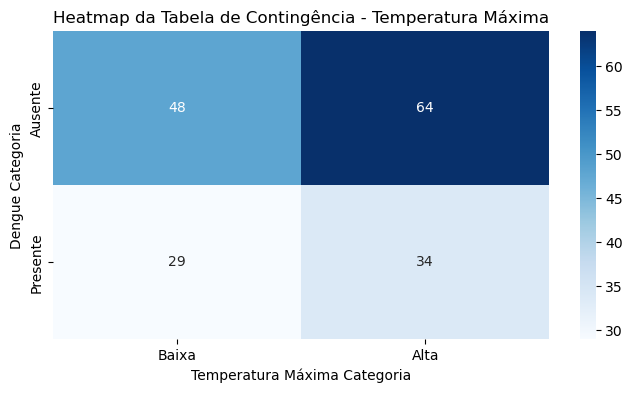

Tabela de Contingência para Temperatura Mínima:
Temperatura Mínima_Categoria  Baixa  Alta
Dengue_Categoria                         
Ausente                          56    56
Presente                         37    26

Odds Ratio para Temperatura Mínima: 0.7027, p-valor: 0.2749
Interpretação para Temperatura Mínima:
- O Odds Ratio de 0.7027 indica que as chances de ter dengue são 0.7027 vezes maiores em condições de 'Temperatura Mínima' baixa em comparação com condições de 'Temperatura Mínima' alta.
- O p-valor de 0.2749 indica que o resultado é não significativo, sugerindo que a relação entre Temperatura Mínima e dengue pode estatisticamente relevante.



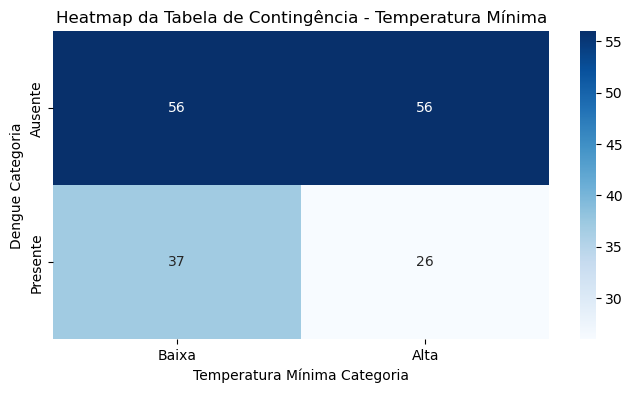

Tabela de Contingência para Precipitação:
Precipitação_Categoria  Baixa  Alta
Dengue_Categoria                   
Ausente                    65    47
Presente                   48    15

Odds Ratio para Precipitação: 0.4322, p-valor: 0.0209
Interpretação para Precipitação:
- O Odds Ratio de 0.4322 indica que as chances de ter dengue são 0.4322 vezes maiores em condições de 'Precipitação' baixa em comparação com condições de 'Precipitação' alta.
- O p-valor de 0.0209 indica que o resultado é significativo, sugerindo que a relação entre Precipitação e dengue é estatisticamente relevante.



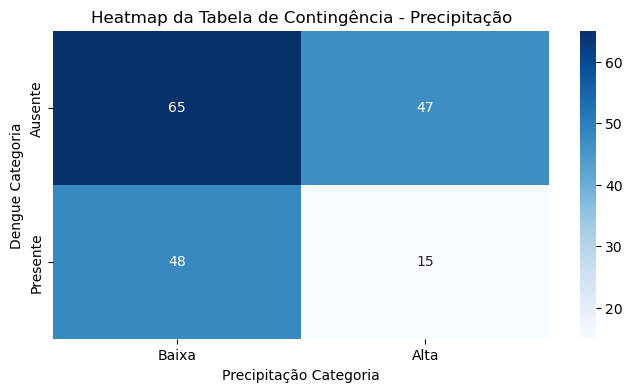

In [229]:

dfs = []

for ano in anos:
    df = pd.read_csv(f'tabela_saude_com_normalizacao_{ano}.csv')
    dfs.append(df)

df_consolidado = pd.concat(dfs, ignore_index=True)

def analisar_variavel(df, coluna, nome_variavel, inverso=False):
    media = df[coluna].mean()
    
    if inverso:
        df[f'{nome_variavel}_Categoria'] = pd.cut(df[coluna], 
                                                   bins=[-float('inf'), media, float('inf')], 
                                                   labels=['Alta', 'Baixa'])  # Invertido
    else:
        df[f'{nome_variavel}_Categoria'] = pd.cut(df[coluna], 
                                                   bins=[-float('inf'), media, float('inf')], 
                                                   labels=['Baixa', 'Alta'])  # Normal

    tabela_contingencia = pd.crosstab(df['Dengue_Categoria'], df[f'{nome_variavel}_Categoria'])

    print(f'Tabela de Contingência para {nome_variavel}:\n{tabela_contingencia}\n')

    if tabela_contingencia.shape[0] == 2 and tabela_contingencia.shape[1] == 2:
        odds_ratio, p_valor = fisher_exact(tabela_contingencia)
        print(f'Odds Ratio para {nome_variavel}: {odds_ratio:.4f}, p-valor: {p_valor:.4f}')
        
        print(f"Interpretação para {nome_variavel}:")
        if inverso:
            print(f"- O Odds Ratio de {odds_ratio:.4f} indica que as chances de ter dengue são {odds_ratio:.4f} vezes maiores em condições de '{nome_variavel}' alta em comparação com condições de '{nome_variavel}' baixa.")
        else:
            print(f"- O Odds Ratio de {odds_ratio:.4f} indica que as chances de ter dengue são {odds_ratio:.4f} vezes maiores em condições de '{nome_variavel}' baixa em comparação com condições de '{nome_variavel}' alta.")
        
        print(f"- O p-valor de {p_valor:.4f} indica que o resultado é {'significativo' if p_valor < 0.05 else 'não significativo'}, sugerindo que a relação entre {nome_variavel} e dengue {'pode' if p_valor >= 0.05 else 'é'} estatisticamente relevante.\n")
    else:
        print(f"A tabela de contingência para {nome_variavel} não é 2x2.")

    
    plt.figure(figsize=(8, 4))
    sns.heatmap(tabela_contingencia, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(f'Heatmap da Tabela de Contingência - {nome_variavel}')
    plt.xlabel(f'{nome_variavel} Categoria')
    plt.ylabel('Dengue Categoria')
    plt.show()

media_dengue = df_consolidado['casos_normalizados'].mean()
df_consolidado['Dengue_Categoria'] = pd.cut(df_consolidado['casos_normalizados'], 
                                             bins=[-float('inf'), media_dengue, float('inf')], 
                                             labels=['Ausente', 'Presente'])

variaveis = {
    'UMIDADE MIN NORMALIZADA': ('Umidade Mínima', False),  # Invertida
    'UMIDADE MAX NORMALIZADA': ('Umidade Máxima', False),
    'TEMP MAX NORMALIZADA': ('Temperatura Máxima', False),
    'TEMP MIN NORMALIZADA': ('Temperatura Mínima', False),  # Invertida
    'PRECIPITAÇÃO NORMALIZADA': ('Precipitação', False)
}

for coluna, (nome_variavel, inverso) in variaveis.items():
    analisar_variavel(df_consolidado, coluna, nome_variavel, inverso)
